In [258]:
from nilearn.decomposition import CanICA

In [259]:
CanICA?

In [1]:
import os
import sys
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from copy import deepcopy
import numpy as np



In [2]:
# Now for some cross-sectional associations
#cs = pandas.read_csv('/Users/jakevogel/Science/tmp/tau/tau_adni_demo_cogchange_litROIs_updated.csv')
cs = pandas.read_csv('/Users/jakevogel/Science/tau/tau_adni_demo_cogchange_litROIs_earlytau.csv')
#cs.columns[-60:]
cs.columns[-69:]


Index(['dkt_Braak_new_atlas_1', 'dkt_Braak_new_atlas_2',
       'dkt_Braak_new_atlas_3', 'dkt_Braak_new_atlas_4',
       'dkt_Braak_new_atlas_5', 'dkt_Braak_new_atlas_6', 'dkt_Braak_stage_1_1',
       'dkt_Braak_stage_2_2', 'dkt_Braak_stage_3_3', 'dkt_Braak_stage_4_4',
       'dkt_Braak_stage_5_5', 'dkt_Braak_stage_6_6', 'dkt_Cho_new_atlas_1',
       'dkt_Cho_new_atlas_2', 'dkt_Cho_new_atlas_3', 'dkt_Cho_new_atlas_4',
       'dkt_Cho_new_atlas_5', 'dkt_Cho_stage_1_1', 'dkt_Cho_stage_2_2',
       'dkt_Cho_stage_3_3', 'dkt_Cho_stage_4_4', 'dkt_Cho_stage_5_5',
       'inf_temp_1', 'schwarz_atlas_1', 'schwarz_atlas_2', 'schwarz_atlas_3',
       'schwarz_atlas_4', 'schwarz_atlas_5', 'schwarz_atlas_6',
       'schwarz_atlas_10', 'ADNI_MEM', 'ADNI_EF', 'n89_libmask_1',
       'n89_libmask_2', 'n89_libmask_3', 'n89_libmask_4', 'n89_libmask_5',
       'n89_libmask_6', 'n89_libmask_core_1', 'n89_libmask_core_2',
       'n89_libmask_core_3', 'n89_libmask_core_4', 'n89_libmask_core_5',
       'n89

In [3]:
ncols = [] 
for col in cs.columns:
    if '.' in col:
        ncols.append(col.split('.')[0])
    else:
        ncols.append(col)

cs.columns = ncols

In [4]:
#taucols = cs.columns[-60:].tolist()
taucols = cs.columns[-69:].tolist()
taucols.remove('ADNI_MEM')
taucols.remove('ADNI_EF')
taucols

['dkt_Braak_new_atlas_1',
 'dkt_Braak_new_atlas_2',
 'dkt_Braak_new_atlas_3',
 'dkt_Braak_new_atlas_4',
 'dkt_Braak_new_atlas_5',
 'dkt_Braak_new_atlas_6',
 'dkt_Braak_stage_1_1',
 'dkt_Braak_stage_2_2',
 'dkt_Braak_stage_3_3',
 'dkt_Braak_stage_4_4',
 'dkt_Braak_stage_5_5',
 'dkt_Braak_stage_6_6',
 'dkt_Cho_new_atlas_1',
 'dkt_Cho_new_atlas_2',
 'dkt_Cho_new_atlas_3',
 'dkt_Cho_new_atlas_4',
 'dkt_Cho_new_atlas_5',
 'dkt_Cho_stage_1_1',
 'dkt_Cho_stage_2_2',
 'dkt_Cho_stage_3_3',
 'dkt_Cho_stage_4_4',
 'dkt_Cho_stage_5_5',
 'inf_temp_1',
 'schwarz_atlas_1',
 'schwarz_atlas_2',
 'schwarz_atlas_3',
 'schwarz_atlas_4',
 'schwarz_atlas_5',
 'schwarz_atlas_6',
 'schwarz_atlas_10',
 'n89_libmask_1',
 'n89_libmask_2',
 'n89_libmask_3',
 'n89_libmask_4',
 'n89_libmask_5',
 'n89_libmask_6',
 'n89_libmask_core_1',
 'n89_libmask_core_2',
 'n89_libmask_core_3',
 'n89_libmask_core_4',
 'n89_libmask_core_5',
 'n89_libmask_core_6',
 'Schwarz_Stage_1',
 'Schwarz_Stage_2',
 'Schwarz_Stage_3',
 'Schwar

In [5]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

In [6]:
cs.columns[80:120]

Index(['EcogPtOrgan_bl', 'EcogPtDivatt_bl', 'EcogPtTotal_bl', 'EcogSPMem_bl',
       'EcogSPLang_bl', 'EcogSPVisspat_bl', 'EcogSPPlan_bl', 'EcogSPOrgan_bl',
       'EcogSPDivatt_bl', 'EcogSPTotal_bl', 'FDG_bl', 'PIB_bl', 'AV45_bl',
       'Years_bl', 'Month_bl', 'Month', 'M', 'update_stamp', 'av45_status_wcb',
       'BRAAK1', 'BRAAK1_SIZE', 'BRAAK2', 'BRAAK2_SIZE', 'BRAAK3',
       'BRAAK3_SIZE', 'BRAAK4', 'BRAAK4_SIZE', 'BRAAK5', 'BRAAK5_SIZE',
       'BRAAK6', 'BRAAK6_SIZE', 'cluster_1', 'weighted_cluster_1', 'cluster_2',
       'weighted_cluster_2', 'cluster_3', 'weighted_cluster_3', 'cluster_4',
       'weighted_cluster_4', 'cluster_5'],
      dtype='object')

In [7]:
cs.loc[indata.index].subs.values[:,1]

NameError: name 'indata' is not defined

In [8]:
# Get data and nons
indvar = ['AGE','PTGENDER','PTEDUCAT']
pred_var = ['MMSE','ADNI_MEM','ADNI_EF','DX_final','av45_status_wcb']
a_indata=cs[taucols+indvar+pred_var].dropna()

gend = a_indata.PTGENDER
gend[gend=='Male'] = 1
gend[gend=='Female'] = 2
a_indata.PTGENDER = gend
a_indata.shape


//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


(86, 75)

In [10]:
a_indata.values[0].astype(float)

ValueError: could not convert string to float: 'MCI'

In [69]:
# Convert to a matfile
from scipy.io import savemat
nsubs = cs.loc[a_indata.index].subs.values[:,1]
to_mat = {'data': a_indata.values.astype(float), 'subs': nsubs, 'rois': np.array(taucols+indvar+pred_var)}
fname = '/Users/jakevogel/Science/tmp/tau/Yasser_matlab_scripts/taudata_nonan'
savemat(fname,to_mat)

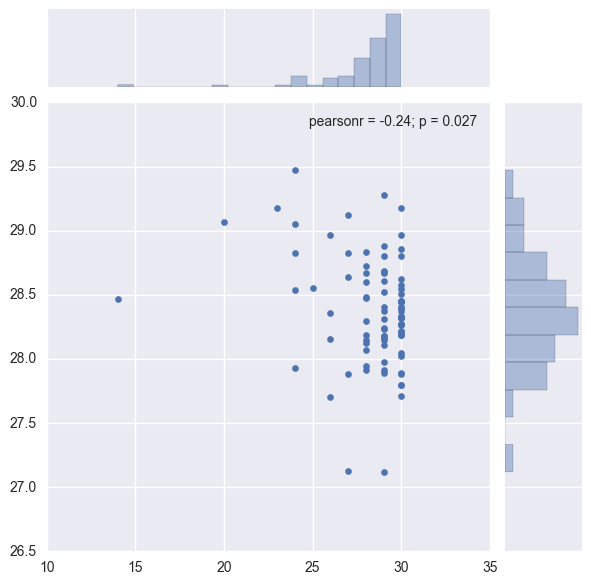

In [9]:
# one ROI
lr = linear_model.LinearRegression()
adni_xin = a_indata['n89_libmask_6'].values.reshape(-1,1)
adni_y = a_indata['MMSE'].values

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, adni_xin, adni_y, cv=10)

plt.close()
sns.jointplot(adni_y,predicted)
plt.show()
#fig, ax = plt.subplots()
#ax.scatter(y, predicted)
#ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
#ax.set_xlabel('Measured')
#ax.set_ylabel('Predicted')
#plt.show()

In [71]:
linear_model.Lasso?

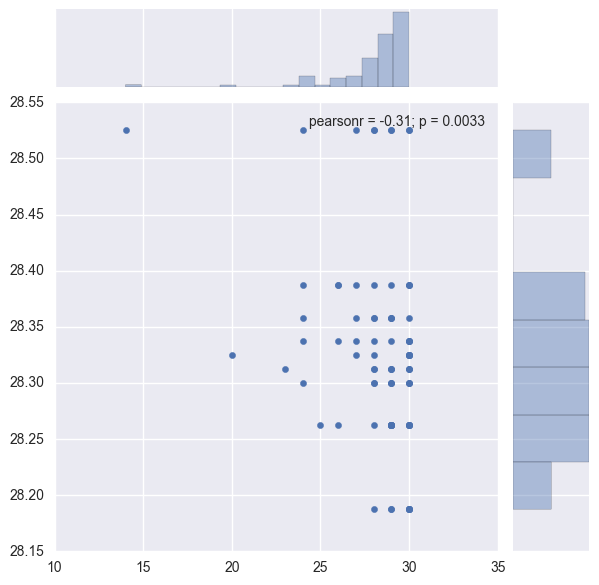

In [348]:
# all tau
lasso = linear_model.Lasso()
adni_xin = a_indata[taucols].values
adni_y = a_indata['MMSE'].values

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lasso, adni_xin, adni_y, cv=10)

plt.close()
sns.jointplot(adni_y,predicted)
plt.show()

In [72]:
cross_val_predict?

In [10]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest

In [114]:
linear_model.Lasso?

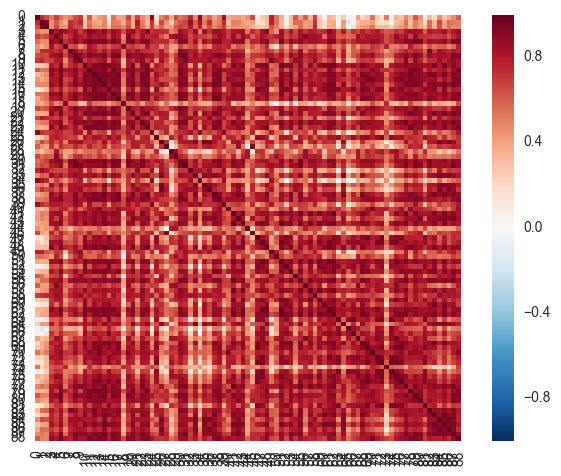

In [349]:
plt.close()
sns.heatmap(np.corrcoef(adni_xin),square=True)
plt.show()

In [350]:
for i in range(1,1000,1):
    if i%100==0:
        print('working on',i)
    las = linear_model.Lasso(alpha = i).fit(a_indata[taucols[:6]].values, adni_y)
    mod = SelectFromModel(las, prefit=True)
    newx = mod.transform(xin)
    if len(newx[0]) > 0:   
        print(i,'ok')
    las = linear_model.Lasso(alpha = i,max_iter=10000).fit(xin, y)
    if len(newx[0]) > 0:
        print(i,'ok')
    las = linear_model.Lasso(alpha = i,tol=0.01).fit(xin, y)
    if len(newx[0]) > 0:
        print(i,'ok')

//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


working on 100
working on 200
working on 300
working on 400
working on 500
working on 600
working on 700
working on 800
working on 900


In [352]:
las2 = linear_model.Lasso().fit(adni_xin, adni_y)
model = SelectFromModel(las2, prefit=True)
X_new = model.transform(adni_xin)

//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


In [353]:
len(X_new[0])

0

In [358]:
X_new = SelectKBest(k=6).fit_transform(adni_xin, adni_y)

In [359]:
X_new.shape

(89, 6)

In [360]:
for i in range(X_new.shape[-1]):
    arr = X_new[:,i]
    for col in taucols:
        if np.allclose(a_indata[col].values,arr):
            print(col)

dkt_Cho_new_atlas_3
schwarz_atlas_5
n89_libmask_5
n89_libmask_core_5
brain_partition_core_ind_lund_sci5_scf5_4
brain_partition_consensus_ind_lund_sci5_scf5_4


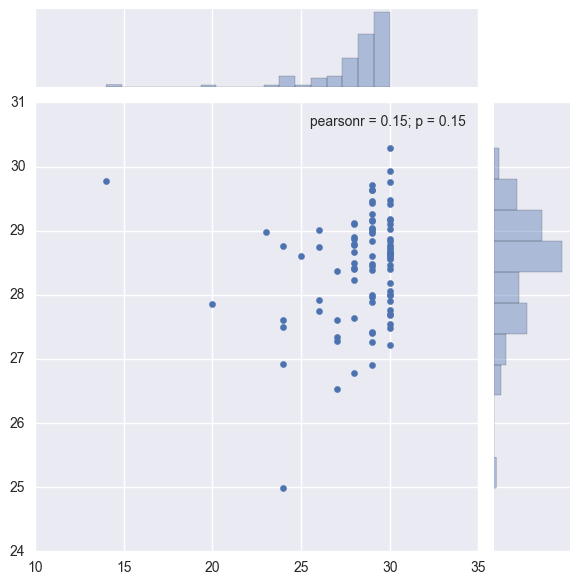

In [374]:
# Regression with new matrix
lr = linear_model.LinearRegression()
adni_xin = a_indata['n89_libmask_6'].values.reshape(-1,1)
adni_y = a_indata['MMSE'].values

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, adni_xin, adni_y, cv=10)

plt.close()
sns.jointplot(adni_y,predicted)
plt.show()

In [97]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

In [361]:
memy = a_indata['ADNI_MEM'].values

In [160]:
linear_model.Lasso?

In [362]:
clf = linear_model.LassoCV()
#sfm = SelectFromModel(clf, threshold=0.25)
#sfm.fit(xin, memy)

In [363]:
score = cross_val_score(clf, adni_xin, memy)
print(score.mean())

//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.046867486447


//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You 

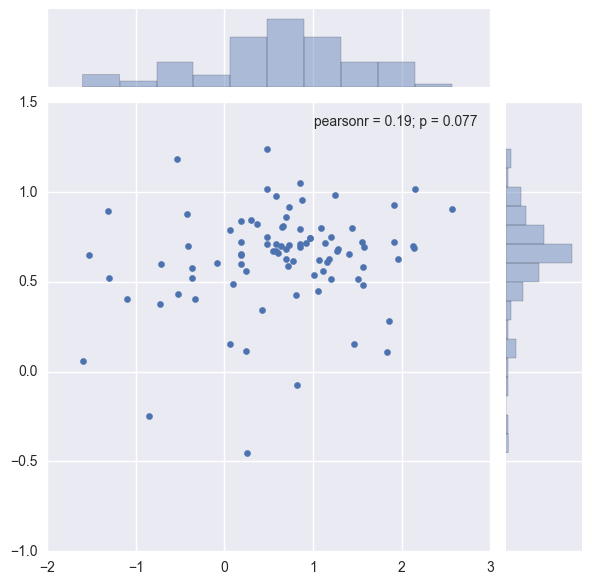

In [369]:
clf = linear_model.LassoCV()
predicted = cross_val_predict(clf, adni_xin, a_indata['ADNI_EF'].values, cv=10)

plt.close()
sns.jointplot(a_indata['ADNI_EF'].values,predicted)
plt.show()

//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


there are 6 features


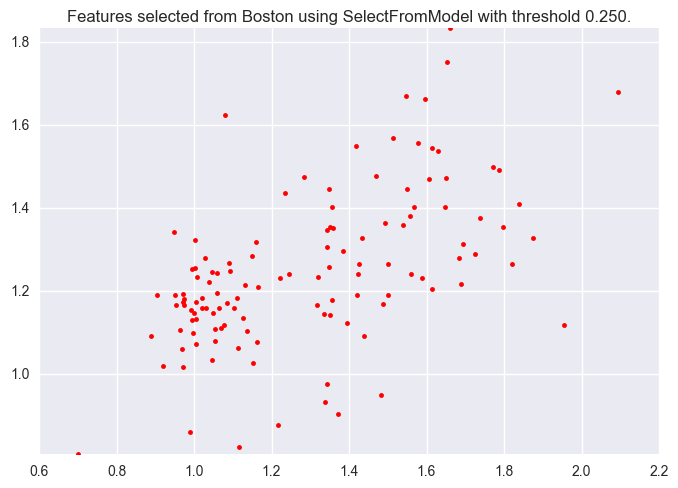

In [370]:
# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = linear_model.LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(adni_xin, adni_y)
n_features = sfm.transform(adni_xin).shape[1]
print('there are %s features'%(n_features))
while n_features > 6:
    sfm.threshold += 0.1
    X_transform = sfm.transform(xin)
    n_features = X_transform.shape[1]
plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
#plt.xlabel("Feature number 1")
#plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

In [373]:
newx = sfm.transform(adni_xin)
print(newx.shape)
for i in range(newx.shape[-1]):
    arr = newx[:,i]
    for col in taucols:
        if np.allclose(a_indata[col].values,arr):
            print(col)

(89, 6)
schwarz_atlas_10
n89_libmask_core_1
n89_libmask_core_2
n89_libmask_core_5
brain_partition_core_ind_lund_sci5_scf5_4
brain_partition_consensus_ind_lund_sci5_scf5_1


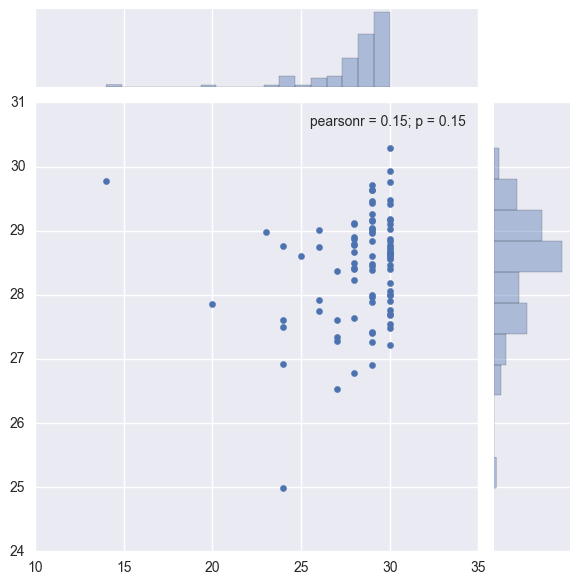

In [375]:
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, X_new, adni_y, cv=10)

plt.close()
sns.jointplot(adni_y,predicted)
plt.show()

In [10]:
# Now try again after removing the ADNI ROIs and the extra schwarz one...
ncols = []
for col in taucols:
    if 'n89' not in col and '_10' not in col and 'consensus' not in col:
        ncols.append(col)
ncols

['dkt_Braak_new_atlas_1',
 'dkt_Braak_new_atlas_2',
 'dkt_Braak_new_atlas_3',
 'dkt_Braak_new_atlas_4',
 'dkt_Braak_new_atlas_5',
 'dkt_Braak_new_atlas_6',
 'dkt_Braak_stage_1_1',
 'dkt_Braak_stage_2_2',
 'dkt_Braak_stage_3_3',
 'dkt_Braak_stage_4_4',
 'dkt_Braak_stage_5_5',
 'dkt_Braak_stage_6_6',
 'dkt_Cho_new_atlas_1',
 'dkt_Cho_new_atlas_2',
 'dkt_Cho_new_atlas_3',
 'dkt_Cho_new_atlas_4',
 'dkt_Cho_new_atlas_5',
 'dkt_Cho_stage_1_1',
 'dkt_Cho_stage_2_2',
 'dkt_Cho_stage_3_3',
 'dkt_Cho_stage_4_4',
 'dkt_Cho_stage_5_5',
 'inf_temp_1',
 'schwarz_atlas_1',
 'schwarz_atlas_2',
 'schwarz_atlas_3',
 'schwarz_atlas_4',
 'schwarz_atlas_5',
 'schwarz_atlas_6',
 'Schwarz_Stage_1',
 'Schwarz_Stage_2',
 'Schwarz_Stage_3',
 'Schwarz_Stage_4',
 'Schwarz_Stage_5',
 'Schwarz_Stage_6',
 'brain_partition_core_ind_lund_sci5_scf5_1',
 'brain_partition_core_ind_lund_sci5_scf5_2',
 'brain_partition_core_ind_lund_sci5_scf5_3',
 'brain_partition_core_ind_lund_sci5_scf5_4',
 'brain_partition_core_ind_lund

In [11]:
## A FURTHER REMOVAL -- GET RID OF REDUNDANT VARIABLES AND THE ET3s
jnk = []
for col in ncols:
    if 'ET_3' not in col and 'stage_1' not in col and 'Stage_1' not in col:
        jnk.append(col)
ncols = jnk
ncols

['dkt_Braak_new_atlas_1',
 'dkt_Braak_new_atlas_2',
 'dkt_Braak_new_atlas_3',
 'dkt_Braak_new_atlas_4',
 'dkt_Braak_new_atlas_5',
 'dkt_Braak_new_atlas_6',
 'dkt_Braak_stage_2_2',
 'dkt_Braak_stage_3_3',
 'dkt_Braak_stage_4_4',
 'dkt_Braak_stage_5_5',
 'dkt_Braak_stage_6_6',
 'dkt_Cho_new_atlas_1',
 'dkt_Cho_new_atlas_2',
 'dkt_Cho_new_atlas_3',
 'dkt_Cho_new_atlas_4',
 'dkt_Cho_new_atlas_5',
 'dkt_Cho_stage_2_2',
 'dkt_Cho_stage_3_3',
 'dkt_Cho_stage_4_4',
 'dkt_Cho_stage_5_5',
 'inf_temp_1',
 'schwarz_atlas_1',
 'schwarz_atlas_2',
 'schwarz_atlas_3',
 'schwarz_atlas_4',
 'schwarz_atlas_5',
 'schwarz_atlas_6',
 'Schwarz_Stage_2',
 'Schwarz_Stage_3',
 'Schwarz_Stage_4',
 'Schwarz_Stage_5',
 'Schwarz_Stage_6',
 'brain_partition_core_ind_lund_sci5_scf5_1',
 'brain_partition_core_ind_lund_sci5_scf5_2',
 'brain_partition_core_ind_lund_sci5_scf5_3',
 'brain_partition_core_ind_lund_sci5_scf5_4',
 'brain_partition_core_ind_lund_sci5_scf5_5',
 'lund_ET_6_1',
 'lund_ET_6_2',
 'lund_ET_6_3',
 'l

In [15]:
cov_cols[-3:]

['AGE', 'PTGENDER', 'PTEDUCAT']

In [13]:
a_indata['PTGENDER']

0     1
1     2
2     1
3     2
4     1
5     1
6     1
7     2
8     2
9     1
10    2
11    2
12    2
13    2
14    1
15    1
16    1
17    2
18    2
19    1
20    2
21    2
22    1
23    2
24    1
25    1
26    2
27    2
28    1
29    1
     ..
60    1
61    1
62    2
63    1
64    1
65    1
66    2
67    2
68    2
69    1
70    1
71    2
72    1
73    2
74    2
75    2
76    1
77    1
78    1
79    1
80    1
81    1
82    1
83    2
84    1
85    2
86    1
87    2
88    1
89    1
Name: PTGENDER, dtype: object

In [16]:
cog_cols = list(cs.columns[22:32]) + [cs.columns[38]] + [cs.columns[45]]
cog_cols.remove('MMSE') 


In [17]:
npreds = cog_cols + pred_var[:-1]
npreds

['CDRSB',
 'ADAS11',
 'ADAS13',
 'RAVLT_immediate',
 'RAVLT_learning',
 'RAVLT_forgetting',
 'RAVLT_perc_forgetting',
 'FAQ',
 'MOCA',
 'EcogPtTotal',
 'EcogSPTotal',
 'MMSE',
 'ADNI_MEM',
 'ADNI_EF',
 'DX_final']

In [52]:
cs_AD = cs.loc[[x for x in cs.index if x not in cs[(cs.DX_final=='MCI') & (cs.av45_status_wcb == 0)].index]]

In [18]:
jdf = cs[npreds+cov_cols[-3:]+ncols]

In [53]:
jdf_AD = cs_AD[npreds+cov_cols[-3:]+ncols]

In [19]:
gcols = [x for x in jdf.columns.tolist() if jdf[x].count() > 87]
jdf = cs[gcols]

In [54]:
jdf_AD = cs_AD[gcols]

In [20]:
[x for x in jdf.index if any(~pandas.notnull(jdf.loc[x].values))]

[33, 45, 54, 80]

In [56]:
[x for x in jdf_AD.index if any(~pandas.notnull(jdf_AD.loc[x].values))]

[33, 45, 54]

In [23]:
# A real quick check of the linear relationships since adding Lund ROIs
lin_res = pandas.DataFrame(index=ncols)
for dv in npreds[:-1]:
    if dv in jdf.columns:
        print('working on',dv)
    else:
        continue
    dat = jdf[(ncols+[dv]+cov_cols[-3:])].dropna()
    for col in ncols:
        mod = smf.ols('%s ~ %s + %s + %s + %s'%(dv,cov_cols[-3],
                                               cov_cols[-2],
                                               cov_cols[-1],col),
                                              data=dat).fit()
        lin_res.ix[col,'%s_t'%(dv)] = mod.tvalues[-1]
        lin_res.ix[col,'%s_p'%(dv)] = mod.pvalues[-1]
        

working on CDRSB
working on ADAS11
working on ADAS13
working on FAQ
working on MOCA
working on EcogPtTotal
working on EcogSPTotal
working on MMSE
working on ADNI_MEM
working on ADNI_EF


In [57]:
# A real quick check of the linear relationships since adding Lund ROIs
lin_res_AD = pandas.DataFrame(index=ncols)
for dv in npreds[:-1]:
    if dv in jdf_AD.columns:
        print('working on',dv)
    else:
        continue
    dat = jdf_AD[(ncols+[dv]+cov_cols[-3:])].dropna()
    for col in ncols:
        mod = smf.ols('%s ~ %s + %s + %s + %s'%(dv,cov_cols[-3],
                                               cov_cols[-2],
                                               cov_cols[-1],col),
                                              data=dat).fit()
        lin_res_AD.ix[col,'%s_t'%(dv)] = mod.tvalues[-1]
        lin_res_AD.ix[col,'%s_p'%(dv)] = mod.pvalues[-1]
        

working on CDRSB
working on ADAS11
working on ADAS13
working on FAQ
working on MOCA
working on EcogPtTotal
working on EcogSPTotal
working on MMSE
working on ADNI_MEM
working on ADNI_EF


In [68]:
lin_res_AD.sort_values('EcogSPTotal_t',ascending=False)

,CDRSB_t,CDRSB_p,ADAS11_t,ADAS11_p,ADAS13_t,ADAS13_p,FAQ_t,FAQ_p,MOCA_t,MOCA_p,EcogPtTotal_t,EcogPtTotal_p,EcogSPTotal_t,EcogSPTotal_p,MMSE_t,MMSE_p,ADNI_MEM_t,ADNI_MEM_p,ADNI_EF_t,ADNI_EF_p
brain_partition_core_ind_lund_sci5_scf5_4,3.655175,0.000531,3.751716,0.000385,2.844976,0.005984,2.361664,0.021297,-2.186048,0.032536,0.710356,0.480064,3.371157,0.001283,-2.414645,0.018619,-2.655934,0.009971,-1.210197,0.230654
dkt_Cho_stage_3_3,3.428419,0.001084,3.261272,0.001792,2.386867,0.020007,2.264637,0.026985,-2.345488,0.022164,0.732372,0.466615,3.282573,0.001680,-1.867916,0.066353,-2.357585,0.021463,-1.562475,0.123108
schwarz_atlas_1,3.961867,0.000195,3.622047,0.000584,2.824576,0.006332,2.492630,0.015322,-3.008191,0.003774,1.228122,0.223899,3.270738,0.001742,-1.701685,0.093668,-3.496013,0.000864,-2.181644,0.032815
brain_partition_core_ind_lund_sci5_scf5_3,3.688699,0.000477,3.463897,0.000963,2.588983,0.011940,2.366519,0.021043,-2.543362,0.013446,1.047645,0.298743,3.263178,0.001782,-2.100374,0.039642,-2.489269,0.015411,-1.618500,0.110473
dkt_Cho_stage_2_2,3.311456,0.001551,2.896229,0.005187,2.167420,0.033990,2.321336,0.023517,-2.250166,0.027939,1.105939,0.272893,3.193359,0.002196,-1.446951,0.152791,-2.723035,0.008327,-1.828368,0.072155
dkt_Cho_new_atlas_3,3.337667,0.001432,3.281248,0.001687,2.387263,0.019987,2.160219,0.034567,-2.297703,0.024911,0.558770,0.578269,3.189265,0.002223,-1.970059,0.053162,-2.126997,0.037281,-1.401192,0.165987
dkt_Cho_new_atlas_2,3.138875,0.002596,2.714220,0.008559,2.015540,0.048119,2.266729,0.026849,-2.075235,0.042054,1.073904,0.286898,3.137350,0.002592,-1.382582,0.171599,-2.548262,0.013237,-1.717856,0.090658
dkt_Cho_new_atlas_1,3.796000,0.000337,3.490117,0.000887,2.694555,0.009024,2.345841,0.022145,-2.887304,0.005318,1.154386,0.252634,3.112829,0.002786,-1.617265,0.110740,-3.304288,0.001562,-2.185618,0.032510
dkt_Braak_new_atlas_1,3.796000,0.000337,3.490117,0.000887,2.694555,0.009024,2.345841,0.022145,-2.887304,0.005318,1.154386,0.252634,3.112829,0.002786,-1.617265,0.110740,-3.304288,0.001562,-2.185618,0.032510
schwarz_atlas_3,3.233399,0.001962,2.809172,0.006607,2.087496,0.040894,2.241203,0.028545,-2.273212,0.026433,1.010834,0.315902,3.044945,0.003395,-1.688983,0.096089,-2.343962,0.022197,-2.019061,0.047674


In [168]:
abs_lin_res.sort_values('CDRSB_t',ascending=False)

,CDRSB_t,CDRSB_p,ADAS11_t,ADAS11_p,ADAS13_t,ADAS13_p,FAQ_t,FAQ_p,MOCA_t,MOCA_p,EcogPtTotal_t,EcogPtTotal_p,EcogSPTotal_t,EcogSPTotal_p,MMSE_t,MMSE_p,ADNI_MEM_t,ADNI_MEM_p,ADNI_EF_t,ADNI_EF_p
Schwarz_Single_1,3.597197,0.000549,3.498167,0.000756,2.570113,0.011953,2.908381,0.004660,2.838960,0.005704,0.914857,0.362885,3.404314,0.001024,1.499864,0.137399,3.265212,0.001584,1.972099,0.051889
C4. Temporo-parietal,3.490443,0.000779,4.102491,0.000095,3.017973,0.003379,2.668384,0.009164,2.325136,0.022537,0.799854,0.426051,3.678981,0.000415,2.454128,0.016188,2.848801,0.005517,1.179992,0.241334
Schöll_Single_1,3.485386,0.000792,3.281805,0.001510,2.343245,0.021509,2.682056,0.008827,2.604499,0.010921,0.817202,0.416125,3.213250,0.001869,1.417176,0.160130,2.991789,0.003640,1.990434,0.049795
Cho_Single_1,3.485386,0.000792,3.281805,0.001510,2.343245,0.021509,2.682056,0.008827,2.604499,0.010921,0.817202,0.416125,3.213250,0.001869,1.417176,0.160130,2.991789,0.003640,1.990434,0.049795
C3. Temporal,3.329764,0.001304,3.391467,0.001067,2.349970,0.021149,2.690183,0.008632,2.370900,0.020091,0.787306,0.433319,3.396541,0.001050,1.998787,0.048865,2.301156,0.023860,1.375450,0.172649
Cho_Stage_4,3.177614,0.002094,3.331183,0.001292,2.267675,0.025947,2.594270,0.011204,2.276246,0.025438,0.594017,0.554097,3.475062,0.000815,1.832980,0.070348,2.320907,0.022716,1.407260,0.163040
Cho_Single_4,3.115246,0.002533,3.427771,0.000949,2.338146,0.021786,2.482719,0.015053,2.290897,0.024536,0.481880,0.631144,3.403154,0.001028,1.968675,0.052288,2.142031,0.035086,1.295794,0.198596
Schwarz_Stage_3,3.047002,0.003109,2.739323,0.007534,1.845399,0.068546,2.401545,0.018559,2.073859,0.041230,0.848552,0.398542,3.043294,0.003133,1.137915,0.258391,2.538480,0.012978,1.288504,0.201108
Cho_Stage_3,3.020586,0.003364,2.782118,0.006683,1.890750,0.062147,2.625397,0.010302,2.032002,0.045391,0.814656,0.417573,3.307362,0.001393,1.339331,0.184076,2.539859,0.012931,1.550762,0.124718
Schwarz_Stage_5,2.966117,0.003950,2.813441,0.006118,1.837532,0.069710,2.248437,0.027199,1.907424,0.059967,0.616139,0.539469,2.836029,0.005737,1.229568,0.222292,2.297086,0.024102,1.041256,0.300744


In [24]:
lin_res.sort_index(inplace=True)

In [25]:
newind = lin_res.index[:5].tolist() + ['C1. Subcortical','C2. Frontal','C3. Temporal','C4. Temporo-parietal', 'C5. Sensory '
                ] + ['Schöll_Single_%s'%x for x in range(1,7)] + ['Schöll_Stage_%s'%x for x in range(2,7)
                ] + ['Cho_Single_1'] + ['Cho_Single_%s'%x for x in range(3,7)] + ['Cho_Stage_%s'%x for x in range(3,7)
                ] + ['Inferior_Temporal'] + ['Lund_ET_%s'%x for x in range(1,7)
                                            ] + ['Schwarz_Single_%s'%x for x in range(1,7)] 
lin_res.index = newind



In [26]:
for col in lin_res.index[-12:-6]:
    lin_res.drop(col,axis=0,inplace=True)

In [27]:
lin_res.index

Index(['Schwarz_Stage_2', 'Schwarz_Stage_3', 'Schwarz_Stage_4',
       'Schwarz_Stage_5', 'Schwarz_Stage_6', 'C1. Subcortical', 'C2. Frontal',
       'C3. Temporal', 'C4. Temporo-parietal', 'C5. Sensory ',
       'Schöll_Single_1', 'Schöll_Single_2', 'Schöll_Single_3',
       'Schöll_Single_4', 'Schöll_Single_5', 'Schöll_Single_6',
       'Schöll_Stage_2', 'Schöll_Stage_3', 'Schöll_Stage_4', 'Schöll_Stage_5',
       'Schöll_Stage_6', 'Cho_Single_1', 'Cho_Single_3', 'Cho_Single_4',
       'Cho_Single_5', 'Cho_Single_6', 'Cho_Stage_3', 'Cho_Stage_4',
       'Cho_Stage_5', 'Cho_Stage_6', 'Inferior_Temporal', 'Schwarz_Single_1',
       'Schwarz_Single_2', 'Schwarz_Single_3', 'Schwarz_Single_4',
       'Schwarz_Single_5', 'Schwarz_Single_6'],
      dtype='object')

In [29]:
cogz = npreds[:3] + [npreds[7]] + npreds[10:12]
cum_rank = pandas.DataFrame(index = lin_res.index, columns = cogz )
for cog in cogz:
    if cog == 'MMSE':
        jnk = lin_res.loc[lin_res.index[:]].sort_values('%s_t'%(cog),ascending=False)
        jnk['rank'] = range(len(jnk.index))
        for roi in jnk.index:
            cum_rank.ix[roi,cog] = jnk.ix[roi,'rank']
    else:
        jnk = lin_res.loc[lin_res.index[:]].sort_values('%s_t'%(cog),ascending=True)
        jnk['rank'] = range(len(jnk.index))
        for roi in jnk.index:
            cum_rank.ix[roi,cog] = jnk.ix[roi,'rank']

In [30]:
abs_lin_res = abs(lin_res)
cogz = npreds[:3] + [npreds[7]] + npreds[10:12]
abs_cum_rank = pandas.DataFrame(index = abs_lin_res.index, columns = cogz )
for cog in cogz:
    jnk = abs_lin_res.loc[abs_lin_res.index[:]].sort_values('%s_t'%(cog),ascending=True)
    jnk['rank'] = range(len(jnk.index))
    for roi in jnk.index:
        abs_cum_rank.ix[roi,cog] = jnk.ix[roi,'rank']

In [31]:
cum_rank['Inverted Cumulative Rank'] = cum_rank[cum_rank.columns[:6]].sum(axis=1).sort_values(ascending=False)
#cum_rank['mean_Inverted Cumulative Rank'] = cum_rank[cum_rank.columns[:6]].sum(axis=1).sort_values(ascending=False)
abs_cum_rank['Inverted Cumulative Rank'] = abs_cum_rank[abs_cum_rank.columns[:6]].sum(axis=1).sort_values(ascending=False)

In [32]:
cum_rank['dIndex'] = cum_rank.index
abs_cum_rank['dIndex'] = abs_cum_rank.index

In [33]:
cum_rank['Inverted Cumulative Rank']
abs_cum_rank['Inverted Cumulative Rank']

Schwarz_Stage_2          87.0
Schwarz_Stage_3         126.0
Schwarz_Stage_4         108.0
Schwarz_Stage_5         117.0
Schwarz_Stage_6          72.0
C1. Subcortical          45.0
C2. Frontal              52.0
C3. Temporal            201.0
C4. Temporo-parietal    211.0
C5. Sensory              12.0
Schöll_Single_1         177.0
Schöll_Single_2          11.0
Schöll_Single_3          91.0
Schöll_Single_4         130.0
Schöll_Single_5         115.0
Schöll_Single_6          30.0
Schöll_Stage_2           38.0
Schöll_Stage_3           69.0
Schöll_Stage_4          118.0
Schöll_Stage_5          124.0
Schöll_Stage_6          106.0
Cho_Single_1            177.0
Cho_Single_3            123.0
Cho_Single_4            189.0
Cho_Single_5            123.0
Cho_Single_6             26.0
Cho_Stage_3             146.0
Cho_Stage_4             191.0
Cho_Stage_5             149.0
Cho_Stage_6             132.0
Inferior_Temporal       152.0
Schwarz_Single_1        196.0
Schwarz_Single_2         18.0
Schwarz_Si

In [34]:
cum_rank.ix['Schöll_Single_1','Inverted Cumulative Rank'] = cum_rank.ix['Cho_Single_1','Inverted Cumulative Rank']
abs_cum_rank.ix['Schöll_Single_1','Inverted Cumulative Rank'] = abs_cum_rank.ix['Cho_Single_1','Inverted Cumulative Rank']

In [35]:
cum_rank['Study'] = ['Schwarz']*5 + ['Data-driven']*5 + ['Schöll']*11 + ['Cho']*9 + ['Other'] + ['Schwarz']*6
abs_cum_rank['Study'] = ['Schwarz']*5 + ['Data-driven']*5 + ['Schöll']*11 + ['Cho']*9 + ['Other'] + ['Schwarz']*6

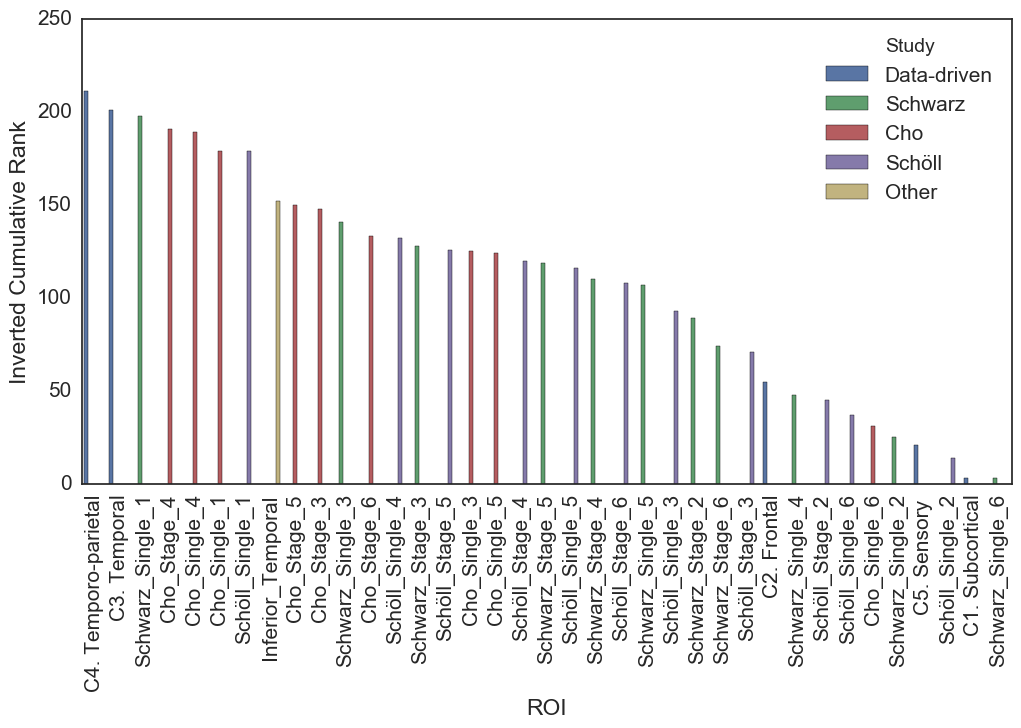

In [36]:
plt.close()
sns.set_context('paper')
sns.set(font_scale=1.5)
sns.set_style('white')
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.barplot(x='dIndex',y='Inverted Cumulative Rank',data=cum_rank.sort_values('Inverted Cumulative Rank',
                                                                                    ascending=False),hue='Study')
sns.plt.xlabel('ROI')
sns.plt.ylabel('Inverted Cumulative Rank')
for item in fig.get_xticklabels():
    item.set_rotation(90)
jnk = fig.get_figure()
jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/rankings.pdf')
plt.show()

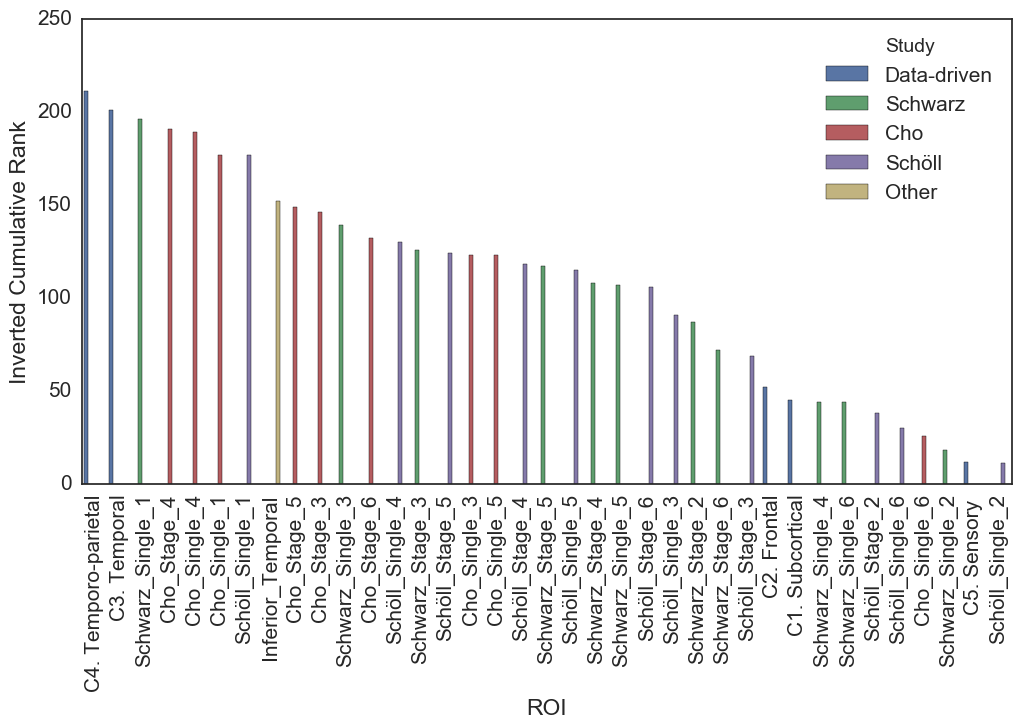

In [37]:
plt.close()
sns.set_context('paper')
sns.set(font_scale=1.5)
sns.set_style('white')
fig,ax = plt.subplots(figsize=(12,6))
fig = sns.barplot(x='dIndex',y='Inverted Cumulative Rank',data=abs_cum_rank.sort_values('Inverted Cumulative Rank',
                                                                                    ascending=False),hue='Study')
sns.plt.xlabel('ROI')
sns.plt.ylabel('Inverted Cumulative Rank')
for item in fig.get_xticklabels():
    item.set_rotation(90)
jnk = fig.get_figure()
jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/absolute_rankings.pdf',bbox_inches='tight')
plt.show()

In [79]:
code = dict(zip(jdf.PTGENDER.unique(),range(2)))
jdf.PTGENDER = [code[jdf.ix[x,'PTGENDER']] for x in jdf.index]
jdf.PTGENDER


//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


0     0
1     1
2     0
3     1
4     0
5     0
6     0
7     1
8     1
9     0
10    1
11    1
12    1
13    1
14    0
15    0
16    0
17    1
18    1
19    0
20    1
21    1
22    0
23    1
24    0
25    0
26    1
27    1
28    0
29    0
     ..
60    0
61    0
62    1
63    0
64    0
65    0
66    1
67    1
68    1
69    0
70    0
71    1
72    0
73    1
74    1
75    1
76    0
77    0
78    0
79    0
80    0
81    0
82    0
83    1
84    0
85    1
86    0
87    1
88    0
89    0
Name: PTGENDER, dtype: int64

In [ ]:
## plt.close()
sns.lmplot('schwarz_atlas_1','CDRSB',data=jdf)
plt.show()

In [48]:
#a_indata=cs[tcols+indvar+pred_var].dropna()

In [21]:
from sklearn.feature_selection import SelectFromModel

//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


there are 5 features


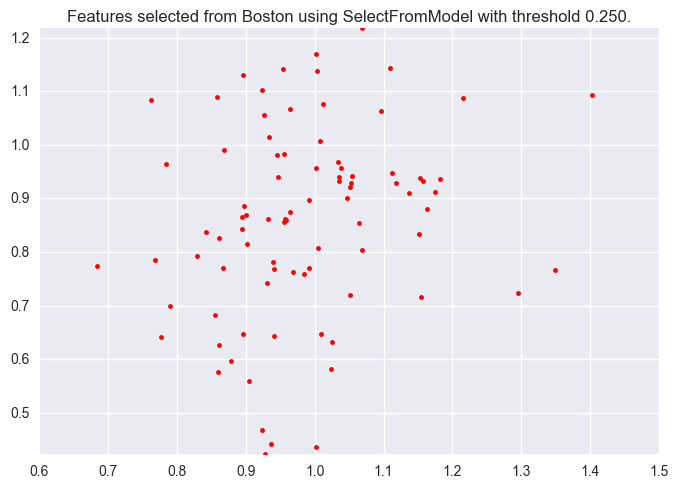

In [27]:
# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = linear_model.LassoCV()
n_xin = a_indata[ncols].values
# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(n_xin, adni_y)
n_features = sfm.transform(n_xin).shape[1]
X_transform = sfm.transform(n_xin)
print('there are %s features'%(n_features))
while n_features > 6:
    sfm.threshold += 0.1
    X_transform = sfm.transform(n_xin)
    n_features = X_transform.shape[1]
plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
#plt.xlabel("Feature number 1")
#plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

In [28]:
newx = sfm.transform(n_xin)
print(newx.shape)
for i in range(newx.shape[-1]):
    arr = newx[:,i]
    for col in ncols:
        if np.allclose(a_indata[col].values,arr):
            print(col)

(86, 5)
schwarz_atlas_6
brain_partition_core_ind_lund_sci5_scf5_1
brain_partition_core_ind_lund_sci5_scf5_4
lund_ET_3_1
lund_ET_6_1
lund_ET_6_3


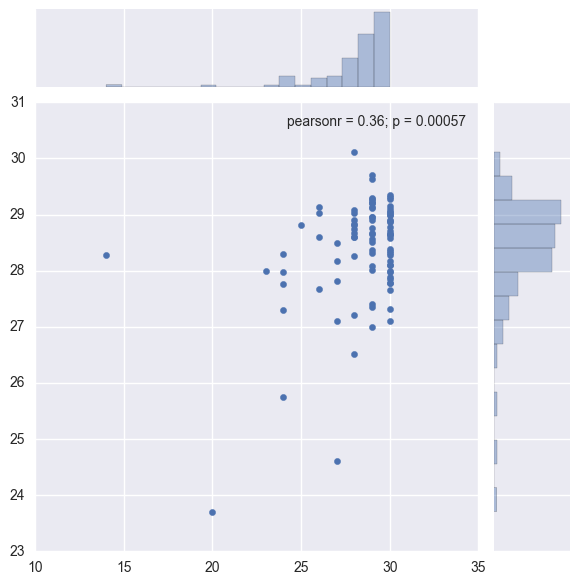

In [387]:
lr = linear_model.LinearRegression()

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, newx, adni_y, cv=10)

plt.close()
sns.jointplot(adni_y,predicted)
plt.show()

In [ ]:
# Now to test each ROI, ROI set, and all ROIs

In [393]:
import scipy.stats as st
st.linregress?

In [431]:
lr = linear_model.LinearRegression()
oneroi_df = pandas.DataFrame(index=ncols)
for dv in pred_var:
    dv_val = a_indata[dv].values
    for col in ncols:
        xval = a_indata[col].values
        slp,inte,rval,pval,se = st.linregress(xval,dv_val)
        oneroi_df.ix[col,'ols_r_%s'%(dv)] = rval
        oneroi_df.ix[col,'ols_p_%s'%(dv)] = pval
        
        xval = xval.reshape(-1,1)
        for i in range(3,11):
            pred = cross_val_predict(lr, xval, dv_val, cv=i)
            scr = cross_val_score(lr, xval, dv_val, cv=i)
            slp,inte,rval,pval,se = st.linregress(pred,dv_val)
            oneroi_df.ix[col,'lr_CV%s_r_%s'%(i,dv)] = rval
            oneroi_df.ix[col,'lr_CV%s_p_%s'%(i,dv)] = pval
            oneroi_df.ix[col,'lr_CV%s_acc_%s'%(i,dv)] = scr.mean()
            oneroi_df.ix[col,'lr_CV%s_medacc_%s'%(i,dv)] = np.median(scr)


In [435]:
oneroi_df.sort_values('lr_CV3_medacc_MMSE',ascending=False)

,ols_r_MMSE,ols_p_MMSE,lr_CV3_r_MMSE,lr_CV3_p_MMSE,lr_CV3_acc_MMSE,lr_CV3_medacc_MMSE,lr_CV4_r_MMSE,lr_CV4_p_MMSE,lr_CV4_acc_MMSE,lr_CV4_medacc_MMSE,...,lr_CV8_acc_ADNI_EF,lr_CV8_medacc_ADNI_EF,lr_CV9_r_ADNI_EF,lr_CV9_p_ADNI_EF,lr_CV9_acc_ADNI_EF,lr_CV9_medacc_ADNI_EF,lr_CV10_r_ADNI_EF,lr_CV10_p_ADNI_EF,lr_CV10_acc_ADNI_EF,lr_CV10_medacc_ADNI_EF
brain_partition_core_ind_lund_sci5_scf5_1,0.214648,0.043386,0.023256,0.828738,-0.097245,-0.085305,0.117527,0.272694,-0.035708,-0.047548,...,-0.013870,0.024094,0.248501,0.018866,0.000470,-0.006218,0.252319,0.017058,-0.024407,0.035939
schwarz_atlas_6,0.139148,0.193430,-0.097380,0.363957,-0.197892,-0.114036,0.032076,0.765397,-0.066265,-0.041291,...,-0.130643,-0.102587,-0.001099,0.991842,-0.079801,0.016247,-0.063212,0.556195,-0.133073,-0.065074
schwarz_atlas_3,-0.182192,0.087483,-0.048947,0.648742,-0.138118,-0.139164,0.012665,0.906227,-0.072462,-0.072109,...,-0.096608,-0.088129,0.106061,0.322554,-0.058949,-0.056953,0.112435,0.294157,-0.102625,-0.063502
Schwarz_Stage_1,-0.181123,0.089388,-0.007893,0.941477,-0.110153,-0.143441,0.028410,0.791558,-0.070377,-0.104364,...,-0.080726,-0.048122,0.133949,0.210767,-0.065913,-0.011851,0.135546,0.205329,-0.114266,-0.035708
schwarz_atlas_1,-0.181123,0.089388,-0.007893,0.941477,-0.110153,-0.143441,0.028410,0.791558,-0.070377,-0.104364,...,-0.080726,-0.048122,0.133949,0.210767,-0.065913,-0.011851,0.135546,0.205329,-0.114266,-0.035708
dkt_Braak_new_atlas_1,-0.169664,0.111941,-0.033128,0.757937,-0.126126,-0.147798,0.016213,0.880129,-0.070185,-0.098774,...,-0.089374,-0.055515,0.132266,0.216612,-0.060551,-0.039493,0.129387,0.226868,-0.109157,-0.036110
dkt_Cho_new_atlas_1,-0.169664,0.111941,-0.033128,0.757937,-0.126126,-0.147798,0.016213,0.880129,-0.070185,-0.098774,...,-0.089374,-0.055515,0.132266,0.216612,-0.060551,-0.039493,0.129387,0.226868,-0.109157,-0.036110
dkt_Braak_stage_1_1,-0.169664,0.111941,-0.033128,0.757937,-0.126126,-0.147798,0.016213,0.880129,-0.070185,-0.098774,...,-0.089374,-0.055515,0.132266,0.216612,-0.060551,-0.039493,0.129387,0.226868,-0.109157,-0.036110
dkt_Cho_stage_1_1,-0.169664,0.111941,-0.033128,0.757937,-0.126126,-0.147798,0.016213,0.880129,-0.070185,-0.098774,...,-0.089374,-0.055515,0.132266,0.216612,-0.060551,-0.039493,0.129387,0.226868,-0.109157,-0.036110
brain_partition_core_ind_lund_sci5_scf5_5,-0.057500,0.592494,-0.205778,0.053037,-0.169162,-0.152137,-0.136757,0.201270,-0.091608,-0.084836,...,-0.091832,-0.111242,0.021111,0.844322,-0.044102,-0.055095,-0.042999,0.689082,-0.124147,-0.061116


In [ ]:
cs.av45_status_wcb

In [ ]:
# Try again after Z-scoring 
    # (concatenating a StandardScaler and the LinearRegression into a pipeline using 
    # sklearn.pipeline.Pipeline)
# Try with SVR and different kernels


In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [247]:
#Pipeline?
#StandardScaler?
LassoLarsCV?

In [467]:
xval = a_indata['brain_partition_core_ind_lund_sci5_scf5_4'].values.reshape(-1,1)
s_y = scl.fit(a_indata['MMSE'].values.reshape(-1,1))

In [469]:
s_y = s_y.transform(a_indata['MMSE'].values.reshape(-1,1))

In [470]:
# Try again after Z-scoring 
    # (concatenating a StandardScaler and the LinearRegression into a pipeline using 
    # sklearn.pipeline.Pipeline)

scl = StandardScaler()
lr = linear_model.LinearRegression()
scl_LR = Pipeline([('scale', scl),('regres', lr)])
scl_LR.fit(xval,s_y)
scl_LR.predict(s_y)
scl_LR.score(xval,s_y)


0.070065151155121908

In [471]:
cvp = cross_val_predict(scl_LR,xval,dv_val,cv=10)
cscr = cross_val_score(scl_LR,xval,dv_val,cv=10)
#cv_scl_LR = Pipeline([('scale', scl)],('cvr', cvp))
#cv_scl_LR.fit(xval,dv_val)

In [472]:
cscr

array([-0.07404556, -0.02272695, -0.11165095, -0.03733485, -0.03207387,
        0.01713968, -0.17470067, -0.21088895, -0.14978606, -0.00184365])

In [480]:
s_y.flatten()

array([ 0.67619781, -0.53551236, -3.3628361 , -0.13160897,  0.67619781,
        0.67619781,  0.67619781,  0.67619781,  0.67619781,  0.67619781,
       -1.34331914,  0.27229442,  0.27229442,  0.67619781,  0.67619781,
        0.27229442,  0.27229442,  0.27229442,  0.67619781, -2.15112593,
        0.67619781, -0.13160897,  0.27229442, -0.13160897,  0.27229442,
        0.27229442,  0.67619781, -0.13160897,  0.67619781, -0.13160897,
        0.67619781,  0.27229442,  0.27229442,  0.27229442, -1.74722254,
        0.67619781, -1.74722254,  0.67619781, -0.13160897,  0.67619781,
        0.27229442, -0.93941575,  0.67619781,  0.67619781, -0.53551236,
        0.27229442,  0.67619781, -0.93941575, -0.93941575, -1.74722254,
       -0.53551236,  0.67619781, -0.13160897,  0.67619781, -1.74722254,
       -5.78625645, -0.13160897,  0.27229442, -0.53551236,  0.67619781,
        0.27229442,  0.67619781, -0.13160897,  0.67619781,  0.27229442,
       -0.13160897,  0.27229442, -0.93941575,  0.67619781,  0.67

In [481]:
st.pearsonr(cvp,s_y.flatten())

(0.19134397085743504, 0.072454275663718246)

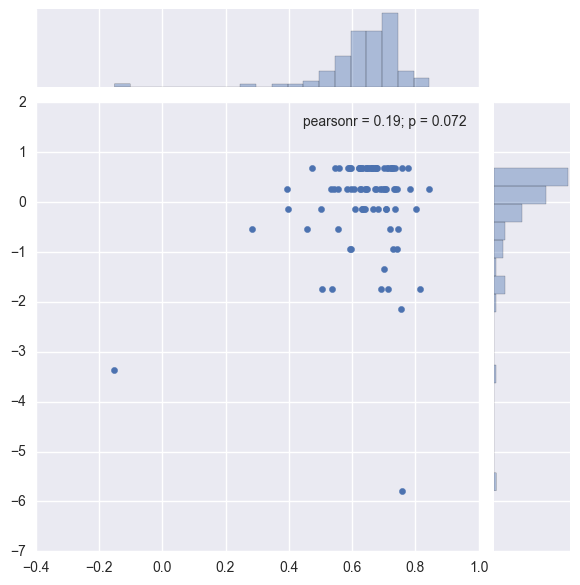

In [482]:
plt.close()
sns.jointplot(cvp,s_y.flatten())
plt.show()

In [483]:
# Try with SVR and different kernels
from sklearn.svm import SVR

In [499]:
svrX = a_indata['brain_partition_core_ind_lund_sci5_scf5_4'].values.reshape(-1,1)
svry = a_indata['MMSE'].values

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(svrX, svry).predict(svrX)
y_lin = svr_lin.fit(svrX, svry).predict(svrX)
y_poly = svr_poly.fit(svrX, svry).predict(svrX)
print('rbf',svr_rbf.fit(svrX, svry).score(svrX,svry))
print('linear',svr_lin.fit(svrX, svry).score(svrX,svry))
print('quadratic',svr_poly.fit(svrX, svry).score(svrX,svry))

rbf 0.0922468056156
linear -0.0109316605603
quadratic 0.0327171289755


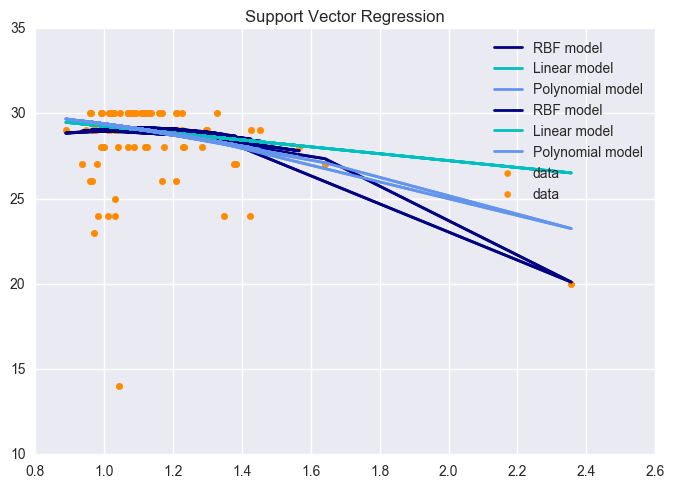

In [488]:
lw = 2
plt.scatter(svrX, svry, color='darkorange', label='data')
plt.hold('on')
plt.plot(svrX, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(svrX, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(svrX, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
#plt.xlabel('data')
#plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [497]:
# Add scale
scl = StandardScaler()
jsvr = SVR(kernel='rbf', C=1e3, gamma=0.1)
scl_svr = Pipeline([('scale', scl),('svr', jsvr)])

y_rbf = scl_svr.fit(svrX, svry).predict(svrX)
scl_svr.set_params(svr__kernel='linear')
print('rbf',scl_svr.score(svrX,svry))
y_lin = scl_svr.fit(svrX, svry).predict(svrX)
print('linear',scl_svr.score(svrX,svry))
scl_svr.set_params(svr__kernel='poly',svr__degree=2)
y_poly = scl_svr.fit(svrX, svry).predict(svrX)
print('quadratic',scl_svr.score(svrX,svry))


rbf -483.027529899
linear -0.0108893175389
quadratic 0.093520417053


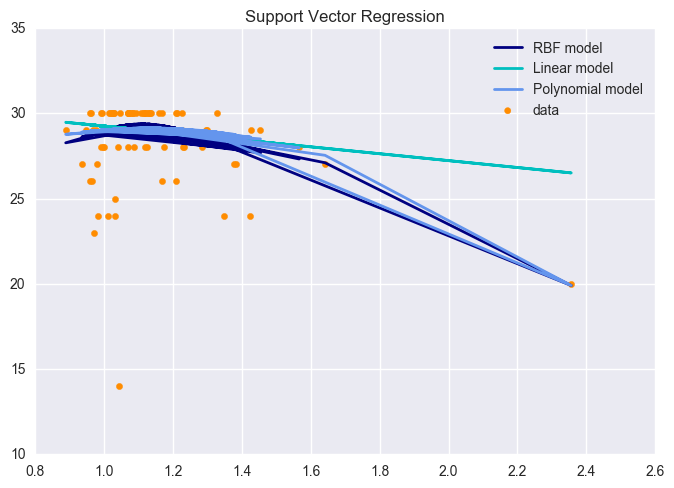

In [492]:
lw = 2
plt.scatter(svrX, svry, color='darkorange', label='data')
plt.hold('on')
plt.plot(svrX, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(svrX, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(svrX, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
#plt.xlabel('data')
#plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [500]:
# Add CV
scl = StandardScaler()
jsvr = SVR(kernel='rbf', C=1e3, gamma=0.1)
scl_svr = Pipeline([('scale', scl),('svr', jsvr)])

y_rbf = cross_val_predict(scl_svr,svrX,svry,cv=10)
print('rbf',cross_val_score(scl_svr,svrX,svry,cv=10).mean())
scl_svr.set_params(svr__kernel='linear')
y_lin = cross_val_predict(scl_svr,svrX,svry,cv=10)
print('linear',cross_val_score(scl_svr,svrX,svry,cv=10).mean())
scl_svr.set_params(svr__kernel='poly',svr__degree=2)
y_poly = cross_val_predict(scl_svr,svrX,svry,cv=10)
print('poly',cross_val_score(scl_svr,svrX,svry,cv=10).mean())

rbf -0.534997888363
linear -0.225638292608
poly -0.0792793852144


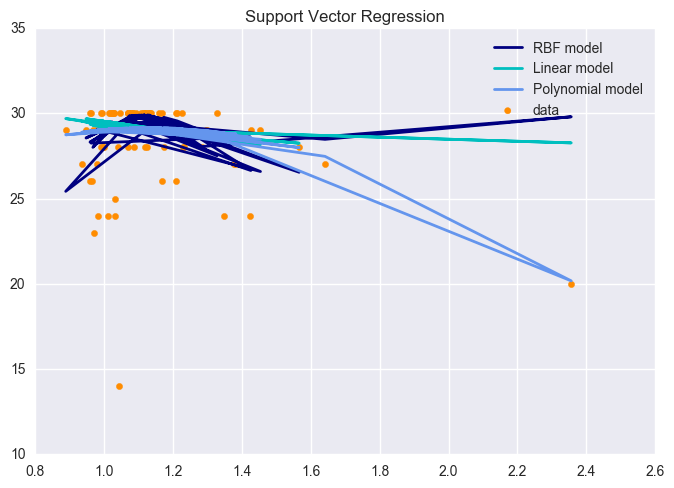

In [501]:
lw = 2
plt.scatter(svrX, svry, color='darkorange', label='data')
plt.hold('on')
plt.plot(svrX, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(svrX, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(svrX, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
#plt.xlabel('data')
#plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [537]:
# Try in amyloid+ and controls
ctrls = cs[cs.DX_final=='NL'] 
ampos = cs[(cs.DX_final!='NL') & (cs.av45_status_wcb == 1)]
for i in ampos.index:
    for col in ctrls.columns:
        ctrls.ix[i,col] = ampos.ix[i,col]

//anaconda/envs/py3/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [547]:
ap_indata = ctrls[ncols+pred_var+indvar].dropna()

In [548]:
svrX = ap_indata['brain_partition_core_ind_lund_sci5_scf5_4'].values.reshape(-1,1)
svry = ap_indata['MMSE'].values

# Full blown with CV
scl = StandardScaler()
jsvr = SVR(kernel='rbf', C=1e3, gamma=0.1)
scl_svr = Pipeline([('scale', scl),('svr', jsvr)])

y_rbf = cross_val_predict(scl_svr,svrX,svry,cv=10)
print('rbf',cross_val_score(scl_svr,svrX,svry,cv=10).mean())
scl_svr.set_params(svr__kernel='linear')
y_lin = cross_val_predict(scl_svr,svrX,svry,cv=10)
print('linear',cross_val_score(scl_svr,svrX,svry,cv=10).mean())
scl_svr.set_params(svr__kernel='poly',svr__degree=2)
y_poly = cross_val_predict(scl_svr,svrX,svry,cv=10)
print('poly',cross_val_score(scl_svr,svrX,svry,cv=10).mean())

rbf -0.44378373196
linear -0.33465083906
poly -0.152410030627


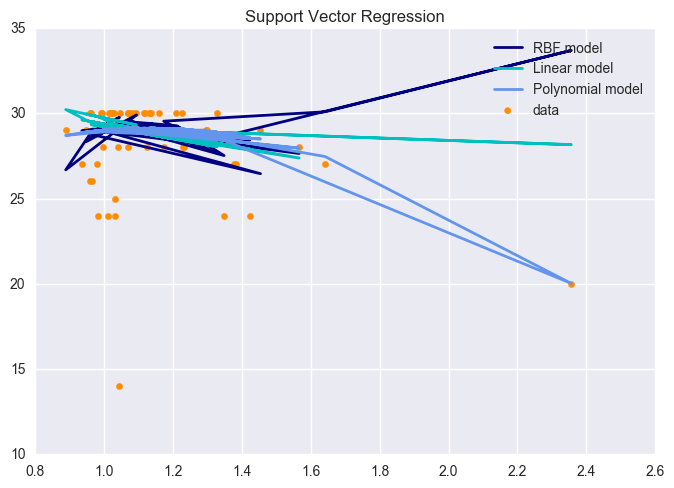

In [550]:
plt.close()
lw = 2
plt.scatter(svrX, svry, color='darkorange', label='data')
plt.hold('on')
plt.plot(svrX, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(svrX, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(svrX, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
#plt.xlabel('data')
#plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [556]:
svrX[:,0]

array([ 1.1357667 ,  1.32805649,  1.08450069,  1.03217965,  1.18747159,
        1.07178914,  0.99495029,  1.01729876,  0.97515608,  0.96738947,
        1.02266845,  1.14920754,  1.1309611 ,  1.22895623,  1.23105797,
        1.11531897,  1.03110369,  0.96244904,  1.11963427,  1.04107824,
        1.0298811 ,  1.22612077,  0.96508591,  0.99165218,  1.29707845,
        0.96001303,  0.93535865,  1.01369345,  1.06802338,  1.38249296,
        1.02377994,  1.04544755,  0.99630342,  1.07004907,  1.10075674,
        1.07033529,  1.15864601,  1.03696726,  1.0696334 ,  1.13298035,
        1.12533715,  1.29961898,  1.17311191,  1.64125785,  2.35619313,
        1.2846081 ,  1.20928695,  1.0753749 ,  1.03428915,  1.56638606,
        1.01247563,  1.42271841,  1.22536285,  1.37573179,  1.03257423,
        0.98212721,  1.04449484,  1.01716024,  0.94748575,  1.09397457,
        0.88855299,  0.95903577,  1.45395864,  0.98000567,  1.01130322,
        1.34824117,  1.21218249])

In [559]:
arrz = [svrX,svry,y_rbf,y_lin,y_poly]
jnk = []
for arr in arrz:
    if len(arr.shape) > 1:
        arr = arr[:,0]
    jnk.append(pandas.Series(arr))
forplot=pandas.concat(jnk,axis=1)
forplot.columns = ['svrX','svry','y_rbf','y_lin','y_poly']
forplot.columns

Index(['svrX', 'svry', 'y_rbf', 'y_lin', 'y_poly'], dtype='object')

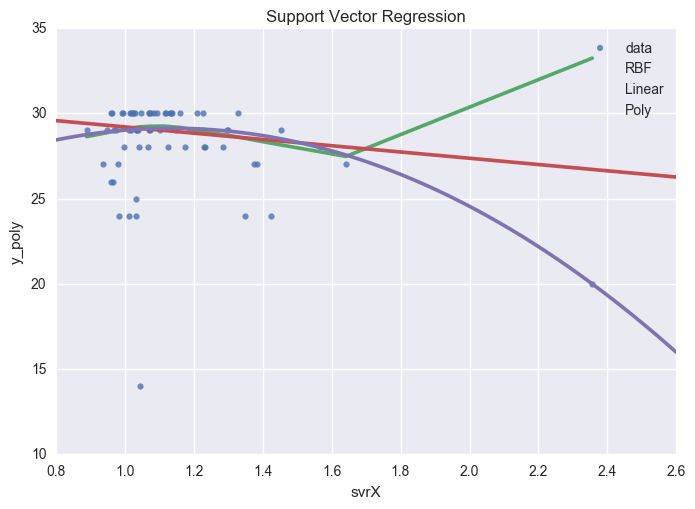

In [565]:

plt.close()
sns.regplot('svrX','svry',forplot,fit_reg=False,label='data')
sns.regplot('svrX','y_rbf',forplot,lowess=True, ci=None,marker=None,label='RBF')
sns.regplot('svrX','y_lin',forplot,ci=None,marker=None,label='Linear')
sns.regplot('svrX','y_poly',forplot,order=2, ci=None, marker=None, label='Poly')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [566]:
# NuSVR
from sklearn.svm import NuSVR


In [575]:
# Full blown with CV
scl = StandardScaler()
jsvr = NuSVR(kernel='rbf', C=1e3, gamma=0.1)
scl_svr = Pipeline([('scale', scl),('svr', jsvr)])

y_rbf = cross_val_predict(scl_svr,svrX,svry,cv=10)
print('rbf',cross_val_score(scl_svr,svrX,svry,cv=10).mean())
scl_svr.set_params(svr__kernel='linear')
y_lin = cross_val_predict(scl_svr,svrX,svry,cv=10)
print('linear',cross_val_score(scl_svr,svrX,svry,cv=10).mean())
scl_svr.set_params(svr__kernel='poly',svr__degree=2)
y_poly = cross_val_predict(scl_svr,svrX,svry,cv=10)
print('poly',cross_val_score(scl_svr,svrX,svry,cv=10).mean())

rbf -0.293948334084
linear -0.367030473903
poly -0.203735725986


In [616]:
a_indata[['AGE','PTGENDER','PTEDUCAT']]

,AGE,PTGENDER,PTEDUCAT
0,66.4,1,15.0
1,72.8,2,16.0
2,70.0,1,18.0
3,75.4,2,18.0
4,68.0,1,14.0
5,67.4,1,20.0
6,77.1,1,19.0
7,70.8,2,18.0
8,65.1,2,16.0
9,79.2,1,14.0


In [584]:
# One big model testin everything
lr = linear_model.LinearRegression()

scl = StandardScaler()
jsvr = SVR(kernel='rbf', C=1e3, gamma=0.1)
scl_svr = Pipeline([('scale', scl),('svr', jsvr)])
nsvr = NuSVR(kernel='rbf', C=1e3, gamma=0.1)
scl_nsvr = Pipeline([('scale', scl),('svr', nsvr)])
mods = {'SVR': scl_svr, 'nu': scl_nsvr}

oneroi_df = pandas.DataFrame(index=ncols)


for dv in pred_var:
    print('>>>>>working on',dv,'<<<<<<<<')
    dv_val = a_indata[dv].values
    for col in ncols:
        print('working on',col)
        # Regular model
        xval = a_indata[[col].values
        slp,inte,rval,pval,se = st.linregress(xval,dv_val)
        oneroi_df.ix[col,'ols_r_%s'%(dv)] = rval
        oneroi_df.ix[col,'ols_p_%s'%(dv)] = pval
        
        xval = xval.reshape(-1,1)
        
        # Cross-validate
        cvs = [3,10]
        for i in cvs:
            pred = cross_val_predict(lr, xval, dv_val, cv=i)
            scr = cross_val_score(lr, xval, dv_val, cv=i)
            slp,inte,rval,pval,se = st.linregress(pred,dv_val)
            oneroi_df.ix[col,'lr_CV%s_r_%s'%(i,dv)] = rval
            oneroi_df.ix[col,'lr_CV%s_p_%s'%(i,dv)] = pval
            oneroi_df.ix[col,'lr_CV%s_acc_%s'%(i,dv)] = scr.mean()
            oneroi_df.ix[col,'lr_CV%s_medacc_%s'%(i,dv)] = np.median(scr)
        
        # SVR
        for mnm,mod in mods.items():
            mod.set_params(svr__kernel='rbf')
            y_rbf = mod.fit(xval,dv_val).predict(xval)
            scr_rbf = mod.score(xval,dv_val)
            mod.set_params(svr__kernel='linear')
            y_lin = mod.fit(xval,dv_val).predict(xval)
            scr_lin = mod.score(xval,dv_val)
            mod.set_params(svr__kernel='poly',svr__degree=2)
            y_poly = mod.fit(xval,dv_val).predict(xval)
            scr_poly = mod.score(xval,dv_val)
            res = zip([y_rbf,y_lin,y_poly],[scr_rbf,scr_lin,scr_poly])
            ys = dict(zip(['rbf','lin','poly'],res))
            for k,v in ys.items():
                slp,inte,rval,pval,se = st.linregress(v[0],dv_val)
                oneroi_df.ix[col,'%s_%s_r_%s'%(mnm,k,dv)] = rval
                oneroi_df.ix[col,'%s_%s_p_%s'%(mnm,k,dv)] = pval
                oneroi_df.ix[col,'%s_%s_acc_%s'%(mnm,k,dv)] = v[1].mean()
                oneroi_df.ix[col,'%s_%s_medacc_%s'%(mnm,k,dv)] = np.median(v[1])

            # Cross-validate
            for i in cvs:
                mod.set_params(svr__kernel='rbf')
                y_rbf = cross_val_predict(mod,xval,dv_val,cv=i)
                scr_rbf = cross_val_score(mod,xval,dv_val,cv=i).mean()
                scl_svr.set_params(svr__kernel='linear')
                y_lin = cross_val_predict(mod,xval,dv_val,cv=i)
                scr_lin = cross_val_score(mod,xval,dv_val,cv=i).mean()
                mod.set_params(svr__kernel='poly',svr__degree=2)
                y_poly = cross_val_predict(mod,xval,dv_val,cv=i)
                scr_poly = cross_val_score(mod,xval,dv_val,cv=i).mean()
                res = zip([y_rbf,y_lin,y_poly],[scr_rbf,scr_lin,scr_poly])
                ys = dict(zip(['rbf','lin','poly'],res))
                for k,v in ys.items():
                    slp,inte,rval,pval,se = st.linregress(v[0],dv_val)
                    oneroi_df.ix[col,'%s_CV%s_%s_r_%s'%(mnm,i,k,dv)] = rval
                    oneroi_df.ix[col,'%s_CV%s_%s_p_%s'%(mnm,i,k,dv)] = pval
                    oneroi_df.ix[col,'%s_CV%s_%s_acc_%s'%(mnm,i,k,dv)] = v[1].mean()
                    oneroi_df.ix[col,'%s_CV%s_%s_medacc_%s'%(mnm,i,k,dv)] = np.median(v[1])

            



>>>>>working on MMSE <<<<<<<<
working on dkt_Braak_new_atlas_1
working on dkt_Braak_new_atlas_2
working on dkt_Braak_new_atlas_3
working on dkt_Braak_new_atlas_4
working on dkt_Braak_new_atlas_5
working on dkt_Braak_new_atlas_6
working on dkt_Braak_stage_1_1
working on dkt_Braak_stage_2_2
working on dkt_Braak_stage_3_3
working on dkt_Braak_stage_4_4
working on dkt_Braak_stage_5_5
working on dkt_Braak_stage_6_6
working on dkt_Cho_new_atlas_1
working on dkt_Cho_new_atlas_2
working on dkt_Cho_new_atlas_3
working on dkt_Cho_new_atlas_4
working on dkt_Cho_new_atlas_5
working on dkt_Cho_stage_1_1
working on dkt_Cho_stage_2_2
working on dkt_Cho_stage_3_3
working on dkt_Cho_stage_4_4
working on dkt_Cho_stage_5_5
working on inf_temp_1
working on schwarz_atlas_1
working on schwarz_atlas_2
working on schwarz_atlas_3
working on schwarz_atlas_4
working on schwarz_atlas_5
working on schwarz_atlas_6
working on Schwarz_Stage_1
working on Schwarz_Stage_2
working on Schwarz_Stage_3
working on Schwarz_St

In [585]:
oneroi_df

,ols_r_MMSE,ols_p_MMSE,lr_CV3_r_MMSE,lr_CV3_p_MMSE,lr_CV3_acc_MMSE,lr_CV3_medacc_MMSE,lr_CV10_r_MMSE,lr_CV10_p_MMSE,lr_CV10_acc_MMSE,lr_CV10_medacc_MMSE,...,SVR_CV10_lin_acc_ADNI_EF,SVR_CV10_lin_medacc_ADNI_EF,SVR_CV10_poly_r_ADNI_EF,SVR_CV10_poly_p_ADNI_EF,SVR_CV10_poly_acc_ADNI_EF,SVR_CV10_poly_medacc_ADNI_EF,SVR_CV10_rbf_r_ADNI_EF,SVR_CV10_rbf_p_ADNI_EF,SVR_CV10_rbf_acc_ADNI_EF,SVR_CV10_rbf_medacc_ADNI_EF
dkt_Braak_new_atlas_1,-0.169664,0.111941,-0.033128,0.757937,-0.126126,-0.147798,-0.012629,0.906494,-0.435328,-0.182428,...,-0.090064,-0.090064,0.130102,0.224291,-0.098155,-0.098155,0.132282,0.216553,-0.266287,-0.266287
dkt_Braak_new_atlas_2,0.090987,0.396441,-0.197318,0.063819,-0.198556,-0.160209,-0.087084,0.417091,-0.485958,-0.057558,...,-0.084817,-0.084817,-0.025880,0.809755,-0.130186,-0.130186,0.080423,0.453739,-0.247429,-0.247429
dkt_Braak_new_atlas_3,-0.127496,0.233788,-0.183498,0.085198,-0.195238,-0.159163,-0.100511,0.348661,-0.547377,-0.131127,...,-0.101461,-0.101461,0.045740,0.670377,-0.090787,-0.090787,0.047767,0.656666,-0.180264,-0.180264
dkt_Braak_new_atlas_4,-0.167641,0.116346,-0.276242,0.008782,-0.254636,-0.226470,-0.265039,0.012070,-0.578898,-0.179967,...,-0.095615,-0.095615,0.066972,0.532902,-0.423535,-0.423535,-0.033256,0.757026,-2.035596,-2.035596
dkt_Braak_new_atlas_5,-0.181897,0.088005,-0.211963,0.046140,-0.195469,-0.226843,-0.216559,0.041511,-0.579999,-0.178310,...,-0.087667,-0.087667,0.053738,0.616966,-0.088948,-0.088948,-0.100313,0.349618,-1.200368,-1.200368
dkt_Braak_new_atlas_6,-0.079038,0.461574,-0.193692,0.068955,-0.169419,-0.177707,-0.210693,0.047492,-0.531775,-0.133445,...,-0.107397,-0.107397,-0.076091,0.478498,-0.116380,-0.116380,0.031092,0.772397,-0.365047,-0.365047
dkt_Braak_stage_1_1,-0.169664,0.111941,-0.033128,0.757937,-0.126126,-0.147798,-0.012629,0.906494,-0.435328,-0.182428,...,-0.090064,-0.090064,0.130102,0.224291,-0.098155,-0.098155,0.132282,0.216553,-0.266287,-0.266287
dkt_Braak_stage_2_2,-0.021173,0.843869,-0.276530,0.008709,-0.207793,-0.174671,-0.394941,0.000128,-0.506401,-0.131324,...,-0.120976,-0.120976,0.074794,0.486050,-0.097057,-0.097057,0.091315,0.394734,-0.254885,-0.254885
dkt_Braak_stage_3_3,-0.102601,0.338680,-0.220716,0.037663,-0.203465,-0.168723,-0.163685,0.125343,-0.529503,-0.144508,...,-0.106171,-0.106171,0.024354,0.820784,-0.115470,-0.115470,0.045194,0.674083,-0.164323,-0.164323
dkt_Braak_stage_4_4,-0.151777,0.155647,-0.256562,0.015226,-0.239009,-0.210023,-0.221719,0.036781,-0.566717,-0.170060,...,-0.099829,-0.099829,0.063257,0.555913,-0.196506,-0.196506,0.114116,0.286953,-0.297947,-0.297947


In [857]:
acc_cols = [x for x in oneroi_df.columns if 'acc' in x]
a_mem = 0
a_ef = 0
a_mmse = 0
for sub in oneroi_df.index:
    for col in acc_cols:
        if 'CV' in col and 'med' not in col:
            val = oneroi_df.ix[sub,col]
            if val>0:
                if 'MMSE' in col:
                    if val > a_mmse:
                        a_mmse = val
                        best_mmse = (sub,col)
                elif 'MEM' in col:
                    if val > a_mem:
                        a_mem = val
                        best_mem = (sub,col)
                elif 'EF' in col:
                    if val > a_ef:
                        a_ef = val
                        best_ef = (sub,col)


In [633]:
#sorted([(y,x) for x,y in jnk.items() if 'CV' in x])

In [624]:
jnk = oneroi_df.loc['brain_partition_core_ind_lund_sci5_scf5_4'][acc_cols]

In [858]:
print(best_mem,a_mem,'\n')
print(best_ef,a_ef,'\n')
print(best_mmse,a_mmse,'\n')

('schwarz_atlas_1', 'lr_CV3_acc_ADNI_MEM') 0.265120709022 

('brain_partition_core_ind_lund_sci5_scf5_1', 'lr_CV3_acc_ADNI_EF') 0.0869184710207 

('schwarz_atlas_6', 'nu_rbf_acc_MMSE') 0 



In [636]:
nocov_1roi = oneroi_df

In [640]:
# One big model testin everything WITH covariates

lr = linear_model.LinearRegression()

scl = StandardScaler()
jsvr = SVR(kernel='rbf', C=1e3, gamma=0.1)
scl_svr = Pipeline([('scale', scl),('svr', jsvr)])
nsvr = NuSVR(kernel='rbf', C=1e3, gamma=0.1)
scl_nsvr = Pipeline([('scale', scl),('svr', nsvr)])
mods = {'SVR': scl_svr, 'nu': scl_nsvr}

oneroi_df = pandas.DataFrame(index=ncols)


for dv in pred_var:
    print('>>>>>working on',dv,'<<<<<<<<')
    dv_val = a_indata[dv].values
    for col in ncols:
        print('working on',col)
        # Regular model
        xval = a_indata[['AGE','PTGENDER','PTEDUCAT',col]].values.astype(float)
#        slp,inte,rval,pval,se = st.linregress(xval,dv_val)
#        oneroi_df.ix[col,'ols_r_%s'%(dv)] = rval
#        oneroi_df.ix[col,'ols_p_%s'%(dv)] = pval
        
#        xval = xval.reshape(-1,1)
        
        # Cross-validate
        cvs = [3,10]
        for i in cvs:
            pred = cross_val_predict(lr, xval, dv_val, cv=i)
            scr = cross_val_score(lr, xval, dv_val, cv=i)
            slp,inte,rval,pval,se = st.linregress(pred,dv_val)
            oneroi_df.ix[col,'lr_CV%s_r_%s'%(i,dv)] = rval
            oneroi_df.ix[col,'lr_CV%s_p_%s'%(i,dv)] = pval
            oneroi_df.ix[col,'lr_CV%s_acc_%s'%(i,dv)] = scr.mean()
            oneroi_df.ix[col,'lr_CV%s_medacc_%s'%(i,dv)] = np.median(scr)
        
        # SVR
        for mnm,mod in mods.items():
            mod.set_params(svr__kernel='rbf')
            y_rbf = mod.fit(xval,dv_val).predict(xval)
            scr_rbf = mod.score(xval,dv_val)
            mod.set_params(svr__kernel='linear')
            y_lin = mod.fit(xval,dv_val).predict(xval)
            scr_lin = mod.score(xval,dv_val)
            mod.set_params(svr__kernel='poly',svr__degree=2)
            y_poly = mod.fit(xval,dv_val).predict(xval)
            scr_poly = mod.score(xval,dv_val)
            res = zip([y_rbf,y_lin,y_poly],[scr_rbf,scr_lin,scr_poly])
            ys = dict(zip(['rbf','lin','poly'],res))
            for k,v in ys.items():
                slp,inte,rval,pval,se = st.linregress(v[0],dv_val)
                oneroi_df.ix[col,'%s_%s_r_%s'%(mnm,k,dv)] = rval
                oneroi_df.ix[col,'%s_%s_p_%s'%(mnm,k,dv)] = pval
                oneroi_df.ix[col,'%s_%s_acc_%s'%(mnm,k,dv)] = v[1].mean()
                oneroi_df.ix[col,'%s_%s_medacc_%s'%(mnm,k,dv)] = np.median(v[1])

            # Cross-validate
            for i in cvs:
                mod.set_params(svr__kernel='rbf')
                y_rbf = cross_val_predict(mod,xval,dv_val,cv=i)
                scr_rbf = cross_val_score(mod,xval,dv_val,cv=i).mean()
                scl_svr.set_params(svr__kernel='linear')
                y_lin = cross_val_predict(mod,xval,dv_val,cv=i)
                scr_lin = cross_val_score(mod,xval,dv_val,cv=i).mean()
                mod.set_params(svr__kernel='poly',svr__degree=2)
                y_poly = cross_val_predict(mod,xval,dv_val,cv=i)
                scr_poly = cross_val_score(mod,xval,dv_val,cv=i).mean()
                res = zip([y_rbf,y_lin,y_poly],[scr_rbf,scr_lin,scr_poly])
                ys = dict(zip(['rbf','lin','poly'],res))
                for k,v in ys.items():
                    slp,inte,rval,pval,se = st.linregress(v[0],dv_val)
                    oneroi_df.ix[col,'%s_CV%s_%s_r_%s'%(mnm,i,k,dv)] = rval
                    oneroi_df.ix[col,'%s_CV%s_%s_p_%s'%(mnm,i,k,dv)] = pval
                    oneroi_df.ix[col,'%s_CV%s_%s_acc_%s'%(mnm,i,k,dv)] = v[1].mean()
                    oneroi_df.ix[col,'%s_CV%s_%s_medacc_%s'%(mnm,i,k,dv)] = np.median(v[1])

            




>>>>>working on MMSE <<<<<<<<
working on dkt_Braak_new_atlas_1
working on dkt_Braak_new_atlas_2
working on dkt_Braak_new_atlas_3
working on dkt_Braak_new_atlas_4
working on dkt_Braak_new_atlas_5
working on dkt_Braak_new_atlas_6
working on dkt_Braak_stage_1_1
working on dkt_Braak_stage_2_2
working on dkt_Braak_stage_3_3
working on dkt_Braak_stage_4_4
working on dkt_Braak_stage_5_5
working on dkt_Braak_stage_6_6
working on dkt_Cho_new_atlas_1
working on dkt_Cho_new_atlas_2
working on dkt_Cho_new_atlas_3
working on dkt_Cho_new_atlas_4
working on dkt_Cho_new_atlas_5
working on dkt_Cho_stage_1_1
working on dkt_Cho_stage_2_2
working on dkt_Cho_stage_3_3
working on dkt_Cho_stage_4_4
working on dkt_Cho_stage_5_5
working on inf_temp_1
working on schwarz_atlas_1
working on schwarz_atlas_2
working on schwarz_atlas_3
working on schwarz_atlas_4
working on schwarz_atlas_5
working on schwarz_atlas_6
working on Schwarz_Stage_1
working on Schwarz_Stage_2
working on Schwarz_Stage_3
working on Schwarz_St

In [641]:
oneroi_df.sort_values('')

,lr_CV3_r_MMSE,lr_CV3_p_MMSE,lr_CV3_acc_MMSE,lr_CV3_medacc_MMSE,lr_CV10_r_MMSE,lr_CV10_p_MMSE,lr_CV10_acc_MMSE,lr_CV10_medacc_MMSE,nu_lin_r_MMSE,nu_lin_p_MMSE,...,SVR_CV10_lin_acc_ADNI_EF,SVR_CV10_lin_medacc_ADNI_EF,SVR_CV10_poly_r_ADNI_EF,SVR_CV10_poly_p_ADNI_EF,SVR_CV10_poly_acc_ADNI_EF,SVR_CV10_poly_medacc_ADNI_EF,SVR_CV10_rbf_r_ADNI_EF,SVR_CV10_rbf_p_ADNI_EF,SVR_CV10_rbf_acc_ADNI_EF,SVR_CV10_rbf_medacc_ADNI_EF
dkt_Braak_new_atlas_1,0.099906,0.351583,-0.189117,-0.099482,0.018816,0.861064,-0.703374,-0.196765,0.279619,0.007959,...,-0.042168,-0.042168,0.113053,0.291493,-0.228609,-0.228609,0.046554,0.664857,-2.767705,-2.767705
dkt_Braak_new_atlas_2,0.037423,0.727706,-0.182874,-0.150501,0.029027,0.787138,-0.603373,-0.202702,0.253679,0.016451,...,-0.066684,-0.066684,0.061663,0.565931,-0.234500,-0.234500,0.105071,0.327114,-2.878350,-2.878350
dkt_Braak_new_atlas_3,0.018354,0.864447,-0.252796,-0.107086,-0.013930,0.896910,-0.832520,-0.174310,0.260526,0.013671,...,-0.127266,-0.127266,0.198355,0.062408,-0.102597,-0.102597,0.141076,0.187271,-1.709006,-1.709006
dkt_Braak_new_atlas_4,-0.078697,0.463518,-0.323733,-0.310929,-0.108029,0.313604,-0.846058,-0.271272,0.290362,0.005775,...,-0.131087,-0.131087,0.107131,0.317666,-1.873455,-1.873455,0.070087,0.513980,-4.141772,-4.141772
dkt_Braak_new_atlas_5,-0.041315,0.700670,-0.246018,-0.204687,-0.094896,0.376377,-0.810415,-0.259048,0.299188,0.004397,...,-0.086985,-0.086985,0.131071,0.220829,-0.582346,-0.582346,0.033015,0.758736,-4.170706,-4.170706
dkt_Braak_new_atlas_6,0.045468,0.672219,-0.155016,-0.127141,-0.004092,0.969638,-0.691848,-0.184422,0.256536,0.015237,...,-0.103963,-0.103963,0.161465,0.130621,-0.210226,-0.210226,0.051997,0.628435,-5.592368,-5.592368
dkt_Braak_stage_1_1,0.099906,0.351583,-0.189117,-0.099482,0.018816,0.861064,-0.703374,-0.196765,0.279619,0.007959,...,-0.042168,-0.042168,0.113053,0.291493,-0.228609,-0.228609,0.046554,0.664857,-2.767705,-2.767705
dkt_Braak_stage_2_2,0.014763,0.890781,-0.224238,-0.103772,-0.013362,0.901094,-0.697454,-0.201481,0.244281,0.021053,...,-0.132374,-0.132374,0.101288,0.344930,-0.160240,-0.160240,0.286376,0.006514,-1.731893,-1.731893
dkt_Braak_stage_3_3,0.009997,0.925916,-0.256999,-0.110982,-0.018585,0.862754,-0.802666,-0.178689,0.250243,0.018021,...,-0.124916,-0.124916,0.174894,0.101153,-0.127206,-0.127206,0.085829,0.423863,-2.314152,-2.314152
dkt_Braak_stage_4_4,-0.053820,0.616429,-0.306208,-0.227399,-0.077487,0.470439,-0.846063,-0.269086,0.279261,0.008043,...,-0.115807,-0.115807,0.118438,0.268968,-0.749528,-0.749528,0.038366,0.721123,-3.618271,-3.618271


In [859]:
acc_cols = [x for x in oneroi_df.columns if 'acc' in x]
a_mem = 0
a_ef = 0
a_mmse = 0
for sub in oneroi_df.index:
    for col in acc_cols:
        if 'CV10' in col and 'med' not in col:
#        if 'med' not in col:
            val = oneroi_df.ix[sub,col]
            if val>0:
                if 'MMSE' in col:
                    if val > a_mmse:
                        a_mmse = val
                        best_mmse = (sub,col)
                elif 'MEM' in col:
                    if val > a_mem:
                        a_mem = val
                        best_mem = (sub,col)
                elif 'EF' in col:
                    if val > a_ef:
                        a_ef = val
                        best_ef = (sub,col)



In [860]:
print(best_mem,a_mem,'\n')
print(best_ef,a_ef,'\n')
print(best_mmse,a_mmse,'\n')

('brain_partition_core_ind_lund_sci5_scf5_1', 'SVR_CV10_lin_acc_ADNI_MEM') 0.0999998618198 

('brain_partition_core_ind_lund_sci5_scf5_1', 'SVR_CV10_lin_acc_ADNI_EF') 0.00461194342512 

('schwarz_atlas_6', 'nu_rbf_acc_MMSE') 0 



In [649]:
mods['nu']

Pipeline(steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svr', NuSVR(C=1000.0, cache_size=200, coef0=0.0, degree=2, gamma=0.1, kernel='poly',
   max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False))])

In [650]:
mod = mods['nu']
xval = a_indata[['AGE','PTGENDER','PTEDUCAT','brain_partition_core_ind_lund_sci5_scf5_1'
                ]].values.astype(float)
dv_val = a_indata['ADNI_MEM'].values
mod.set_params(svr__kernel='linear')
y_lin = cross_val_predict(mod,xval,dv_val,cv=10)
scr_lin = cross_val_score(mod,xval,dv_val,cv=10)

In [651]:
scr_lin

array([ 0.05703255,  0.32328157,  0.31688742, -0.36191553,  0.07668473,
        0.07774979,  0.11907254, -0.43275576,  0.72788228,  0.01313169])

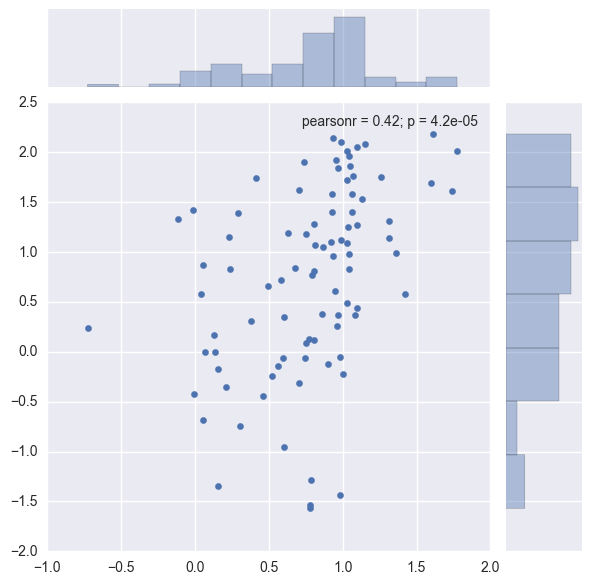

In [653]:
plt.close()
sns.jointplot(y_lin,dv_val)
plt.show()

In [660]:
for col in acc_cols:
    if 'med' not in col:
        winner = oneroi_df.sort_values(col,ascending=False).index[0]
        acc = oneroi_df.ix[winner,col]
        print(col, '   ', winner, acc)

lr_CV3_acc_MMSE     brain_partition_core_ind_lund_sci5_scf5_1 -0.0900373419577
lr_CV10_acc_MMSE     schwarz_atlas_6 -0.478284993148
nu_lin_acc_MMSE     schwarz_atlas_6 0.0436362639404
nu_poly_acc_MMSE     dkt_Braak_new_atlas_5 0.233945744554
nu_rbf_acc_MMSE     schwarz_atlas_6 0.651670254763
nu_CV3_lin_acc_MMSE     inf_temp_1 -0.863754398689
nu_CV3_poly_acc_MMSE     brain_partition_core_ind_lund_sci5_scf5_2 -0.0668439747132
nu_CV3_rbf_acc_MMSE     inf_temp_1 -0.863754398689
nu_CV10_lin_acc_MMSE     brain_partition_core_ind_lund_sci5_scf5_2 -3.00869185701
nu_CV10_poly_acc_MMSE     schwarz_atlas_6 -0.375590362412
nu_CV10_rbf_acc_MMSE     brain_partition_core_ind_lund_sci5_scf5_2 -3.00869185701
SVR_lin_acc_MMSE     brain_partition_core_ind_lund_sci5_scf5_4 0.0445668964105
SVR_poly_acc_MMSE     schwarz_atlas_4 0.236826070768
SVR_rbf_acc_MMSE     schwarz_atlas_6 0.643934299568
SVR_CV3_lin_acc_MMSE     brain_partition_core_ind_lund_sci5_scf5_1 -0.017312210247
SVR_CV3_poly_acc_MMSE     Schwar

In [ ]:
# Try lasso with AV45, and factorial interactions
# Run the lasso by set
# Try PLS, CCA, other methods for feature selection
# Run cross-validated feature selection?
# (Try in only amyloid+ and controls?)

In [14]:
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel
# First, run the lasso including covariates
# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
cov_cols = ncols[:-6] + ['AGE','PTGENDER','PTEDUCAT']
clf = linear_model.LassoCV(max_iter=100000)
n_xin = a_indata[ncols].values
# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(n_xin, adni_y)
n_features = sfm.transform(n_xin).shape[1]
print('there are %s features'%(n_features))
while n_features > 6:
    sfm.threshold += 0.1
    X_transform = sfm.transform(xin)
    n_features = X_transform.shape[1]

there are 5 features


In [30]:
newx = sfm.transform(n_xin)
sel_cols = []
print(newx.shape)
for i in range(newx.shape[-1]):
    arr = newx[:,i]
    for col in ncols:
        if np.allclose(a_indata[col].values,arr):
            sel_cols.append(col)

(86, 5)


In [233]:
eq = 'MMSE ~'
for col in selected:
    if col == selected[-1]:
        eq = eq + ' %s'%col
    else:
        eq = eq + ' %s +'%col
 
lmod = smf.ols(eq,data=jdf).fit()
lmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MMSE   R-squared:                       0.245
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     6.800
Date:                Wed, 26 Jul 2017   Prob (F-statistic):           8.62e-05
Time:                        10:53:52   Log-Likelihood:                -194.49
No. Observations:                  89   AIC:                             399.0
Df Residuals:                      84   BIC:                             411.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    21.9542      2.781      7.893      0.000      16.423      27.485
schwarz_atlas_6                               7.1541      2.207      3.242      0.002       2.766      11.542
brain_partition_core_ind_lund_sci5_scf5_1     1.9587      1.366      1.434      0.155      -0.757       4.675
brain_partition_core_ind_lund_sci5_scf5_4    -5.4151      1.403     -3.859      0.000      -8.206      -2.624
PTEDUCAT                                      0.2310      0.091      2.527      0.013       0.049       0.413
==============================================================================
Omnibus:                       77.967   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              688.118
Skew:                          -2.683   Prob(JB):                    3.78e-150
Kurtosis:                      15.521   Cond. No.                         222.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [260]:
selected

['schwarz_atlas_6',
 'brain_partition_core_ind_lund_sci5_scf5_1',
 'brain_partition_core_ind_lund_sci5_scf5_4']

In [234]:
clus4_resid = smf.ols(
    'brain_partition_core_ind_lund_sci5_scf5_4 ~ brain_partition_core_ind_lund_sci5_scf5_1 + schwarz_atlas_6 + PTEDUCAT',
                     data=a_indata).fit().resid
scw6_resid = smf.ols(
    'schwarz_atlas_6 ~ brain_partition_core_ind_lund_sci5_scf5_4 + brain_partition_core_ind_lund_sci5_scf5_1',
                    data=a_indata).fit().resid
clus1_resid = smf.ols(
    'brain_partition_core_ind_lund_sci5_scf5_1 ~ brain_partition_core_ind_lund_sci5_scf5_4 + schwarz_atlas_6', 
                    data=a_indata).fit().resid

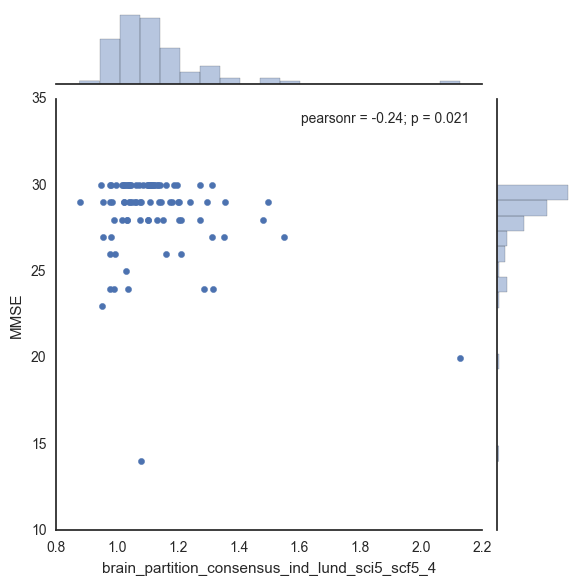

In [900]:
plt.close()
sns.jointplot(a_indata.brain_partition_consensus_ind_lund_sci5_scf5_4,a_indata.MMSE)
plt.show()

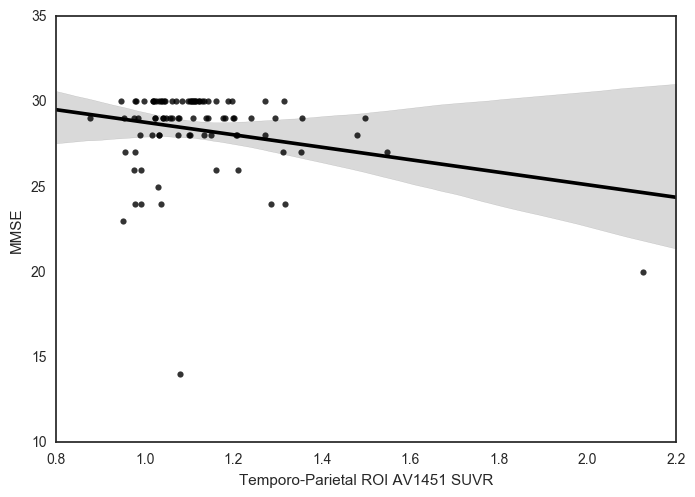

In [897]:
plt.close()
fig = sns.regplot(a_indata.brain_partition_consensus_ind_lund_sci5_scf5_4,adni_y,color='k')
fig.set(xlabel='Temporo-Parietal ROI AV1451 SUVR',ylabel='MMSE')
plt.show()

In [933]:
sns.heatmap?

In [14]:
ncols[:46]

['dkt_Braak_new_atlas_1',
 'dkt_Braak_new_atlas_2',
 'dkt_Braak_new_atlas_3',
 'dkt_Braak_new_atlas_4',
 'dkt_Braak_new_atlas_5',
 'dkt_Braak_new_atlas_6',
 'dkt_Braak_stage_1_1',
 'dkt_Braak_stage_2_2',
 'dkt_Braak_stage_3_3',
 'dkt_Braak_stage_4_4',
 'dkt_Braak_stage_5_5',
 'dkt_Braak_stage_6_6',
 'dkt_Cho_new_atlas_1',
 'dkt_Cho_new_atlas_2',
 'dkt_Cho_new_atlas_3',
 'dkt_Cho_new_atlas_4',
 'dkt_Cho_new_atlas_5',
 'dkt_Cho_stage_1_1',
 'dkt_Cho_stage_2_2',
 'dkt_Cho_stage_3_3',
 'dkt_Cho_stage_4_4',
 'dkt_Cho_stage_5_5',
 'inf_temp_1',
 'schwarz_atlas_1',
 'schwarz_atlas_2',
 'schwarz_atlas_3',
 'schwarz_atlas_4',
 'schwarz_atlas_5',
 'schwarz_atlas_6',
 'Schwarz_Stage_1',
 'Schwarz_Stage_2',
 'Schwarz_Stage_3',
 'Schwarz_Stage_4',
 'Schwarz_Stage_5',
 'Schwarz_Stage_6',
 'brain_partition_core_ind_lund_sci5_scf5_1',
 'brain_partition_core_ind_lund_sci5_scf5_2',
 'brain_partition_core_ind_lund_sci5_scf5_3',
 'brain_partition_core_ind_lund_sci5_scf5_4',
 'brain_partition_core_ind_lund

In [71]:
jnk = deepcopy(a_indata)

In [72]:
jnk.ix[:,'sumx'] = jnk[ncols].sum(axis=1)

In [73]:
n_indata = deepcopy(a_indata)
bcols = [x for x in ncols[:40] if 'age_1' not in x]
bcols

['dkt_Braak_new_atlas_1',
 'dkt_Braak_new_atlas_2',
 'dkt_Braak_new_atlas_3',
 'dkt_Braak_new_atlas_4',
 'dkt_Braak_new_atlas_5',
 'dkt_Braak_new_atlas_6',
 'dkt_Braak_stage_2_2',
 'dkt_Braak_stage_3_3',
 'dkt_Braak_stage_4_4',
 'dkt_Braak_stage_5_5',
 'dkt_Braak_stage_6_6',
 'dkt_Cho_new_atlas_1',
 'dkt_Cho_new_atlas_2',
 'dkt_Cho_new_atlas_3',
 'dkt_Cho_new_atlas_4',
 'dkt_Cho_new_atlas_5',
 'dkt_Cho_stage_2_2',
 'dkt_Cho_stage_3_3',
 'dkt_Cho_stage_4_4',
 'dkt_Cho_stage_5_5',
 'inf_temp_1',
 'schwarz_atlas_1',
 'schwarz_atlas_2',
 'schwarz_atlas_3',
 'schwarz_atlas_4',
 'schwarz_atlas_5',
 'schwarz_atlas_6',
 'Schwarz_Stage_2',
 'Schwarz_Stage_3',
 'Schwarz_Stage_4',
 'Schwarz_Stage_5',
 'Schwarz_Stage_6',
 'brain_partition_core_ind_lund_sci5_scf5_1',
 'brain_partition_core_ind_lund_sci5_scf5_2',
 'brain_partition_core_ind_lund_sci5_scf5_3',
 'brain_partition_core_ind_lund_sci5_scf5_4',
 'brain_partition_core_ind_lund_sci5_scf5_5',
 'lund_ET_6_1',
 'lund_ET_6_2',
 'lund_ET_6_3']

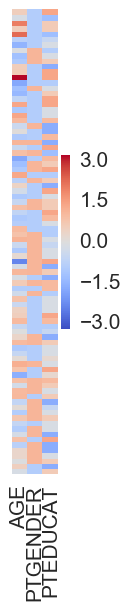

In [74]:
plt.close()
jnk1 = jnk[cov_cols[-3:]]
jnk1 = (jnk1-np.mean(jnk1))/np.std(jnk1)
fig, ax = plt.subplots(figsize=(.75,6))
fig = sns.heatmap(jnk1.loc[jnk.sort_values('sumx').index].astype(float),
            yticklabels=False,cmap="coolwarm")
#junk = fig.get_figure()
#junk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/cov_features.pdf',
#           bbox_inches='tight')
plt.show()

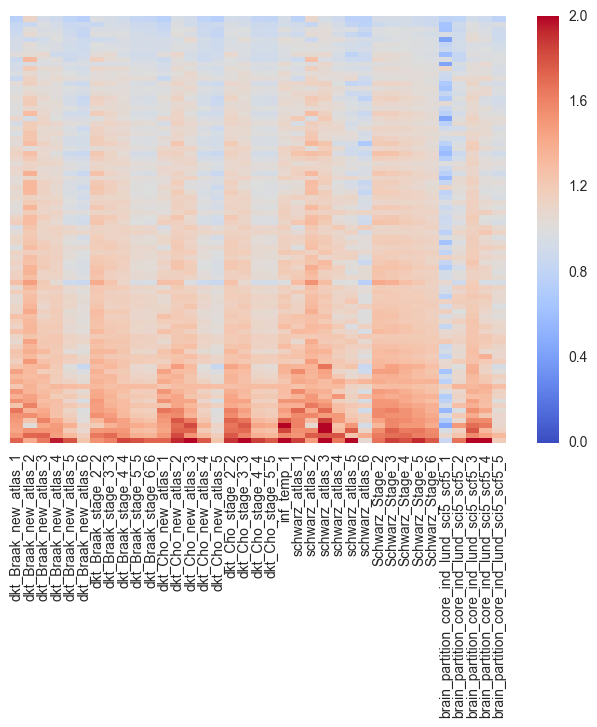

In [30]:
plt.close()
fig = sns.heatmap(n_indata.loc[jnk.sort_values('sumx').index][bcols],
            yticklabels=False,cmap="coolwarm",vmin=0,vmax=2)
jnk = fig.get_figure()
jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/features.pdf',
            bbox_inches='tight')
plt.show()

In [995]:
jnk[ncols[-5:]].mean()

brain_partition_core_ind_lund_sci5_scf5_1    0.854608
brain_partition_core_ind_lund_sci5_scf5_2    1.044936
brain_partition_core_ind_lund_sci5_scf5_3    1.209445
brain_partition_core_ind_lund_sci5_scf5_4    1.132350
brain_partition_core_ind_lund_sci5_scf5_5    1.032327
dtype: float64

In [270]:
sns.set_style('white')

In [249]:
jdf1 = jdf[selected + ['MMSE']].dropna()
jdf1.columns

Index(['schwarz_atlas_6', 'brain_partition_core_ind_lund_sci5_scf5_1',
       'brain_partition_core_ind_lund_sci5_scf5_4', 'PTEDUCAT', 'MMSE'],
      dtype='object')

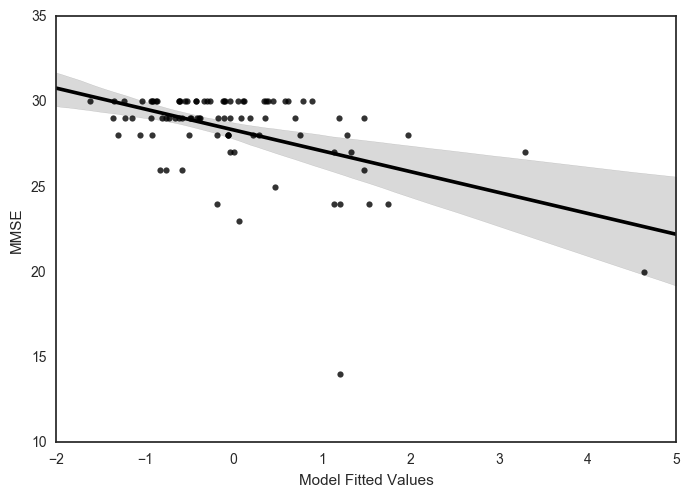

In [250]:
zfit = (lmod.fittedvalues - np.mean(lmod.fittedvalues)) / np.std(lmod.fittedvalues)
plt.close()
fig = sns.regplot((zfit*-1),jdf1['MMSE'].values,color='k')
fig.set(xlabel='Model Fitted Values',ylabel='MMSE')
#jnk = fig.get_figure()
#jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/association_edu.pdf',
#            bbox_inches='tight')
plt.show()

In [278]:
type(a_indata.DX_final.values)

numpy.ndarray

In [211]:
plt_df = pandas.concat([pandas.Series(-1 * zfit),
                        pandas.Series(a_indata['MMSE'].values),
                        a_indata.DX_final, 
                        a_indata.av45_status_wcb
                       ],axis=1)
plt_df.columns = ['Model Fitted Values','MMSE','DX_final','amyloid_status']
plt_df.head()

,Model Fitted Values,MMSE,DX_final,amyloid_status
0,0.712647,30.0,MCI,0.0
1,3.322508,27.0,Dementia,1.0
2,4.611771,20.0,Dementia,1.0
3,-0.849099,28.0,MCI,1.0
4,0.926049,30.0,MCI,1.0


In [289]:
sns.lmplot?

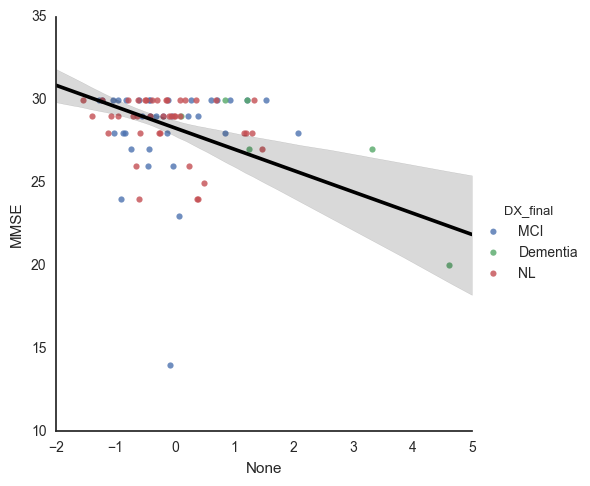

In [220]:
plt.close()
#sns.lmplot('Model Fitted Values','MMSE',data=plt_df,hue='amyloid_status')
#sns.lmplot('Model Fitted Values','MMSE',data=plt_df,hue='DX_final')
sns.lmplot('Model Fitted Values','MMSE',data=plt_df,hue='DX_final',fit_reg=False)
sns.regplot((-1 * zfit),a_indata['MMSE'].values,color='K',marker=None)
plt.show()

In [216]:
zfit = (lmod.fittedvalues - np.mean(lmod.fittedvalues)) / np.std(lmod.fittedvalues)
plt.close()
fig = sns.regplot((zfit*-1),a_indata['MMSE'].values,color='k',hue=a_indata.DX_final.values)
fig.set(xlabel='Model Fitted Values',ylabel='MMSE',color='k')
jnk = fig.get_figure()
#jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/association.pdf',
#            bbox_inches='tight')
plt.show()

TypeError: regplot() got an unexpected keyword argument 'hue'

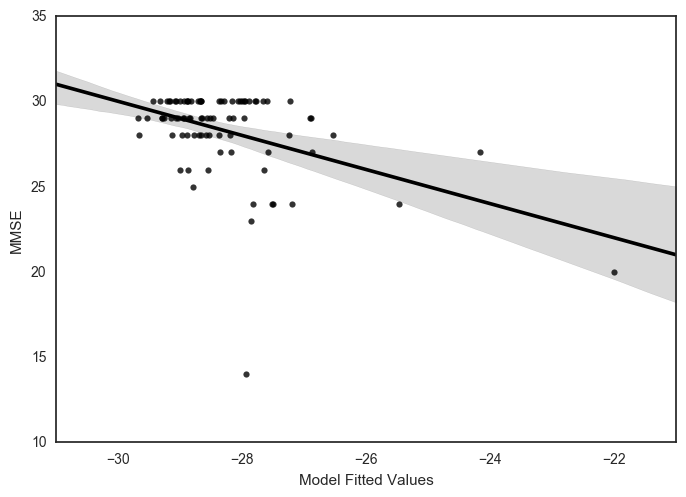

In [43]:
plt.close()
fig = sns.regplot((lmod.fittedvalues*-1),adni_y,color='k')
fig.set(xlabel='Model Fitted Values',ylabel='MMSE')
jnk = fig.get_figure()
jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/association.pdf',
            bbox_inches='tight')
plt.show()

In [ ]:
cs.av45_status_wcb

In [1015]:
htau_idx = a_indata[lmod.fittedvalues < 28].index
cs.loc[htau_idx].av45_status_wcb

0     0.0
1     1.0
2     1.0
4     1.0
9     1.0
19    0.0
21    1.0
26    1.0
28    0.0
29    1.0
30    NaN
32    NaN
34    1.0
35    0.0
36    1.0
41    0.0
43    1.0
49    1.0
50    1.0
55    1.0
56    1.0
58    1.0
59    1.0
60    0.0
85    1.0
87    1.0
Name: av45_status_wcb, dtype: float64

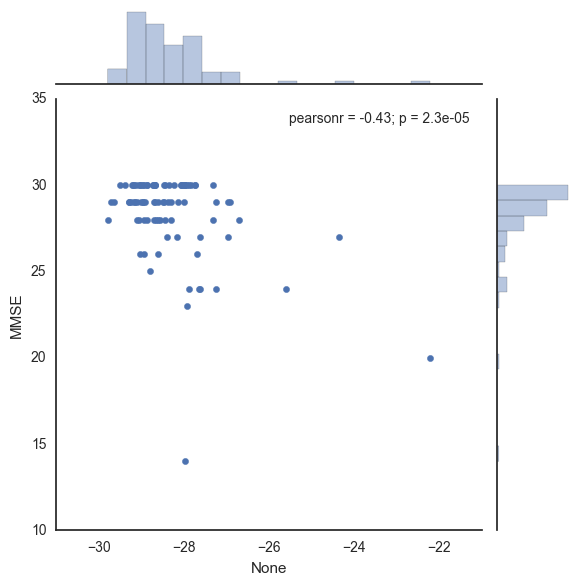

In [939]:
plt.close()
sns.jointplot((lmod.fittedvalues*-1),a_indata.MMSE)
plt.show()

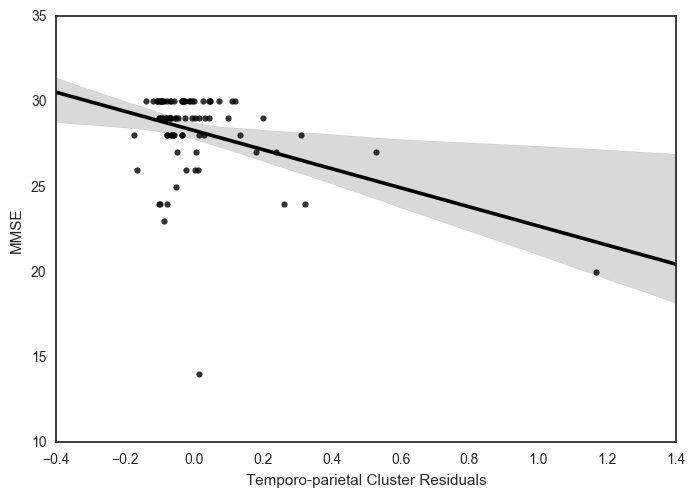

In [224]:
plt.close()
fig = sns.regplot(clus4_resid,a_indata['MMSE'].values,color='k')
fig.set(xlabel='Temporo-parietal Cluster Residuals',ylabel='MMSE')
jnk = fig.get_figure()
jnk.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/association2_edu.pdf',
            bbox_inches='tight')
plt.show()

In [700]:
y_fs = cross_val_predict(lr,a_indata[sel_cols].values,adni_y,cv=10)
scr_fs = cross_val_score(lr,a_indata[sel_cols].values,adni_y,cv=10)

In [53]:
from sklearn.model_selection import KFold

In [727]:
kf3 = KFold(n_splits=3)
res_dict = {}
for train_index,test_index in kf3.split(a_indata):
    clf = linear_model.LassoCV(max_iter=100000)
    n_xin = a_indata[ncols].values[train_index]
    n_yin = adni_y[train_index]
    # Set a minimum threshold of 0.25
    sfm = SelectFromModel(clf, threshold=0.25)
    sfm.fit(n_xin, n_yin)
    n_features = sfm.transform(n_xin).shape[1]
    print('there are %s features'%(n_features))
    while n_features > 6:
        sfm.threshold += 0.1
        X_transform = sfm.transform(n_xin)
        n_features = X_transform.shape[1]
    
    newx = sfm.transform(n_xin)
    scols = []
    print(newx.shape)
    for i in range(newx.shape[-1]):
        arr = newx[:,i]
        for col in ncols:
            if np.allclose(a_indata[col].values[train_index],arr):
                scols.append(col)
    for col in scols:
        if col in res_dict.keys():
            res_dict.update({col: res_dict[col] + 1})
        else:
            res_dict.update({col: 1})

there are 7 features
(59, 6)
there are 3 features
(59, 3)
there are 0 features
(60, 0)


//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


In [728]:
res_dict

{'brain_partition_core_ind_lund_sci5_scf5_1': 1,
 'brain_partition_core_ind_lund_sci5_scf5_4': 1,
 'brain_partition_core_ind_lund_sci5_scf5_5': 1,
 'dkt_Braak_new_atlas_1': 1,
 'dkt_Braak_stage_1_1': 1,
 'dkt_Cho_new_atlas_1': 1,
 'dkt_Cho_stage_1_1': 1,
 'schwarz_atlas_2': 1,
 'schwarz_atlas_3': 1,
 'schwarz_atlas_5': 1,
 'schwarz_atlas_6': 2}

In [729]:
kf10 = KFold(n_splits=10)
res_dict = {}
for train_index,test_index in kf10.split(a_indata):
    clf = linear_model.LassoCV(max_iter=100000)
    n_xin = a_indata[ncols].values[train_index]
    n_yin = adni_y[train_index]
    # Set a minimum threshold of 0.25
    sfm = SelectFromModel(clf, threshold=0.25)
    sfm.fit(n_xin, n_yin)
    n_features = sfm.transform(n_xin).shape[1]
    print('there are %s features'%(n_features))
    while n_features > 6:
        sfm.threshold += 0.1
        X_transform = sfm.transform(n_xin)
        n_features = X_transform.shape[1]
    
    newx = sfm.transform(n_xin)
    scols = []
    print(newx.shape)
    for i in range(newx.shape[-1]):
        arr = newx[:,i]
        for col in ncols:
            if np.allclose(a_indata[col].values[train_index],arr):
                scols.append(col)
    for col in scols:
        if col in res_dict.keys():
            res_dict.update({col: res_dict[col] + 1})
        else:
            res_dict.update({col: 1})

there are 2 features
(80, 2)
there are 3 features
(80, 3)
there are 4 features
(80, 4)
there are 3 features
(80, 3)
there are 3 features
(80, 3)
there are 3 features
(80, 3)
there are 4 features
(80, 4)
there are 3 features
(80, 3)
there are 3 features
(80, 3)
there are 3 features
(81, 3)


In [730]:
res_dict

{'brain_partition_core_ind_lund_sci5_scf5_1': 10,
 'brain_partition_core_ind_lund_sci5_scf5_4': 9,
 'dkt_Braak_new_atlas_1': 1,
 'dkt_Braak_stage_1_1': 1,
 'dkt_Cho_new_atlas_1': 1,
 'dkt_Cho_stage_1_1': 1,
 'schwarz_atlas_3': 1,
 'schwarz_atlas_6': 10}

In [ ]:
# Run on mem and ef
# Try lasso with AV45, and factorial interactions
# Run the lasso by set
# Try PLS, CCA, other methods for feature selection
# (Try in only amyloid+ and controls?)

In [ ]:
# Run on other GC measures

In [733]:
# Run on mem and ef

there are 3 features
selected =  3
schwarz_atlas_6
brain_partition_core_ind_lund_sci5_scf5_1
brain_partition_core_ind_lund_sci5_scf5_4


In [236]:
selected,sfm,clf = lasso_feat_select(a_indata,ncols,'MMSE',scale=True)

there are 3 features
selected =  3


0.023221597132567589

In [264]:
cov_cols

['dkt_Braak_new_atlas_1',
 'dkt_Braak_new_atlas_2',
 'dkt_Braak_new_atlas_3',
 'dkt_Braak_new_atlas_4',
 'dkt_Braak_new_atlas_5',
 'dkt_Braak_new_atlas_6',
 'dkt_Braak_stage_1_1',
 'dkt_Braak_stage_2_2',
 'dkt_Braak_stage_3_3',
 'dkt_Braak_stage_4_4',
 'dkt_Braak_stage_5_5',
 'dkt_Braak_stage_6_6',
 'dkt_Cho_new_atlas_1',
 'dkt_Cho_new_atlas_2',
 'dkt_Cho_new_atlas_3',
 'dkt_Cho_new_atlas_4',
 'dkt_Cho_new_atlas_5',
 'dkt_Cho_stage_1_1',
 'dkt_Cho_stage_2_2',
 'dkt_Cho_stage_3_3',
 'dkt_Cho_stage_4_4',
 'dkt_Cho_stage_5_5',
 'inf_temp_1',
 'schwarz_atlas_1',
 'schwarz_atlas_2',
 'schwarz_atlas_3',
 'schwarz_atlas_4',
 'schwarz_atlas_5',
 'schwarz_atlas_6',
 'Schwarz_Stage_1',
 'Schwarz_Stage_2',
 'Schwarz_Stage_3',
 'Schwarz_Stage_4',
 'Schwarz_Stage_5',
 'Schwarz_Stage_6',
 'brain_partition_core_ind_lund_sci5_scf5_1',
 'brain_partition_core_ind_lund_sci5_scf5_2',
 'brain_partition_core_ind_lund_sci5_scf5_3',
 'brain_partition_core_ind_lund_sci5_scf5_4',
 'brain_partition_core_ind_lund

In [267]:
clf = linear_model.LassoCV(max_iter=100000,cv=10)
selected = lasso_feat_select(a_indata,cov_cols,'MMSE',scale=True,clf=clf)

there are 4 features
selected =  4
model alpha selected = 0.017566286638


In [231]:
from sklearn.linear_model import ElasticNetCV
clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1],max_iter=100000)
lasso_feat_select(a_indata,ncols,'MMSE',scale=True,clf=clf)

//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


there are 3 features
selected =  3


['schwarz_atlas_6',
 'brain_partition_core_ind_lund_sci5_scf5_1',
 'brain_partition_core_ind_lund_sci5_scf5_4']

In [93]:
LassoCV?

In [92]:
from sklearn.linear_model import LassoLarsCV, LarsCV, LassoCV
LassoLarsCV?

In [250]:
clf = LassoLarsCV(max_iter=100000)
lasso_feat_select(a_indata,ncols,'MMSE',scale=False,clf=clf)

there are 4 features
selected =  4
model alpha selected = 0.023210386777


//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 15 iterations, i.e. alpha=1.187e-02, with an active set of 13 regressors, and the smallest cholesky pivot element being 1.490e-08
  ConvergenceWarning)
//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 15 iterations, i.e. alpha=1.187e-02, with an active set of 13 regressors, and the smallest cholesky pivot element being 2.356e-08
  ConvergenceWarning)
//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/least_angle.py:309: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 17 iterations, i.e. alpha=1.174e-02, with an active set of 15 regressors, and the smallest cholesky pivot element being 2.356e-08
  ConvergenceWarning)
//anaconda/envs/py3/li

['schwarz_atlas_6',
 'brain_partition_core_ind_lund_sci5_scf5_1',
 'brain_partition_core_ind_lund_sci5_scf5_4',
 'lund_ET_6_3']

In [976]:
#jnk1 = StandardScaler().fit(n_xin)
jnk1.inverse_transform

In [125]:
xxcols = xcols[:-9] + xcols[-3:]

In [128]:
ncols

['dkt_Braak_new_atlas_1',
 'dkt_Braak_new_atlas_2',
 'dkt_Braak_new_atlas_3',
 'dkt_Braak_new_atlas_4',
 'dkt_Braak_new_atlas_5',
 'dkt_Braak_new_atlas_6',
 'dkt_Braak_stage_2_2',
 'dkt_Braak_stage_3_3',
 'dkt_Braak_stage_4_4',
 'dkt_Braak_stage_5_5',
 'dkt_Braak_stage_6_6',
 'dkt_Cho_new_atlas_1',
 'dkt_Cho_new_atlas_2',
 'dkt_Cho_new_atlas_3',
 'dkt_Cho_new_atlas_4',
 'dkt_Cho_new_atlas_5',
 'dkt_Cho_stage_2_2',
 'dkt_Cho_stage_3_3',
 'dkt_Cho_stage_4_4',
 'dkt_Cho_stage_5_5',
 'inf_temp_1',
 'schwarz_atlas_1',
 'schwarz_atlas_2',
 'schwarz_atlas_3',
 'schwarz_atlas_4',
 'schwarz_atlas_5',
 'schwarz_atlas_6',
 'Schwarz_Stage_2',
 'Schwarz_Stage_3',
 'Schwarz_Stage_4',
 'Schwarz_Stage_5',
 'Schwarz_Stage_6',
 'brain_partition_core_ind_lund_sci5_scf5_1',
 'brain_partition_core_ind_lund_sci5_scf5_2',
 'brain_partition_core_ind_lund_sci5_scf5_3',
 'brain_partition_core_ind_lund_sci5_scf5_4',
 'brain_partition_core_ind_lund_sci5_scf5_5',
 'lund_ET_6_1',
 'lund_ET_6_2',
 'lund_ET_6_3',
 'l

In [167]:
LassoCV?

In [170]:
sns.set_style('white')

In [173]:
-(np.log10(2.1104))

-0.32436477820229004

In [158]:
linear_model.LassoCV?

In [ ]:
linear_model.LassoCV(max_iter=100000,cv=10)

prediction accuracy =  0.231793197488
there are 4 features
selected =  4
model alpha selected = 2.11046585027
Computing regularization path using the coordinate descent lasso...


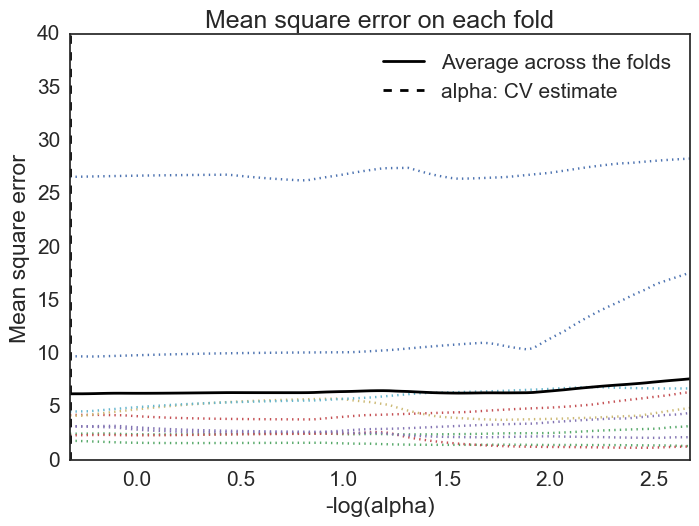

['schwarz_atlas_6',
 'brain_partition_core_ind_lund_sci5_scf5_1',
 'brain_partition_core_ind_lund_sci5_scf5_4',
 'PTEDUCAT']

In [81]:
selected,fig, las = lasso_feat_select(jdf,ncols[:-6]+cov_cols[-3:],'MMSE',
                                      scale=True,plt_min=0,plt_max=40,mod_predict=True,
                                      )
selected

In [228]:
selected.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/lasso_CV.pdf')

prediction accuracy =  0.211164516568
there are 1 features
selected =  1
model alpha selected = 0.0112987867421
Computing regularization path using the coordinate descent lasso...


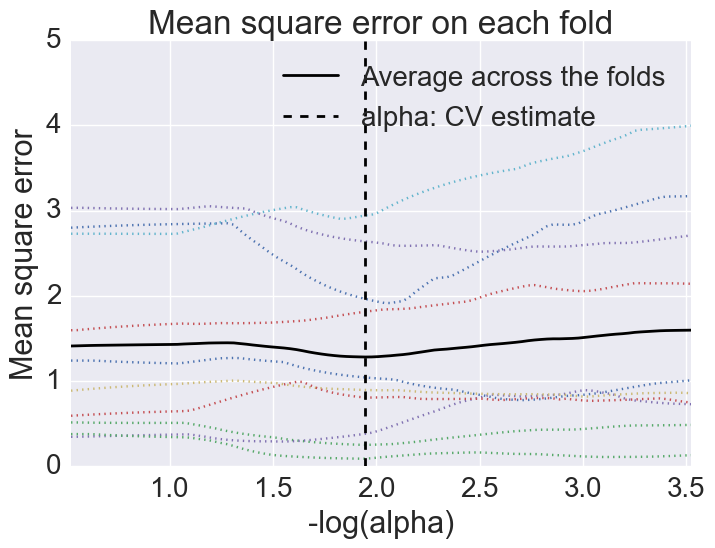

(['brain_partition_core_ind_lund_sci5_scf5_4'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [162]:
lasso_feat_select(jdf,ncols[:-6]+cov_cols[-3:],'CDRSB',
                  scale=True,plt_min=0,plt_max=5,mod_predict=True)

prediction accuracy =  0.260720049147
there are 4 features
selected =  4
model alpha selected = 0.0679371452927
Computing regularization path using the coordinate descent lasso...


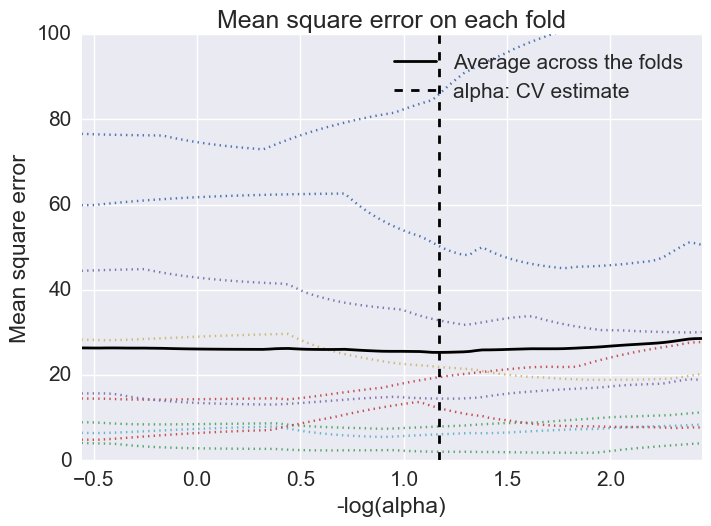

(['schwarz_atlas_1',
  'schwarz_atlas_6',
  'brain_partition_core_ind_lund_sci5_scf5_4',
  'PTEDUCAT'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [72]:
lasso_feat_select(jdf,ncols[:-6]+cov_cols[-3:],'ADAS11',
                  scale=True,plt_min=0,plt_max=100, mod_predict=True)

prediction accuracy =  0.210258046943
there are 6 features
selected =  6
model alpha selected = 0.64440394288
Computing regularization path using the coordinate descent lasso...


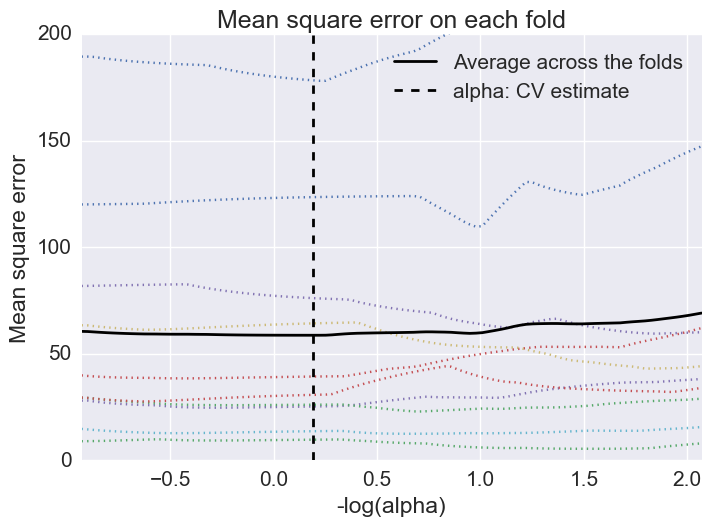

(['dkt_Braak_new_atlas_2',
  'schwarz_atlas_1',
  'schwarz_atlas_6',
  'brain_partition_core_ind_lund_sci5_scf5_4',
  'AGE',
  'PTEDUCAT'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [74]:
lasso_feat_select(jdf,ncols[:-6]+cov_cols[-3:],'ADAS13',scale=True,plt_min=0,plt_max=200,mod_predict=True)

prediction accuracy =  0.231263169615
there are 4 features
selected =  4
model alpha selected = 0.0475706079092
Computing regularization path using the coordinate descent lasso...


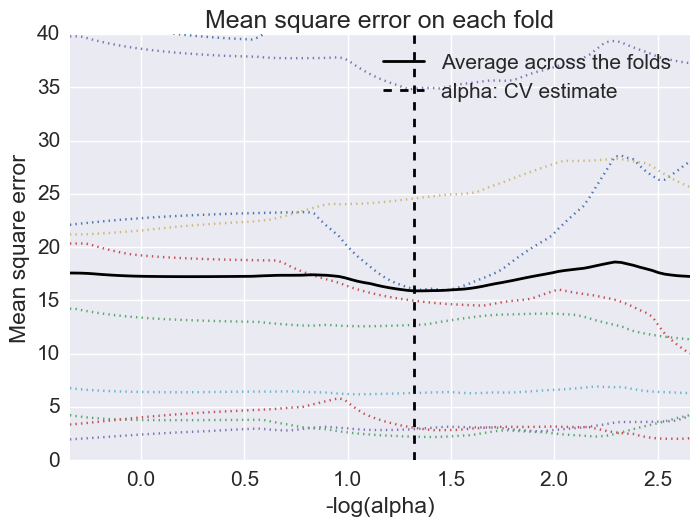

(['schwarz_atlas_1',
  'schwarz_atlas_6',
  'brain_partition_core_ind_lund_sci5_scf5_4',
  'PTEDUCAT'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [75]:
lasso_feat_select(jdf,ncols[:-6]+cov_cols[-3:],'FAQ',scale=True,plt_min=0,plt_max=40, mod_predict=True)

prediction accuracy =  0.288042091374
there are 1 features
selected =  1
model alpha selected = 0.000715722741172
Computing regularization path using the coordinate descent lasso...


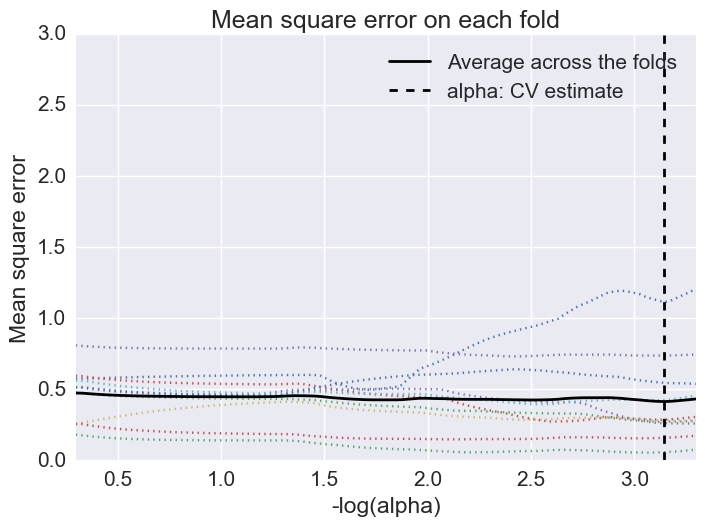

(['brain_partition_core_ind_lund_sci5_scf5_4'],
 LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
     max_iter=100000, n_alphas=100, n_jobs=1, normalize=False,
     positive=False, precompute='auto', random_state=None,
     selection='cyclic', tol=0.0001, verbose=False))

In [76]:
lasso_feat_select(jdf,ncols[:-6]+cov_cols[-3:],'EcogSPTotal',scale=True,plt_min=0,plt_max=3,mod_predict=True)

In [251]:
jdf.columns

Index(['CDRSB', 'ADAS11', 'ADAS13', 'FAQ', 'MOCA', 'EcogPtTotal',
       'EcogSPTotal', 'MMSE', 'ADNI_MEM', 'ADNI_EF', 'DX_final', 'AGE',
       'PTGENDER', 'PTEDUCAT', 'dkt_Braak_new_atlas_1',
       'dkt_Braak_new_atlas_2', 'dkt_Braak_new_atlas_3',
       'dkt_Braak_new_atlas_4', 'dkt_Braak_new_atlas_5',
       'dkt_Braak_new_atlas_6', 'dkt_Braak_stage_2_2', 'dkt_Braak_stage_3_3',
       'dkt_Braak_stage_4_4', 'dkt_Braak_stage_5_5', 'dkt_Braak_stage_6_6',
       'dkt_Cho_new_atlas_1', 'dkt_Cho_new_atlas_2', 'dkt_Cho_new_atlas_3',
       'dkt_Cho_new_atlas_4', 'dkt_Cho_new_atlas_5', 'dkt_Cho_stage_2_2',
       'dkt_Cho_stage_3_3', 'dkt_Cho_stage_4_4', 'dkt_Cho_stage_5_5',
       'inf_temp_1', 'schwarz_atlas_1', 'schwarz_atlas_2', 'schwarz_atlas_3',
       'schwarz_atlas_4', 'schwarz_atlas_5', 'schwarz_atlas_6',
       'Schwarz_Stage_2', 'Schwarz_Stage_3', 'Schwarz_Stage_4',
       'Schwarz_Stage_5', 'Schwarz_Stage_6',
       'brain_partition_core_ind_lund_sci5_scf5_1',
       'brain_p

In [75]:
def lasso_feat_select(indata, xcols, ycol, cv = False, folds = 10,
                      thr = 0.25, delt = 0.1, max_feat = 6, scale=False,
                      clf = linear_model.LassoCV(max_iter=100000,cv=10),
                      plt_min = 0, plt_max = 100, mod_predict = False
                     ):
    
    if cv == False:
        clf = clf
        n_x = indata[xcols].dropna()
        n_y = indata.loc[n_x.index][ycol].dropna()
        n_yin = n_y.values
        n_x = n_x.loc[n_y.index]
        n_xin = n_x.values
        if scale:
            s_tfm = StandardScaler().fit(n_xin)
            n_xin = s_tfm.transform(n_xin)
        # Set a minimum threshold of 0.25
        las = clf.fit(n_xin,n_yin)
        if mod_predict:
            acc = las.score(n_xin,n_yin)
            print('prediction accuracy = ',acc)
        sfm = SelectFromModel(clf, threshold=thr)
        sfm.fit(n_xin, n_yin)
        n_features = sfm.transform(n_xin).shape[1]
        print('there are %s features'%(n_features))
        while n_features > max_feat:
            sfm.threshold += delt
            X_transform = sfm.transform(n_xin)
            n_features = X_transform.shape[1]
        
        selected = []
        if scale:
            n_xin = s_tfm.inverse_transform(n_xin)
        newx = sfm.transform(n_xin)
        print('selected = ',newx.shape[-1])
        for i in range(newx.shape[-1]):
            arr = newx[:,i]
            for col in xcols:
                if np.allclose(indata.loc[n_x.index][col].values,arr):
                    selected.append(col)
        
        try:
            print('model alpha selected =',clf.fit(n_xin, n_yin).alpha_)
            print("Computing regularization path using the coordinate descent lasso...")
            model = clf.fit(n_xin, n_yin)

            # Display results
            m_log_alphas = -np.log10(model.alphas_)
            #m_log_alphas = model.alphas_

            plt.close()
            fig = plt.figure()
            ymin, ymax = plt_min, plt_max
            plt.plot(m_log_alphas, model.mse_path_, ':')
            plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
                     label='Average across the folds', linewidth=2)
            plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
                        linewidth=2, label='alpha: CV estimate')
            #plt.axvline(model.alpha_, linestyle='--', color='k',
            #            linewidth=2, label='alpha: CV estimate')
            
            plt.legend()

            plt.xlabel('-log(alpha)')
            #plt.xlabel('alpha')
            plt.ylabel('Mean square error')
            plt.title('Mean square error on each fold')
            plt.axis('tight')
            plt.ylim(ymin, ymax)
            plt.show()
            return selected, fig, las
        except:
            return selected

    else:
        kf = KFold(n_splits=folds)
        selected = {}
        nfeats = []
        for train_index,test_index in kf.split(indata):
            clf = clf
            n_xin = indata[xcols].values[train_index]
            n_yin = indata[ycol].values[train_index]
            # Set a minimum threshold of 0.25
            sfm = SelectFromModel(clf, threshold=thr)
            sfm.fit(n_xin, n_yin)
            n_features = sfm.transform(n_xin).shape[1]
            print('there are %s features'%(n_features))
            while n_features > max_feat:
                sfm.threshold += delt
                X_transform = sfm.transform(n_xin)
                n_features = X_transform.shape[1]

            newx = sfm.transform(n_xin)
            scols = []
            print('selected = ',newx.shape[-1])
            nfeats.append(newx.shape[-1])
            for i in range(newx.shape[-1]):
                arr = newx[:,i]
                for col in xcols:
                    if np.allclose(indata[col].values[train_index],arr):
                        scols.append(col)
            for col in scols:
                if col in selected.keys():
                    selected.update({col: selected[col] + 1})
                else:
                    selected.update({col: 1})
            
        return selected,nfeats

In [75]:
#gcols = taucols[:23] + taucols[42:48] + taucols[-19:-14]
#gcols

prediction accuracy =  0.266110250003
there are 4 features
selected =  4
model alpha selected = 0.0137973446024
Computing regularization path using the coordinate descent lasso...


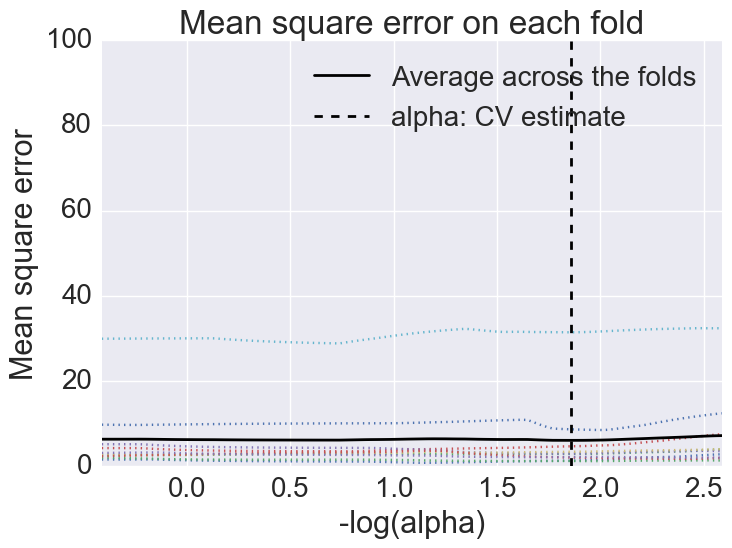

['schwarz_atlas_6',
 'brain_partition_core_ind_lund_sci5_scf5_1',
 'brain_partition_core_ind_lund_sci5_scf5_4',
 'PTEDUCAT']

In [102]:
selected, rfig, las = lasso_feat_select(a_indata,cov_cols,'MMSE',thr=0.2,
                                        max_feat=20,mod_predict=True)
selected

In [105]:
rfig.savefig('/Users/jakevogel/Dropbox/Work/Projects/Yasser Project/lassocv_with_edu.pdf',
            bbox_inches='tight')

In [66]:
list(zip(cov_cols,las.coef_))

[('dkt_Braak_new_atlas_1', -0.0),
 ('dkt_Braak_new_atlas_2', 0.0),
 ('dkt_Braak_new_atlas_3', 0.0),
 ('dkt_Braak_new_atlas_4', 0.0),
 ('dkt_Braak_new_atlas_5', -0.0),
 ('dkt_Braak_new_atlas_6', -0.0),
 ('dkt_Braak_stage_2_2', 0.0),
 ('dkt_Braak_stage_3_3', 0.0),
 ('dkt_Braak_stage_4_4', 0.0),
 ('dkt_Braak_stage_5_5', -0.0),
 ('dkt_Braak_stage_6_6', -0.0),
 ('dkt_Cho_new_atlas_1', -0.0),
 ('dkt_Cho_new_atlas_2', 0.0),
 ('dkt_Cho_new_atlas_3', -0.0),
 ('dkt_Cho_new_atlas_4', -0.0),
 ('dkt_Cho_new_atlas_5', -0.0),
 ('dkt_Cho_stage_2_2', 0.0),
 ('dkt_Cho_stage_3_3', 0.0),
 ('dkt_Cho_stage_4_4', -0.0),
 ('dkt_Cho_stage_5_5', -0.0),
 ('inf_temp_1', 0.0),
 ('schwarz_atlas_1', -0.0),
 ('schwarz_atlas_2', 0.0),
 ('schwarz_atlas_3', 0.15787092848312523),
 ('schwarz_atlas_4', 0.0),
 ('schwarz_atlas_5', -0.0),
 ('schwarz_atlas_6', 5.3282115781132919),
 ('Schwarz_Stage_2', 0.0),
 ('Schwarz_Stage_3', 0.0),
 ('Schwarz_Stage_4', 0.0),
 ('Schwarz_Stage_5', 0.0),
 ('Schwarz_Stage_6', 0.0),
 ('brain_part

In [88]:
abs_wts = pandas.Series(abs(las.coef_))
abs_wts.index = cov_cols
wts = pandas.DataFrame(las.coef_,index=cov_cols,columns=['weights'])
wts = wts.loc[abs_wts.sort_values(ascending=False).index]
wts.index = ['Schwarz_ROI6','Temporoparietal','Subcortical','Education','Schwarz_ROI3'
            ]+wts.index.tolist()[5:]
wts.head()

,weights
Schwarz_ROI6,5.328212
Temporoparietal,-4.877329
Subcortical,1.728845
Education,0.233573
Schwarz_ROI3,0.157871


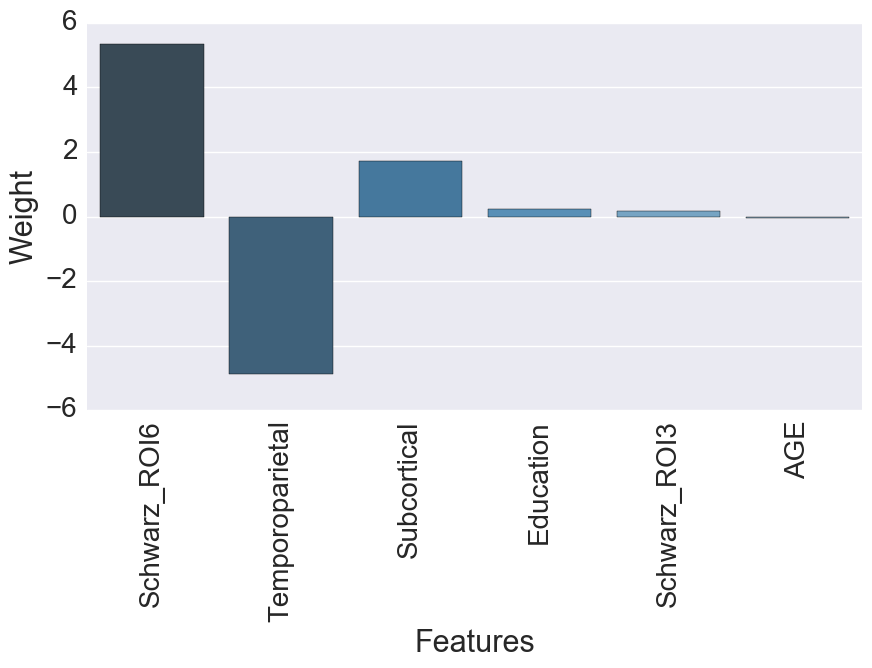

In [96]:
plt.close()
sns.set(font_scale=2)
fig,ax = plt.subplots(figsize=(10,5))
fig = sns.barplot(x = wts[abs(wts.weights)>0].index,
            y='weights',
            data=wts[abs(wts.weights)>0],palette='Blues_d')
for item in fig.get_xticklabels():
    item.set_rotation(90)
sns.plt.xlabel('Features')
sns.plt.ylabel('Weight')
plt.show()

In [100]:
a = ['a'+'b']
b = 'a' + 'b'
c = ['a'] + ['b']

print(a)
print(b)
print(c)

print('\n')

print(type(a))
print(type(b))
print(type(c))



['ab']
ab
['a', 'b']


<class 'list'>
<class 'str'>
<class 'list'>


In [57]:
a_indata['PTGENDER'] = a_indata['PTGENDER'].astype(float)

In [257]:
mmsemod=smf.ols('MMSE ~ brain_partition_core_ind_lund_sci5_scf5_1 + brain_partition_core_ind_lund_sci5_scf5_4 + schwarz_atlas_6 + PTEDUCAT',
              data=a_indata).fit()
mmsemod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MMSE   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     7.176
Date:                Wed, 12 Jul 2017   Prob (F-statistic):           5.36e-05
Time:                        14:04:44   Log-Likelihood:                -188.12
No. Observations:                  86   AIC:                             386.2
Df Residuals:                      81   BIC:                             398.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    21.7198      2.798      7.764      0.000      16.153      27.286
brain_partition_core_ind_lund_sci5_scf5_1     2.2418      1.391      1.611      0.111      -0.527       5.010
brain_partition_core_ind_lund_sci5_scf5_4    -5.6032      1.414     -3.962      0.000      -8.417      -2.789
schwarz_atlas_6                               7.0134      2.230      3.145      0.002       2.576      11.451
PTEDUCAT                                      0.2482      0.093      2.680      0.009       0.064       0.432
==============================================================================
Omnibus:                       75.283   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              648.150
Skew:                          -2.645   Prob(JB):                    1.80e-141
Kurtosis:                      15.365   Cond. No.                         219.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
memmod=smf.ols('ADNI_MEM ~ schwarz_atlas_1 + brain_partition_core_ind_lund_sci5_scf5_1 + lund_ET_6_5',
              data=a_indata).fit()
memmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ADNI_MEM   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     6.080
Date:                Tue, 11 Jul 2017   Prob (F-statistic):           0.000867
Time:                        13:40:40   Log-Likelihood:                -106.82
No. Observations:                  86   AIC:                             221.6
Df Residuals:                      82   BIC:                             231.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     1.9749      0.833      2.371      0.020       0.318       3.632
schwarz_atlas_1                              -1.1810      0.462     -2.554      0.012      -2.101      -0.261
brain_partition_core_ind_lund_sci5_scf5_1     1.3390      0.522      2.563      0.012       0.300       2.378
lund_ET_6_5                                  -0.7552      0.341     -2.212      0.030      -1.434      -0.076
==============================================================================
Omnibus:                        1.000   Durbin-Watson:                   2.210
Prob(Omnibus):                  0.606   Jarque-Bera (JB):                1.032
Skew:                          -0.144   Prob(JB):                        0.597
Kurtosis:                       2.547   Cond. No.                         22.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
selected = lasso_feat_select(a_indata,ncols,'ADNI_EF',max_feat=8)
selected

there are 1 features
selected =  1


['brain_partition_core_ind_lund_sci5_scf5_1']

In [856]:
eqa = 'ADNI_EF ~ dkt_Braak_stage_1_1 + dkt_Braak_new_atlas_2 + dkt_Cho_new_atlas_2 '
eqb = '+ schwarz_atlas_4 + schwarz_atlas_5 + schwarz_atlas_6 + brain_partition_core_ind_lund_sci5_scf5_1'
eq = eqa+eqb

efmod=smf.ols(eq,data=a_indata).fit()
efmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ADNI_EF   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.192
Method:                 Least Squares   F-statistic:                     3.987
Date:                Sun, 18 Jun 2017   Prob (F-statistic):           0.000859
Time:                        14:45:08   Log-Likelihood:                -99.964
No. Observations:                  89   AIC:                             215.9
Df Residuals:                      81   BIC:                             235.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -0.9983      0.807     -1.237      0.220      -2.604       0.607
dkt_Braak_stage_1_1                          -1.7781      0.994     -1.788      0.077      -3.756       0.200
dkt_Braak_new_atlas_2                         2.0533      0.954      2.152      0.034       0.155       3.952
dkt_Cho_new_atlas_2                           0.1685      1.622      0.104      0.918      -3.058       3.395
schwarz_atlas_4                              -3.3353      2.056     -1.622      0.109      -7.426       0.756
schwarz_atlas_5                               1.2887      0.704      1.831      0.071      -0.112       2.689
schwarz_atlas_6                               2.9180      1.462      1.997      0.049       0.010       5.826
brain_partition_core_ind_lund_sci5_scf5_1     0.4073      0.648      0.629      0.531      -0.881       1.696
==============================================================================
Omnibus:                        0.500   Durbin-Watson:                   2.190
Prob(Omnibus):                  0.779   Jarque-Bera (JB):                0.135
Skew:                          -0.013   Prob(JB):                        0.935
Kurtosis:                       3.189   Cond. No.                         102.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
selected = lasso_feat_select(a_indata,ncols,'ADNI_MEM',cv=True,folds=10)
selected

there are 3 features
selected =  3
there are 4 features
selected =  4
there are 3 features
selected =  3
there are 4 features
selected =  4
there are 5 features
selected =  5
there are 5 features
selected =  5
there are 4 features
selected =  4
there are 3 features
selected =  3
there are 4 features
selected =  4
there are 3 features
selected =  3


({'brain_partition_core_ind_lund_sci5_scf5_1': 10,
  'brain_partition_core_ind_lund_sci5_scf5_4': 6,
  'lund_ET_6_3': 3,
  'lund_ET_6_5': 9,
  'lund_ET_6_6': 1,
  'schwarz_atlas_1': 9},
 [3, 4, 3, 4, 5, 5, 4, 3, 4, 3])

{'Schwarz_Stage_1': 10,
 'brain_partition_core_ind_lund_sci5_scf5_1': 20,
 'brain_partition_core_ind_lund_sci5_scf5_2': 1,
 'brain_partition_core_ind_lund_sci5_scf5_4': 11,
 'dkt_Braak_new_atlas_1': 1,
 'dkt_Braak_stage_1_1': 1,
 'dkt_Cho_new_atlas_1': 1,
 'dkt_Cho_stage_1_1': 1,
 'inf_temp_1': 1,
 'schwarz_atlas_1': 10,
 'schwarz_atlas_3': 1,
 'schwarz_atlas_5': 1,
 'schwarz_atlas_6': 10}

In [55]:
selected = lasso_feat_select(a_indata,ncols,'ADNI_EF',cv=True,folds=10)
selected

//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


there are 0 features
selected =  0


//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


there are 0 features
selected =  0
there are 1 features
selected =  1
there are 2 features
selected =  2
there are 1 features
selected =  1
there are 2 features
selected =  2
there are 1 features
selected =  1


//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


there are 0 features
selected =  0


//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


there are 0 features
selected =  0
there are 1 features
selected =  1


({'brain_partition_core_ind_lund_sci5_scf5_1': 6,
  'lund_ET_6_5': 1,
  'schwarz_atlas_1': 1},
 [0, 0, 1, 2, 1, 2, 1, 0, 0, 1])

In [748]:
selected = lasso_feat_select(a_indata,ncols,'ADNI_EF')
selected = np.unique(selected)
eq = 'ADNI_EF ~'
for col in selected:
    if col == selected[-1]:
        eq = eq + ' %s'%col
    else:
        eq = eq + ' %s +'%col
 
lmod = smf.ols(eq,data=a_indata).fit()
lmod.summary()

there are 8 features
selected =  6


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                ADNI_EF   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     4.598
Date:                Sat, 17 Jun 2017   Prob (F-statistic):           0.000943
Time:                        15:01:04   Log-Likelihood:                -102.26
No. Observations:                  89   AIC:                             216.5
Df Residuals:                      83   BIC:                             231.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    -0.7256      0.796     -0.911      0.365      -2.309       0.858
brain_partition_core_ind_lund_sci5_scf5_1     0.4793      0.626      0.766      0.446      -0.765       1.724
dkt_Braak_new_atlas_1                        -0.6533      0.190     -3.434      0.001      -1.032      -0.275
dkt_Braak_new_atlas_2                         1.8241      0.892      2.044      0.044       0.049       3.599
dkt_Braak_stage_1_1                          -0.6533      0.190     -3.434      0.001      -1.032      -0.275
dkt_Cho_new_atlas_1                          -0.6533      0.190     -3.434      0.001      -1.032      -0.275
dkt_Cho_stage_1_1                            -0.6533      0.190     -3.434      0.001      -1.032      -0.275
schwarz_atlas_5                               0.7077      0.591      1.198      0.234      -0.467       1.882
schwarz_atlas_6                               0.8725      0.777      1.122      0.265      -0.674       2.419
==============================================================================
Omnibus:                        0.637   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.727   Jarque-Bera (JB):                0.254
Skew:                           0.090   Prob(JB):                        0.881
Kurtosis:                       3.189   Cond. No.                     1.02e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.1e-36. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [841]:
selected = lasso_feat_select(a_indata,ncols,'ADNI_MEM')
selected.remove(selected[0])
eq = 'ADNI_MEM ~'
for col in selected:
    if col == selected[-1]:
        eq = eq + ' %s'%col
    else:
        eq = eq + ' %s +'%col
 
lmod = smf.ols(eq,data=a_indata).fit()
lmod.summary()

there are 2 features
selected =  2


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ADNI_MEM   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     8.329
Date:                Sat, 17 Jun 2017   Prob (F-statistic):           0.000494
Time:                        16:25:05   Log-Likelihood:                -113.03
No. Observations:                  89   AIC:                             232.1
Df Residuals:                      86   BIC:                             239.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     1.1219      0.735      1.526      0.131      -0.340       2.584
Schwarz_Stage_1                              -1.3478      0.463     -2.913      0.005      -2.267      -0.428
brain_partition_core_ind_lund_sci5_scf5_1     1.4075      0.527      2.669      0.009       0.359       2.456
==============================================================================
Omnibus:                        0.217   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.897   Jarque-Bera (JB):                0.187
Skew:                          -0.105   Prob(JB):                        0.911
Kurtosis:                       2.922   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [756]:
selected = lasso_feat_select(a_indata,ncols,'ADNI_MEM',cv=True,folds=10)
enter = []
for k,v in selected.items():
    if v > 1:
        enter.append(k)
        
scr_fs = cross_val_score(lr,a_indata[enter].values,a_indata['ADNI_MEM'].values,cv=10)

there are 2 features
selected =  2
there are 2 features
selected =  2
there are 2 features
selected =  2
there are 2 features
selected =  2
there are 2 features
selected =  2
there are 2 features
selected =  2
there are 6 features
selected =  6
there are 2 features
selected =  2
there are 3 features
selected =  3
there are 2 features
selected =  2


In [97]:
## Add covariates to Lasso
xcols = ncols + cov_cols[-3:]
axcols = xcols + ['av45_status_wcb']
xcols

['dkt_Braak_new_atlas_1',
 'dkt_Braak_new_atlas_2',
 'dkt_Braak_new_atlas_3',
 'dkt_Braak_new_atlas_4',
 'dkt_Braak_new_atlas_5',
 'dkt_Braak_new_atlas_6',
 'dkt_Braak_stage_2_2',
 'dkt_Braak_stage_3_3',
 'dkt_Braak_stage_4_4',
 'dkt_Braak_stage_5_5',
 'dkt_Braak_stage_6_6',
 'dkt_Cho_new_atlas_1',
 'dkt_Cho_new_atlas_2',
 'dkt_Cho_new_atlas_3',
 'dkt_Cho_new_atlas_4',
 'dkt_Cho_new_atlas_5',
 'dkt_Cho_stage_2_2',
 'dkt_Cho_stage_3_3',
 'dkt_Cho_stage_4_4',
 'dkt_Cho_stage_5_5',
 'inf_temp_1',
 'schwarz_atlas_1',
 'schwarz_atlas_2',
 'schwarz_atlas_3',
 'schwarz_atlas_4',
 'schwarz_atlas_5',
 'schwarz_atlas_6',
 'Schwarz_Stage_2',
 'Schwarz_Stage_3',
 'Schwarz_Stage_4',
 'Schwarz_Stage_5',
 'Schwarz_Stage_6',
 'brain_partition_core_ind_lund_sci5_scf5_1',
 'brain_partition_core_ind_lund_sci5_scf5_2',
 'brain_partition_core_ind_lund_sci5_scf5_3',
 'brain_partition_core_ind_lund_sci5_scf5_4',
 'brain_partition_core_ind_lund_sci5_scf5_5',
 'lund_ET_6_1',
 'lund_ET_6_2',
 'lund_ET_6_3',
 'l

In [195]:
a_indata.ix[:,'PTGENDER'] = a_indata.ix[:,'PTGENDER'].astype(int)

In [144]:
from sklearn.preprocessing import StandardScaler

In [158]:
lasso_feat_select(jdf,xcols,'MMSE',scale=True)

there are 3 features
selected =  3
model alpha selected = 2.11046585027


['schwarz_atlas_6', 'brain_partition_core_ind_lund_sci5_scf5_4', 'PTEDUCAT']

In [156]:
lasso_feat_select(jdf,xcols,'MMSE',scale=True)

there are 3 features
selected =  3


['schwarz_atlas_6', 'brain_partition_core_ind_lund_sci5_scf5_4', 'PTEDUCAT']

In [109]:
jnk = []
for x in jdf.PTGENDER.values:
    if x == 'Male':
        jnk.append(1)
    else:
        jnk.append(2)
jdf.ix[:,'PTGENDER'] = jnk

//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [758]:
scr_fs.mean()

0.019840045453537174

In [ ]:
w_array = [tuple(row) for row in data]
uniques = np.unique(new_array)

In [804]:
a_indata[enter].transpose().drop_duplicates().transpose()

In [ ]:
# Try lasso with AV45, and factorial interactions
# Try multiple predictors and kernels after lasso
# Run the lasso by set
# Try PLS, CCA, other methods for feature selection
# (Try in only amyloid+ and controls?)

In [779]:
# Try lasso with AV45, and factorial interactions
intdata = a_indata[ncols+['AGE','PTGENDER','PTEDUCAT']] 
intdata.ix[:,'av45_status'] = cs.av45_status_wcb+1


//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [781]:
inters = ['AGE','av45_status']
for sub in intdata.index:
    for col in ncols:
        for inter in inters:
            intdata.ix[sub,'%s_%s_int'%(col,inter)] = intdata.ix[sub,col] * intdata.ix[sub,inter]
    

//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/indexing.py:297: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
//anaconda/envs/py3/lib/python3.5/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [790]:
intdata.dropna(inplace=True)

In [791]:
for pv in pred_var:
    intdata.ix[:,pv] = a_indata[pv]

In [802]:
for sub in intdata.index:
    for col in intdata.columns[:-3]:
        if intdata.ix[sub,col] == 0:
            print(sub,col)

In [812]:
# Try multiple predictors and kernels after lasso

lr = linear_model.LinearRegression()

scl = StandardScaler()
jsvr = SVR(kernel='rbf', C=1e3, gamma=0.1)
scl_svr = Pipeline([('scale', scl),('svr', jsvr)])
nsvr = NuSVR(kernel='rbf', C=1e3, gamma=0.1)
scl_nsvr = Pipeline([('scale', scl),('svr', nsvr)])
mods = {'SVR': scl_svr, 'nu': scl_nsvr}

mroi_df = pandas.DataFrame(index=pred_var)

for dv in pred_var:
    print('>>>>>working on',dv,'<<<<<<<<')
    dv_val = a_indata[dv].values
    selected,nfeats = lasso_feat_select(a_indata,ncols,dv,cv=True,folds=10)
    enter = []
    for k,v in selected.items():
        if v > round(np.mean(nfeats)):
            enter.append(k)
    xval = a_indata[enter].transpose().drop_duplicates().transpose().values
    
        
    # Cross-validate LM
    pred = cross_val_predict(lr, xval, dv_val, cv=10)
    scr = cross_val_score(lr, xval, dv_val, cv=10)
    slp,inte,rval,pval,se = st.linregress(pred,dv_val)
    mroi_df.ix[dv,'lr_CV10_r'] = rval
    mroi_df.ix[dv,'lr_CV10_p'] = pval
    mroi_df.ix[dv,'lr_CV10_acc'] = scr.mean()
    mroi_df.ix[dv,'lr_CV10_medacc'] = np.median(scr)

    # SVR
    for mnm,mod in mods.items():
        mod.set_params(svr__kernel='rbf')
        y_rbf = mod.fit(xval,dv_val).predict(xval)
        scr_rbf = mod.score(xval,dv_val)
        mod.set_params(svr__kernel='linear')
        y_lin = mod.fit(xval,dv_val).predict(xval)
        scr_lin = mod.score(xval,dv_val)
        mod.set_params(svr__kernel='poly',svr__degree=2)
        y_poly = mod.fit(xval,dv_val).predict(xval)
        scr_poly = mod.score(xval,dv_val)
        res = zip([y_rbf,y_lin,y_poly],[scr_rbf,scr_lin,scr_poly])
        ys = dict(zip(['rbf','lin','poly'],res))
        for k,v in ys.items():
            slp,inte,rval,pval,se = st.linregress(v[0],dv_val)
            mroi_df.ix[dv,'%s_%s_r'%(mnm,k)] = rval
            mroi_df.ix[dv,'%s_%s_p'%(mnm,k)] = pval
            mroi_df.ix[dv,'%s_%s_acc'%(mnm,k)] = v[1].mean()
            mroi_df.ix[dv,'%s_%s_medacc'%(mnm,k)] = np.median(v[1])

        # Cross-validate
        for i in [10]:
            mod.set_params(svr__kernel='rbf')
            y_rbf = cross_val_predict(mod,xval,dv_val,cv=i)
            scr_rbf = cross_val_score(mod,xval,dv_val,cv=i).mean()
            scl_svr.set_params(svr__kernel='linear')
            y_lin = cross_val_predict(mod,xval,dv_val,cv=i)
            scr_lin = cross_val_score(mod,xval,dv_val,cv=i).mean()
            mod.set_params(svr__kernel='poly',svr__degree=2)
            y_poly = cross_val_predict(mod,xval,dv_val,cv=i)
            scr_poly = cross_val_score(mod,xval,dv_val,cv=i).mean()
            res = zip([y_rbf,y_lin,y_poly],[scr_rbf,scr_lin,scr_poly])
            ys = dict(zip(['rbf','lin','poly'],res))
            for k,v in ys.items():
                slp,inte,rval,pval,se = st.linregress(v[0],dv_val)
                mroi_df.ix[dv,'%s_CV%s_%s_r'%(mnm,i,k)] = rval
                mroi_df.ix[dv,'%s_CV%s_%s_p'%(mnm,i,k)] = pval
                mroi_df.ix[dv,'%s_CV%s_%s_acc'%(mnm,i,k)] = v[1].mean()
                mroi_df.ix[dv,'%s_CV%s_%s_medacc'%(mnm,i,k)] = np.median(v[1])

 

>>>>>working on MMSE <<<<<<<<
there are 2 features
selected =  2
there are 3 features
selected =  3
there are 4 features
selected =  4
there are 3 features
selected =  3
there are 3 features
selected =  3
there are 3 features
selected =  3
there are 4 features
selected =  4
there are 3 features
selected =  3
there are 3 features
selected =  3
there are 3 features
selected =  3
>>>>>working on ADNI_MEM <<<<<<<<
there are 2 features
selected =  2
there are 2 features
selected =  2
there are 2 features
selected =  2
there are 2 features
selected =  2
there are 2 features
selected =  2
there are 2 features
selected =  2
there are 6 features
selected =  6
there are 2 features
selected =  2
there are 3 features
selected =  3
there are 2 features
selected =  2
>>>>>working on ADNI_EF <<<<<<<<
there are 2 features
selected =  2
there are 2 features
selected =  2
there are 3 features
selected =  3
there are 3 features
selected =  3
there are 6 features
selected =  6
there are 9 features
selecte

In [822]:
acc_cols = [x for x in mroi_df.columns if 'acc' in x and 'med' not in x]
mroi_df[acc_cols].sort_values('ADNI_EF',ascending=False,axis=1)

,SVR_rbf_acc,nu_rbf_acc,nu_lin_acc,SVR_lin_acc,nu_poly_acc,SVR_poly_acc,SVR_CV10_lin_acc,lr_CV10_acc,nu_CV10_poly_acc,SVR_CV10_poly_acc,SVR_CV10_rbf_acc,nu_CV10_lin_acc,nu_CV10_rbf_acc
MMSE,0.265157,0.295003,0.127667,0.078934,0.136504,0.096953,-0.180077,-0.111806,-2.100249,-3.129199,-0.739301,-0.971028,-0.971028
ADNI_MEM,0.178193,0.194406,0.154628,0.140868,0.119298,0.116257,0.026144,0.042496,-0.249482,-0.287817,-0.849545,-0.509737,-0.509737
ADNI_EF,0.687709,0.686610,0.196962,0.175817,0.157363,0.141675,-0.040407,-0.052763,-0.294434,-0.363843,-5.090958,-5.446646,-5.446646


In [ ]:
# Run the lasso by set
# Try PLS, CCA, other methods for feature selection
# (Try in only amyloid+ and controls?)

In [825]:
rsets = {'Berkeley': ncols[1:12], 'Cho': ncols[13:22], 
         'Schwartz': ncols[24:35], 'data': ncols[35:]}
rsets

{'Berkeley': ['dkt_Braak_new_atlas_2',
  'dkt_Braak_new_atlas_3',
  'dkt_Braak_new_atlas_4',
  'dkt_Braak_new_atlas_5',
  'dkt_Braak_new_atlas_6',
  'dkt_Braak_stage_1_1',
  'dkt_Braak_stage_2_2',
  'dkt_Braak_stage_3_3',
  'dkt_Braak_stage_4_4',
  'dkt_Braak_stage_5_5',
  'dkt_Braak_stage_6_6'],
 'Cho': ['dkt_Cho_new_atlas_2',
  'dkt_Cho_new_atlas_3',
  'dkt_Cho_new_atlas_4',
  'dkt_Cho_new_atlas_5',
  'dkt_Cho_stage_1_1',
  'dkt_Cho_stage_2_2',
  'dkt_Cho_stage_3_3',
  'dkt_Cho_stage_4_4',
  'dkt_Cho_stage_5_5'],
 'Schwartz': ['schwarz_atlas_2',
  'schwarz_atlas_3',
  'schwarz_atlas_4',
  'schwarz_atlas_5',
  'schwarz_atlas_6',
  'Schwarz_Stage_1',
  'Schwarz_Stage_2',
  'Schwarz_Stage_3',
  'Schwarz_Stage_4',
  'Schwarz_Stage_5',
  'Schwarz_Stage_6'],
 'data': ['brain_partition_core_ind_lund_sci5_scf5_1',
  'brain_partition_core_ind_lund_sci5_scf5_2',
  'brain_partition_core_ind_lund_sci5_scf5_3',
  'brain_partition_core_ind_lund_sci5_scf5_4',
  'brain_partition_core_ind_lund_sci5_s

In [828]:
# Run the lasso by set
set_res = pandas.DataFrame(index = pred_var)
for study,rset in rsets.items():
    for dv in pred_var:
        selected = lasso_feat_select(a_indata,rset,dv)
        if len(selected) > 0:
            eq = '%s ~'%dv
            for col in selected:
                if col == selected[-1]:
                    eq = eq + ' %s'%col
                else:
                    eq = eq + ' %s +'%col

            lmod = smf.ols(eq,data=a_indata).fit()
            set_res.ix[dv, study] = lmod.rsquared
        else:
            print('no convergence for %s on %s'%(study,dv))
            set_res.ix[dv, study] = np.nan

//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


there are 0 features
selected =  0
no convergence for Cho on MMSE
there are 1 features
selected =  1
there are 3 features
selected =  3
there are 0 features
selected =  0
no convergence for Schwartz on MMSE
there are 1 features
selected =  1
there are 6 features
selected =  6
there are 4 features
selected =  4
there are 2 features
selected =  2
there are 6 features
selected =  6
there are 0 features
selected =  0
no convergence for data on MMSE
there are 3 features
selected =  3
there are 2 features
selected =  2


//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


In [829]:
set_res

,Cho,Schwartz,Berkeley,data
MMSE,NaN,NaN,0.096034,NaN
ADNI_MEM,0.075102,0.092900,0.142479,0.223214
ADNI_EF,0.115821,0.236117,0.241260,0.119711


In [830]:
ncols

['dkt_Braak_new_atlas_1',
 'dkt_Braak_new_atlas_2',
 'dkt_Braak_new_atlas_3',
 'dkt_Braak_new_atlas_4',
 'dkt_Braak_new_atlas_5',
 'dkt_Braak_new_atlas_6',
 'dkt_Braak_stage_1_1',
 'dkt_Braak_stage_2_2',
 'dkt_Braak_stage_3_3',
 'dkt_Braak_stage_4_4',
 'dkt_Braak_stage_5_5',
 'dkt_Braak_stage_6_6',
 'dkt_Cho_new_atlas_1',
 'dkt_Cho_new_atlas_2',
 'dkt_Cho_new_atlas_3',
 'dkt_Cho_new_atlas_4',
 'dkt_Cho_new_atlas_5',
 'dkt_Cho_stage_1_1',
 'dkt_Cho_stage_2_2',
 'dkt_Cho_stage_3_3',
 'dkt_Cho_stage_4_4',
 'dkt_Cho_stage_5_5',
 'inf_temp_1',
 'schwarz_atlas_1',
 'schwarz_atlas_2',
 'schwarz_atlas_3',
 'schwarz_atlas_4',
 'schwarz_atlas_5',
 'schwarz_atlas_6',
 'Schwarz_Stage_1',
 'Schwarz_Stage_2',
 'Schwarz_Stage_3',
 'Schwarz_Stage_4',
 'Schwarz_Stage_5',
 'Schwarz_Stage_6',
 'brain_partition_core_ind_lund_sci5_scf5_1',
 'brain_partition_core_ind_lund_sci5_scf5_2',
 'brain_partition_core_ind_lund_sci5_scf5_3',
 'brain_partition_core_ind_lund_sci5_scf5_4',
 'brain_partition_core_ind_lund

In [837]:
rsets = {'Berkeley': ncols[0:6], 'Berkeley_stage': ncols[6:12], 
         'Cho': ncols[12:17], 'Cho_stage': ncols[17:22], 
         'Schwartz': ncols[23:29],'Schwartz_stage': ncols[29:35],
         'data': ncols[35:]}

In [838]:
rsets

{'Berkeley': ['dkt_Braak_new_atlas_1',
  'dkt_Braak_new_atlas_2',
  'dkt_Braak_new_atlas_3',
  'dkt_Braak_new_atlas_4',
  'dkt_Braak_new_atlas_5',
  'dkt_Braak_new_atlas_6'],
 'Berkeley_stage': ['dkt_Braak_stage_1_1',
  'dkt_Braak_stage_2_2',
  'dkt_Braak_stage_3_3',
  'dkt_Braak_stage_4_4',
  'dkt_Braak_stage_5_5',
  'dkt_Braak_stage_6_6'],
 'Cho': ['dkt_Cho_new_atlas_1',
  'dkt_Cho_new_atlas_2',
  'dkt_Cho_new_atlas_3',
  'dkt_Cho_new_atlas_4',
  'dkt_Cho_new_atlas_5'],
 'Cho_stage': ['dkt_Cho_stage_1_1',
  'dkt_Cho_stage_2_2',
  'dkt_Cho_stage_3_3',
  'dkt_Cho_stage_4_4',
  'dkt_Cho_stage_5_5'],
 'Schwartz': ['schwarz_atlas_1',
  'schwarz_atlas_2',
  'schwarz_atlas_3',
  'schwarz_atlas_4',
  'schwarz_atlas_5',
  'schwarz_atlas_6'],
 'Schwartz_stage': ['Schwarz_Stage_1',
  'Schwarz_Stage_2',
  'Schwarz_Stage_3',
  'Schwarz_Stage_4',
  'Schwarz_Stage_5',
  'Schwarz_Stage_6'],
 'data': ['brain_partition_core_ind_lund_sci5_scf5_1',
  'brain_partition_core_ind_lund_sci5_scf5_2',
  'brain

In [839]:
# Run the lasso by set
set_res = pandas.DataFrame(index = pred_var)
for study,rset in rsets.items():
    for dv in pred_var:
        selected = lasso_feat_select(a_indata,rset,dv)
        if len(selected) > 0:
            eq = '%s ~'%dv
            for col in selected:
                if col == selected[-1]:
                    eq = eq + ' %s'%col
                else:
                    eq = eq + ' %s +'%col

            lmod = smf.ols(eq,data=a_indata).fit()
            set_res.ix[dv, study] = lmod.rsquared
        else:
            print('no convergence for %s on %s'%(study,dv))
            set_res.ix[dv, study] = np.nan

//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


there are 0 features
selected =  0
no convergence for Schwartz_stage on MMSE
there are 1 features
selected =  1
there are 4 features
selected =  4
there are 0 features
selected =  0
no convergence for Schwartz on MMSE
there are 1 features
selected =  1
there are 6 features
selected =  6


//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


there are 4 features
selected =  4
there are 2 features
selected =  2
there are 6 features
selected =  6
there are 0 features
selected =  0
no convergence for Cho on MMSE
there are 1 features
selected =  1


//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


there are 3 features
selected =  3
there are 3 features
selected =  3
there are 2 features
selected =  2
there are 6 features
selected =  6
there are 0 features
selected =  0
no convergence for data on MMSE
there are 3 features
selected =  3
there are 2 features
selected =  2


//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)
//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


there are 0 features
selected =  0
no convergence for Cho_stage on MMSE
there are 1 features
selected =  1
there are 4 features
selected =  4


In [840]:
set_res

,Schwartz_stage,Schwartz,Berkeley,Cho,Berkeley_stage,data,Cho_stage
MMSE,NaN,NaN,0.096034,NaN,0.095803,NaN,NaN
ADNI_MEM,0.092900,0.092900,0.142479,0.075102,0.142477,0.223214,0.075102
ADNI_EF,0.215464,0.236117,0.241260,0.115821,0.241255,0.119711,0.117239


In [ ]:
# COMPARE THAT TO USING ALL FEATURES

In [831]:
lmod.rsquared

0.11971121988622513

In [ ]:
selected = lasso_feat_select(a_indata,ncols,'ADNI_EF')
selected = np.unique(selected)
eq = 'ADNI_EF ~'
for col in selected:
    if col == selected[-1]:
        eq = eq + ' %s'%col
    else:
        eq = eq + ' %s +'%col
 
lmod = smf.ols(eq,data=a_indata).fit()
lmod.summary()

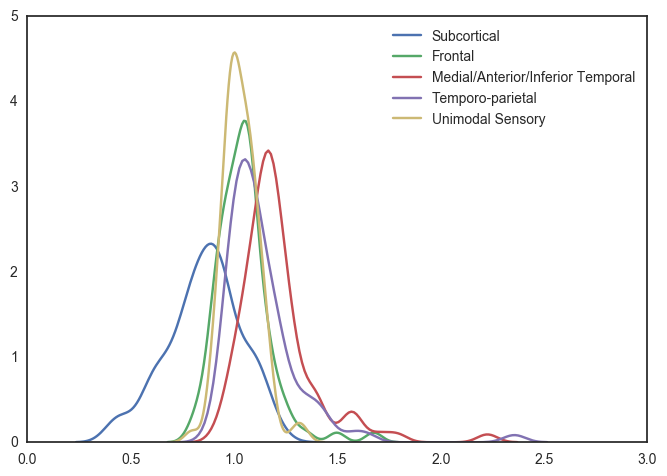

In [873]:
labs = dict(zip(ncols[-5:],['Subcortical','Frontal','Medial/Anterior/Inferior Temporal',
                            'Temporo-parietal', 'Unimodal Sensory']))
plt.close()
for col in ncols[-5:]:
    sns.kdeplot(a_indata[col].values,label=labs[col])
sns.legend=True
plt.show()

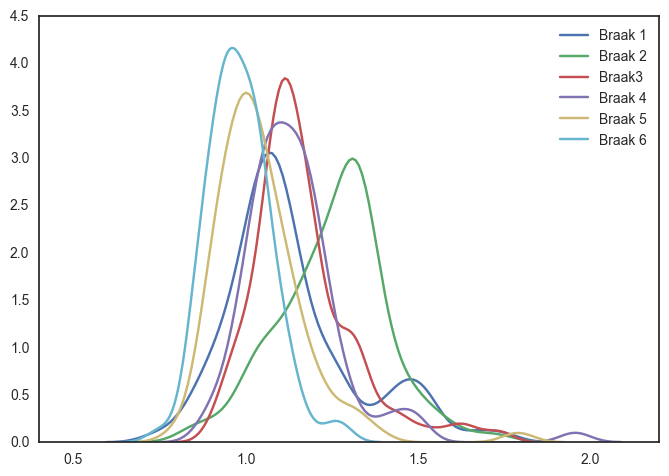

In [877]:
labs = dict(zip(ncols[:6],['Braak 1','Braak 2','Braak3',
                            'Braak 4', 'Braak 5', 'Braak 6']))
plt.close()
for col in ncols[:6]:
    sns.kdeplot(a_indata[col].values,label=labs[col])
sns.legend=True
plt.show()

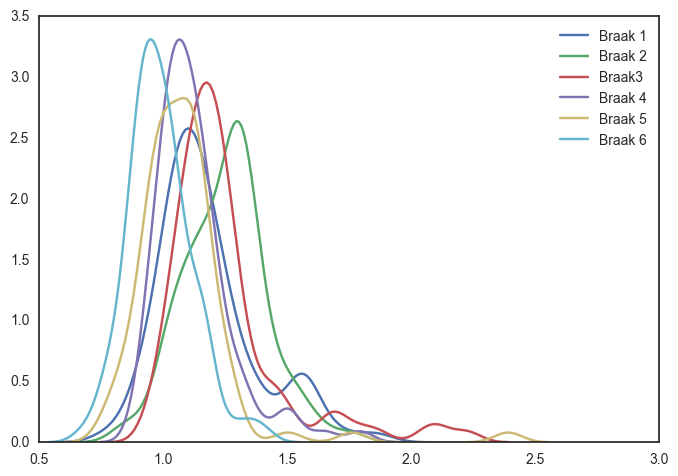

In [878]:
labs = dict(zip(ncols[23:29],['Braak 1','Braak 2','Braak3',
                            'Braak 4', 'Braak 5', 'Braak 6']))
plt.close()
for col in ncols[23:29]:
    sns.kdeplot(a_indata[col].values,label=labs[col])
sns.legend=True
plt.show()

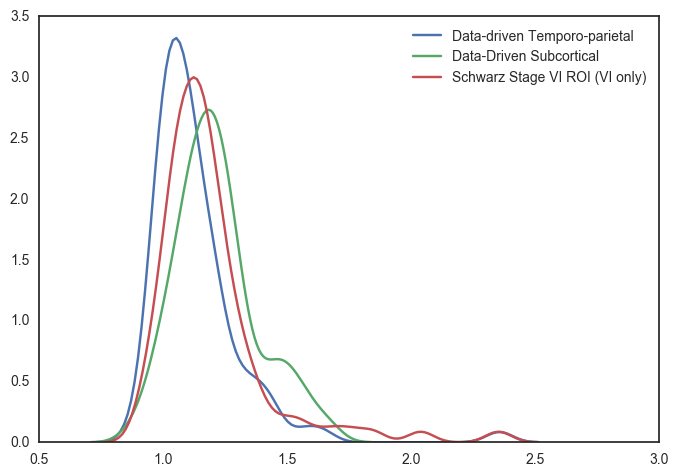

In [882]:
collist = [ncols[-2], ncols[30], ncols[22]]
labs = dict(zip(collist,
                ['Data-driven Temporo-parietal','Data-Driven Subcortical',
                 'Schwarz Stage VI ROI (VI only)']))
plt.close()
for col in collist:
    sns.kdeplot(a_indata[col].values,label=labs[col])
sns.legend=True
plt.show()

In [945]:
ncols[-5]

'brain_partition_core_ind_lund_sci5_scf5_1'

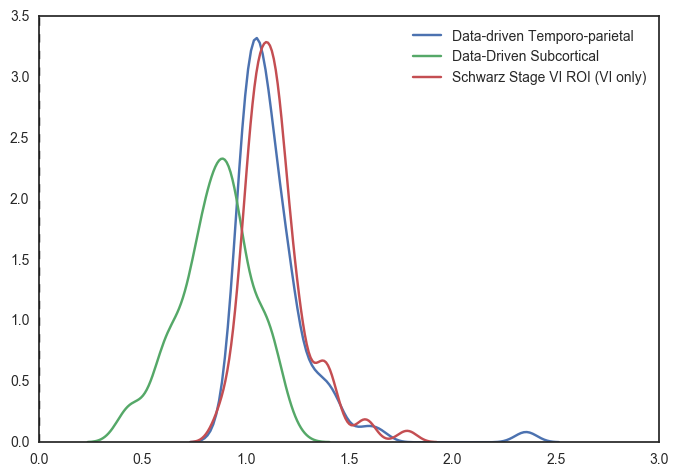

In [949]:
plt.close()
sns.kdeplot(a_indata[ncols[-2]],label='Data-driven Temporo-parietal')
sns.kdeplot(a_indata[ncols[-5]],label='Data-Driven Subcortical')
sns.kdeplot(a_indata[ncols[34]],label='Schwarz Stage VI ROI (VI only)')
sns.legend=True
plt.plot([0, 0], [0, 3.5], 'k--', linewidth=1,)
plt.show()

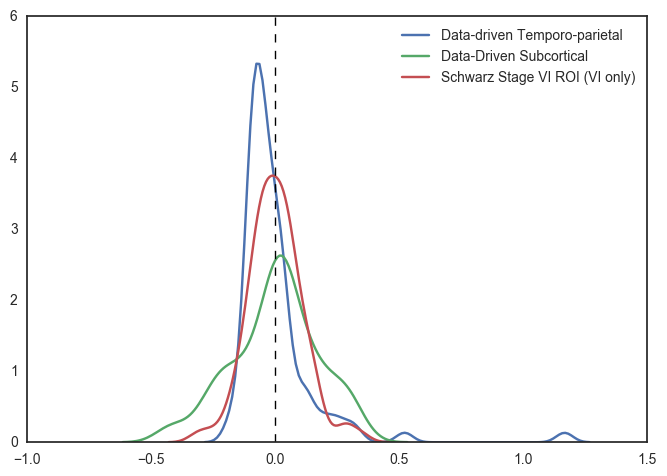

In [892]:


plt.close()
sns.kdeplot(clus4_resid,label='Data-driven Temporo-parietal')
sns.kdeplot(clus1_resid,label='Data-Driven Subcortical')
sns.kdeplot(scw6_resid,label='Schwarz Stage VI ROI (VI only)')
sns.legend=True
plt.plot([0, 0], [0, 6], 'k--', linewidth=1,)
plt.show()

In [ ]:
######## OKAY! Now let's try to do some classification. We'll do amyloid status and diagnosis

In [84]:
from sklearn.linear_model import LogisticRegression

In [83]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [87]:
svrX = a_indata.brain_partition_consensus_ind_lund_sci5_scf5_5.values.reshape(-1,1)
jnk=[]
for i in a_indata['DX_final'].values:
    if i == 'NL':
        jnk.append(1)
    elif i == 'MCI':
        jnk.append(2)
    else:
        jnk.append(3)
svry = np.array(jnk)

In [88]:
svry.reshape(1,-1)

array([[2, 3, 3, 2, 2, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2,
        2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2,
        2, 1, 2, 1, 1, 2, 2, 3, 3, 1, 2, 1, 1, 3, 1, 1, 2, 1, 2, 1, 2, 2,
        2, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 3, 3, 2, 1]])

In [43]:
# Add scale
scl = StandardScaler()
jsvr = svm.SVC(kernel='rbf', C=1e3, gamma=0.1)
scl_svr = Pipeline([('scale', scl),('svr', jsvr)])

y_rbf = scl_svr.fit(svrX, svry).predict(svrX)
scl_svr.set_params(svr__kernel='linear')
print('rbf',scl_svr.score(svrX,svry))
y_lin = scl_svr.fit(svrX, svry).predict(svrX)
print('linear',scl_svr.score(svrX,svry))
scl_svr.set_params(svr__kernel='poly',svr__degree=2)
y_poly = scl_svr.fit(svrX, svry).predict(svrX)
print('quadratic',scl_svr.score(svrX,svry))

rbf 0.441860465116
linear 0.511627906977
quadratic 0.511627906977


In [95]:
# amyloid
svry = a_indata.av45_status_wcb.values

In [96]:
# Add scale
scl = StandardScaler()
jsvr = svm.SVC(kernel='rbf', C=1e3, gamma=0.1)
scl_svr = Pipeline([('scale', scl),('svr', jsvr)])

y_rbf = scl_svr.fit(svrX, svry).predict(svrX)
scl_svr.set_params(svr__kernel='linear')
print('rbf',scl_svr.score(svrX,svry))
y_lin = scl_svr.fit(svrX, svry).predict(svrX)
print('linear',scl_svr.score(svrX,svry))
scl_svr.set_params(svr__kernel='poly',svr__degree=2)
y_poly = scl_svr.fit(svrX, svry).predict(svrX)
print('quadratic',scl_svr.score(svrX,svry))

rbf 0.383720930233
linear 0.616279069767
quadratic 0.651162790698


In [51]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
# With CV...
scl = StandardScaler()
jsvr = svm.SVC(kernel='rbf', C=1e3, gamma=0.1)
scl_svr = Pipeline([('scale', scl),('svr', jsvr)])

y_rbf = cross_val_predict(scl_svr,svrX,svry,cv=10)
print('rbf',cross_val_score(scl_svr,svrX,svry,cv=10).mean())
scl_svr.set_params(svr__kernel='linear')
y_lin = cross_val_predict(scl_svr,svrX,svry,cv=10)
print('linear',cross_val_score(scl_svr,svrX,svry,cv=10).mean())
scl_svr.set_params(svr__kernel='poly',svr__degree=2)
y_poly = cross_val_predict(scl_svr,svrX,svry,cv=10)
print('poly',cross_val_score(scl_svr,svrX,svry,cv=10).mean())

//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


rbf 0.567023809524


//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


linear 0.530634920635
poly 0.507738095238


//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 8 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [93]:
# Logistic_regression
from sklearn.linear_model import LogisticRegression
scl = StandardScaler()
jsvr = LogisticRegression(solver='liblinear', C=1e3)
scl_svr = Pipeline([('scale', scl),('svr', jsvr)])

y_liblin = scl_svr.fit(svrX, svry).predict(svrX)
scl_svr.score(svrX,svry)

0.51162790697674421

In [90]:
c_iter = pandas.DataFrame(index=range(1,100000,10),columns=['acc'])
jsvr = LogisticRegression(solver='liblinear', C=1e3)
scl_svr = Pipeline([('scale', scl),('svr', jsvr)])
for i in range(1,100000,10):
    scl_svr.set_params(svr__C=i)
    scl_svr.fit(svrX, svry).predict(svrX)
    c_iter.ix[i,'acc'] = scl_svr.score(svrX,svry)

In [92]:
c_iter.max()

acc    0.511628
dtype: float64

In [97]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

Optimal number of features : 12


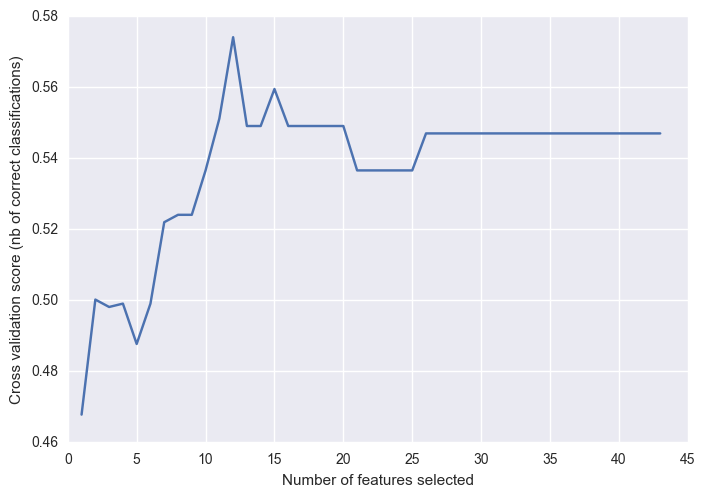

In [175]:
# Create the RFE object and compute a cross-validated score.
svc = svm.SVC(kernel="linear")
#svc = svm.SVC(kernel='linear', C=1e3, gamma=0.1)
#svc = Pipeline([('scale', scl),('svr', jsvr)])
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(8),
              scoring='accuracy')
rfecv.fit(a_indata[ncols].values, a_indata['DX_final'].values)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [176]:
newx = rfecv.transform(a_indata[ncols].values)


In [177]:
newx.shape

(86, 12)

In [178]:
selected = []
#print('selected = ',newx.shape[-1])
for i in range(newx.shape[-1]):
    arr = newx[:,i]
    for col in ncols:
        if np.allclose(a_indata[col].values,arr):
            selected.append(col)

In [179]:
selected

['dkt_Braak_new_atlas_1',
 'dkt_Cho_new_atlas_1',
 'schwarz_atlas_1',
 'schwarz_atlas_4',
 'schwarz_atlas_5',
 'schwarz_atlas_6',
 'brain_partition_core_ind_lund_sci5_scf5_4',
 'brain_partition_core_ind_lund_sci5_scf5_5',
 'lund_ET_6_1',
 'lund_ET_6_3',
 'lund_ET_6_4',
 'lund_ET_6_5',
 'lund_ET_6_6']

In [118]:
from sklearn.linear_model import lasso_stability_path

In [ ]:
scl = StandardScaler()
jsvr = RandomizedLogisticRegression()
scl_svr = Pipeline([('scale', scl),('svr', jsvr)])

y_lin = scl_svr.fit(svrX, svry).predict(svrX)
print('linear',scl_svr.score(svrX,svry))
scl_svr.set_params(svr__kernel='poly',svr__degree=2)
y_poly = scl_svr.fit(svrX, svry).predict(svrX)
print('quadratic',scl_svr.score(svrX,svry))

In [134]:
ExtraTreesClassifier?

Feature ranking:
1. feature 41 (0.035860)
2. feature 38 (0.033322)
3. feature 42 (0.032479)
4. feature 36 (0.031807)
5. feature 39 (0.031050)
6. feature 40 (0.029280)
7. feature 32 (0.028685)
8. feature 25 (0.026142)
9. feature 33 (0.025533)
10. feature 37 (0.024906)
11. feature 24 (0.024439)
12. feature 35 (0.024279)
13. feature 21 (0.024261)
14. feature 13 (0.023690)
15. feature 3 (0.023621)
16. feature 20 (0.023477)
17. feature 31 (0.023265)
18. feature 34 (0.023018)
19. feature 8 (0.022779)
20. feature 6 (0.022588)
21. feature 23 (0.022553)
22. feature 1 (0.022208)
23. feature 11 (0.022150)
24. feature 22 (0.021974)
25. feature 5 (0.021830)
26. feature 10 (0.021115)
27. feature 29 (0.020939)
28. feature 2 (0.020816)
29. feature 12 (0.020647)
30. feature 0 (0.020579)
31. feature 28 (0.020155)
32. feature 26 (0.020095)
33. feature 15 (0.020079)
34. feature 30 (0.020058)
35. feature 17 (0.019963)
36. feature 7 (0.019703)
37. feature 18 (0.019631)
38. feature 27 (0.019323)
39. feature 

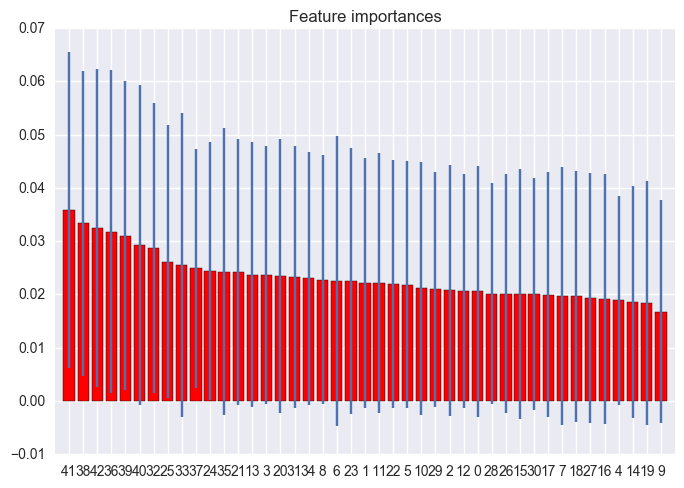

In [136]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

# Build a classification task using 3 informative features
X, y = a_indata[ncols],a_indata['DX_final']

# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [146]:
selected = lasso_feat_select(a_indata,ncols,'av45_status_wcb',thr=0.1,
                             clf=ExtraTreesClassifier(n_estimators=1000,
                              random_state=0))

there are 0 features
selected =  0


//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/feature_selection/base.py:80: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  UserWarning)


In [220]:
y = a_indata['MMSE']

In [208]:
from sklearn.linear_model import LassoCV

In [219]:
-np.log10(model.alpha_)

1.7553200349220832

In [223]:
model.mse_path_

array([[  9.78004535,   2.51721271,   4.34356499,   5.18905193,
          2.76751767,  30.96680143,   1.61160421,   2.00064732,
          2.28818272,   3.08114045],
       [  9.78004535,   2.48943537,   4.3762286 ,   5.12960839,
          2.76218615,  31.14688654,   1.54906402,   1.97244561,
          2.29736679,   3.04441773],
       [  9.78295916,   2.48293276,   4.4092456 ,   5.07528446,
          2.75901886,  31.31657701,   1.49243378,   1.94721928,
          2.30782355,   3.01162523],
       [  9.81083809,   2.49519778,   4.44225942,   5.02612686,
          2.77014493,  31.47634644,   1.44134775,   1.92462783,
          2.31922083,   3.0026661 ],
       [  9.8422237 ,   2.50935461,   4.47498083,   4.98159138,
          2.78444622,  31.62666608,   1.38248985,   1.90437193,
          2.33128094,   2.99908233],
       [  9.87617818,   2.52492167,   4.46863897,   4.94119599,
          2.800673  ,  31.76800112,   1.30484198,   1.84080271,
          2.32470006,   2.99841347],
       [  

Computing regularization path using the coordinate descent lasso...


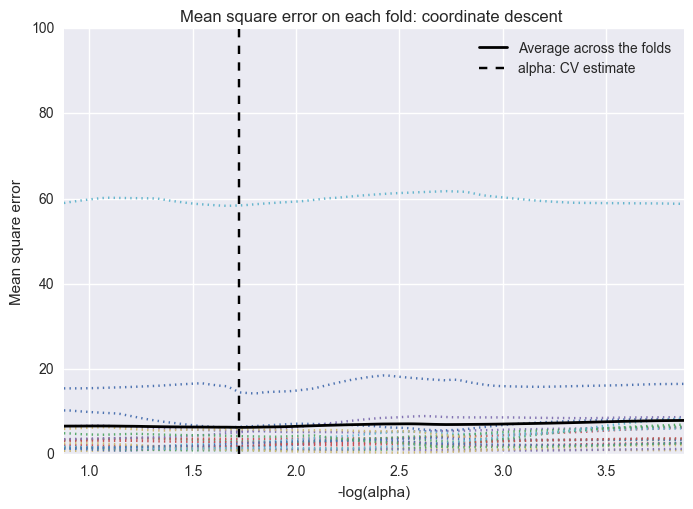

In [228]:
print("Computing regularization path using the coordinate descent lasso...")
model = LassoCV(cv=10,max_iter=100000).fit(X, y)

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.close()
plt.figure()
#ymin, ymax = 2300, 3800
#ymin, ymax = 0, 10000
ymin, ymax = 0, 100
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent ')
plt.axis('tight')
plt.ylim(ymin, ymax)
plt.show()

In [149]:
from sklearn.linear_model import LogisticRegressionCV

In [152]:
selected = lasso_feat_select(a_indata,ncols,'DX_final',
                             clf=LogisticRegressionCV())
selected

there are 43 features
selected =  6


['dkt_Braak_new_atlas_4',
 'dkt_Cho_new_atlas_2',
 'schwarz_atlas_4',
 'brain_partition_core_ind_lund_sci5_scf5_4',
 'brain_partition_core_ind_lund_sci5_scf5_5',
 'lund_ET_6_4']

In [132]:
ncols[36]

'brain_partition_core_ind_lund_sci5_scf5_5'

In [140]:
forest.fit(X,y)
forest.score(X,y)

1.0

In [ ]:
# Try multiple predictors and kernels after lasso

lr = linear_model.LinearRegression()

scl = StandardScaler()
jsvr = SVR(kernel='rbf', C=1e3, gamma=0.1)
scl_svr = Pipeline([('scale', scl),('svr', jsvr)])
nsvr = NuSVR(kernel='rbf', C=1e3, gamma=0.1)
scl_nsvr = Pipeline([('scale', scl),('svr', nsvr)])
mods = {'SVR': scl_svr, 'nu': scl_nsvr}

mroi_df = pandas.DataFrame(index=pred_var)

for dv in pred_var:
    print('>>>>>working on',dv,'<<<<<<<<')
    dv_val = a_indata[dv].values
    selected,nfeats = lasso_feat_select(a_indata,ncols,dv,cv=True,folds=10)
    enter = []
    for k,v in selected.items():
        if v > round(np.mean(nfeats)):
            enter.append(k)
    xval = a_indata[enter].transpose().drop_duplicates().transpose().values
    
        
    # Cross-validate LM
    pred = cross_val_predict(lr, xval, dv_val, cv=10)
    scr = cross_val_score(lr, xval, dv_val, cv=10)
    slp,inte,rval,pval,se = st.linregress(pred,dv_val)
    mroi_df.ix[dv,'lr_CV10_r'] = rval
    mroi_df.ix[dv,'lr_CV10_p'] = pval
    mroi_df.ix[dv,'lr_CV10_acc'] = scr.mean()
    mroi_df.ix[dv,'lr_CV10_medacc'] = np.median(scr)

    # SVR
    for mnm,mod in mods.items():
        mod.set_params(svr__kernel='rbf')
        y_rbf = mod.fit(xval,dv_val).predict(xval)
        scr_rbf = mod.score(xval,dv_val)
        mod.set_params(svr__kernel='linear')
        y_lin = mod.fit(xval,dv_val).predict(xval)
        scr_lin = mod.score(xval,dv_val)
        mod.set_params(svr__kernel='poly',svr__degree=2)
        y_poly = mod.fit(xval,dv_val).predict(xval)
        scr_poly = mod.score(xval,dv_val)
        res = zip([y_rbf,y_lin,y_poly],[scr_rbf,scr_lin,scr_poly])
        ys = dict(zip(['rbf','lin','poly'],res))
        for k,v in ys.items():
            slp,inte,rval,pval,se = st.linregress(v[0],dv_val)
            mroi_df.ix[dv,'%s_%s_r'%(mnm,k)] = rval
            mroi_df.ix[dv,'%s_%s_p'%(mnm,k)] = pval
            mroi_df.ix[dv,'%s_%s_acc'%(mnm,k)] = v[1].mean()
            mroi_df.ix[dv,'%s_%s_medacc'%(mnm,k)] = np.median(v[1])

        # Cross-validate
        for i in [10]:
            mod.set_params(svr__kernel='rbf')
            y_rbf = cross_val_predict(mod,xval,dv_val,cv=i)
            scr_rbf = cross_val_score(mod,xval,dv_val,cv=i).mean()
            scl_svr.set_params(svr__kernel='linear')
            y_lin = cross_val_predict(mod,xval,dv_val,cv=i)
            scr_lin = cross_val_score(mod,xval,dv_val,cv=i).mean()
            mod.set_params(svr__kernel='poly',svr__degree=2)
            y_poly = cross_val_predict(mod,xval,dv_val,cv=i)
            scr_poly = cross_val_score(mod,xval,dv_val,cv=i).mean()
            res = zip([y_rbf,y_lin,y_poly],[scr_rbf,scr_lin,scr_poly])
            ys = dict(zip(['rbf','lin','poly'],res))
            for k,v in ys.items():
                slp,inte,rval,pval,se = st.linregress(v[0],dv_val)
                mroi_df.ix[dv,'%s_CV%s_%s_r'%(mnm,i,k)] = rval
                mroi_df.ix[dv,'%s_CV%s_%s_p'%(mnm,i,k)] = pval
                mroi_df.ix[dv,'%s_CV%s_%s_acc'%(mnm,i,k)] = v[1].mean()
                mroi_df.ix[dv,'%s_CV%s_%s_medacc'%(mnm,i,k)] = np.median(v[1])

 

In [175]:
lundj = pandas.read_csv(
    '/Users/jakevogel/Science/tau/Lund_2save/jake_data_request_june_2017/lund_unmsk_tau_rois_ran_ID_added.csv')

In [177]:
lundj.head()

,Unnamed: 0,brain_partition_core_ind_lund_sci5_scf5_1.0,brain_partition_core_ind_lund_sci5_scf5_2.0,brain_partition_core_ind_lund_sci5_scf5_3.0,brain_partition_core_ind_lund_sci5_scf5_4.0,brain_partition_core_ind_lund_sci5_scf5_5.0,random_ID
0,0,1.040213,1.056712,1.256018,1.161606,0.968774,ran_0032
1,1,0.659259,1.115751,1.103154,1.208091,1.084934,ran_0227
2,2,0.592284,1.033074,1.385491,1.264328,1.177190,ran_0193
3,3,0.906226,0.885910,1.455534,1.018885,0.896310,ran_0062
4,4,0.723848,1.233259,1.675063,1.630370,1.216846,ran_0123


In [339]:
lund2 = pandas.read_csv('/Users/jakevogel/Science/tau/Lund_2save/Data for Jake_submitt.csv',
                       sep=';')

In [342]:
lund2.head().columns

Index(['Diagnos', 'Age', 'Gender', 'Education_y', 'MMSE',
       'ADAS_cog_delayed_recall', 'dkt_Braak_new_atlas_1.0',
       'dkt_Braak_new_atlas_2.0', 'dkt_Braak_new_atlas_3.0',
       'dkt_Braak_new_atlas_4.0', 'dkt_Braak_new_atlas_5.0',
       'dkt_Braak_new_atlas_6.0', 'dkt_Braak_stage_1_1.0',
       'dkt_Braak_stage_2_2.0', 'dkt_Braak_stage_3_3.0',
       'dkt_Braak_stage_4_4.0', 'dkt_Braak_stage_5_5.0',
       'dkt_Braak_stage_6_6.0', 'dkt_Cho_new_atlas_1.0',
       'dkt_Cho_new_atlas_2.0', 'dkt_Cho_new_atlas_3.0',
       'dkt_Cho_new_atlas_4.0', 'dkt_Cho_new_atlas_5.0', 'dkt_Cho_stage_1_1.0',
       'dkt_Cho_stage_2_2.0', 'dkt_Cho_stage_3_3.0', 'dkt_Cho_stage_4_4.0',
       'dkt_Cho_stage_5_5.0'],
      dtype='object')

In [185]:
matchr = pandas.read_csv('/Users/jakevogel/Science/tau/Lund_2save/jake_data_request_june_2017/tpforjake_june_4_ran_ID_added.csv')

In [186]:
matchr.head()

,Unnamed: 0,Tau_PET_A_date_match,CSF_Beta-Amyloid_match,Age_match,Sex_0-Male_1-Female_match,Education_match,MMSE_match,ADAS3_match,random_ID
0,0,11/21/14,751,76,0.0,18,30,2,ran_0154
1,1,5/4/15,788,78,0.0,9,29,5,ran_0009
2,2,6/17/15,1090,78,1.0,8,28,2,ran_0019
3,3,2/2/15,349,70,1.0,10,19,10,ran_0004
4,4,3/2/15,764,74,0.0,12,30,1,ran_0242


In [243]:
lund = pandas.read_csv('/Users/jakevogel/Science/tau/Lund_2save/lund_data.csv')
lund.head()

,Unnamed: 0,Diagnos,Age,Gender,Education_y,MMSE,ADAS_cog_delayed_recall,dkt_Braak_new_atlas_1.0,dkt_Braak_new_atlas_2.0,dkt_Braak_new_atlas_3.0,...,dkt_Cho_new_atlas_1.0,dkt_Cho_new_atlas_2.0,dkt_Cho_new_atlas_3.0,dkt_Cho_new_atlas_4.0,dkt_Cho_new_atlas_5.0,dkt_Cho_stage_1_1.0,dkt_Cho_stage_2_2.0,dkt_Cho_stage_3_3.0,dkt_Cho_stage_4_4.0,dkt_Cho_stage_5_5.0
0,0,control,87,1,7,30,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,control,62,1,9,27,1,1.004302,1.173569,1.097681,...,1.004302,1.127491,1.111678,1.037857,1.013865,1.004302,1.105419,1.109702,1.051836,1.046491
2,2,AD,71,1,10,21,8,1.820619,1.266033,1.612830,...,1.820619,1.838082,2.360904,1.522188,1.009369,1.820619,1.835017,2.194225,1.652939,1.562331
3,3,AD,72,0,17,26,8,1.344087,1.305475,1.429419,...,1.344087,1.463862,1.642698,1.305239,1.327273,1.344087,1.442419,1.579225,1.358547,1.354145
4,4,AD,78,1,10,27,9,1.499250,1.190879,1.282301,...,1.499250,1.440779,1.373883,1.051768,0.990567,1.499250,1.451310,1.398440,1.119216,1.101104


In [245]:
lund.ADAS_cog_delayed_recall.unique()

array(['1', '8', '9', ' ', '4', '2', '3', '10', '5', '6', '0', '7', 'ND'], dtype=object)

In [192]:
i = 0
row = lund.loc[lund.index[0]]
for x in matchr.index:
#    print(matchr.ix[x,'Age_match'],row['Age'])
    if int(matchr.ix[x,'Age_match']) == int(row['Age']):
        print(i,x)

0 95
0 107
0 127
0 163


ValueError: invalid literal for int() with base 10: '-'

In [249]:
mul, nof, fnd = [],[],[]
for i,row in lund.iterrows():
    i_match = []
    for x in matchr.index:
        try:
            if int(matchr.ix[x,'Age_match']) == int(row['Age']) and int(matchr.ix[
                            x,'MMSE_match']) == int(row['MMSE']) and int(matchr.ix[
                            x,'Education_match']) == float(row['Education_y']) and float(matchr.ix[
                            x,'Sex_0-Male_1-Female_match']) == int(row['Gender']):
                i_match.append(x)
        except:
            try:
                int(matchr.ix[x,'MMSE_match'])
                if int(matchr.ix[x,'Age_match']) == int(row['Age']) and float(matchr.ix[
                                x,'Education_match']) == float(row['Education_y']) and int(matchr.ix[
                                x,'Sex_0-Male_1-Female_match']) == int(row['Gender']):
                    i_match.append(x)
            except:
                try:
                    float(matchr.ix[x,'Education_match'])
                    if int(matchr.ix[x,'Age_match']) == int(row['Age']) and int(matchr.ix[
                                    x,'MMSE_match']) == int(row['MMSE']) and int(matchr.ix[
                                    x,'Sex_0-Male_1-Female_match']) == int(row['Gender']):
                        i_match.append(x)
                except:
                    continue
    if len(i_match) == 1:
        lund.ix[i,'random_ID'] = matchr.ix[i_match[0],'random_ID']
        fnd.append(i)
    elif len(i_match) == 0:
        print('no match found for ',i)
        nof.append(i)
    else:
        n_match = []
        for m in i_match:
            if str(matchr.ix[m,'ADAS3_match']) == str(row['ADAS_cog_delayed_recall']):
                n_match.append(m)
        if len(n_match) == 1:
            lund.ix[i,'random_ID'] = matchr.ix[n_match[0],'random_ID']
        elif len(n_match) == 0:
            print('no match found for ',i)
            nof.append(i)              
        else:
            mul.append([i,i_match])
            print('multiple matches found for for',i)
        

no match found for  63
multiple matches found for for 75
multiple matches found for for 95
multiple matches found for for 96
no match found for  106
multiple matches found for for 122


In [220]:
lund.loc[nof][lund.columns[1:5]]

,Age,Gender,Education_y,MMSE
63,58,1,12,ND
106,71,1,8,24


In [230]:
matchr.loc[[x for x in matchr.index if matchr.ix[x,'Age_match'] == '58']]

,Unnamed: 0,Tau_PET_A_date_match,CSF_Beta-Amyloid_match,Age_match,Sex_0-Male_1-Female_match,Education_match,MMSE_match,ADAS3_match,random_ID
53,53,9/26/16,220,58,1.0,12,ND,ND,ran_0200


In [276]:
lund.ix[63,'random_ID'] = matchr.ix[53,'random_ID']

In [277]:
cols = ['Age_match','MMSE_match','Education_match','Sex_0-Male_1-Female_match','ADAS3_match']
#for m in mul:
    print(m[0])
    print(lund.loc[m[0]][lund.columns[1:7]])
    for x in m[1]:
        print('\n')
        print(matchr.loc[x][cols])
    print('\n\n\n')

IndentationError: unexpected indent (<ipython-input-277-e3fae0c2d2b8>, line 3)

In [269]:
mul

[[75, [69, 135]], [95, [97, 98]], [96, [97, 98]], [122, [69, 135]]]

In [278]:
lund[~pandas.notnull(lund.random_ID)]

,Unnamed: 0,Diagnos,Age,Gender,Education_y,MMSE,ADAS_cog_delayed_recall,dkt_Braak_new_atlas_1.0,dkt_Braak_new_atlas_2.0,dkt_Braak_new_atlas_3.0,...,dkt_Cho_new_atlas_2.0,dkt_Cho_new_atlas_3.0,dkt_Cho_new_atlas_4.0,dkt_Cho_new_atlas_5.0,dkt_Cho_stage_1_1.0,dkt_Cho_stage_2_2.0,dkt_Cho_stage_3_3.0,dkt_Cho_stage_4_4.0,dkt_Cho_stage_5_5.0,random_ID
106,106,MCI-AD,71,1,8,24,7,1.629729,1.536753,1.626615,...,1.656397,1.443677,1.212997,1.066287,1.629729,1.651668,1.509626,1.270709,1.24193,NaN


In [260]:
lundj.index = lundj.random_ID

In [266]:
print(lundj.loc[matchr.loc[135]['random_ID']])
print(lundj.loc[matchr.loc[69]['random_ID']])

Unnamed: 0                                          133
brain_partition_core_ind_lund_sci5_scf5_1.0    0.820456
brain_partition_core_ind_lund_sci5_scf5_2.0      1.1621
brain_partition_core_ind_lund_sci5_scf5_3.0     1.61626
brain_partition_core_ind_lund_sci5_scf5_4.0     1.34049
brain_partition_core_ind_lund_sci5_scf5_5.0     1.10818
random_ID                                      ran_0025
Name: ran_0025, dtype: object
Unnamed: 0                                          167
brain_partition_core_ind_lund_sci5_scf5_1.0    0.905037
brain_partition_core_ind_lund_sci5_scf5_2.0    0.992891
brain_partition_core_ind_lund_sci5_scf5_3.0     1.07175
brain_partition_core_ind_lund_sci5_scf5_4.0     1.00582
brain_partition_core_ind_lund_sci5_scf5_5.0    0.953786
random_ID                                      ran_0023
Name: ran_0023, dtype: object


In [267]:
lund.ix[75,'random_ID'] = matchr.ix[69,'random_ID'] 

In [274]:
lund.ix[122,'random_ID'] = matchr.ix[135,'random_ID'] 

In [270]:
print(lundj.loc[matchr.loc[97]['random_ID']])
print(lundj.loc[matchr.loc[98]['random_ID']])

Unnamed: 0                                           49
brain_partition_core_ind_lund_sci5_scf5_1.0     1.03725
brain_partition_core_ind_lund_sci5_scf5_2.0    0.950938
brain_partition_core_ind_lund_sci5_scf5_3.0     1.03391
brain_partition_core_ind_lund_sci5_scf5_4.0    0.947346
brain_partition_core_ind_lund_sci5_scf5_5.0    0.848106
random_ID                                      ran_0068
Name: ran_0068, dtype: object
Unnamed: 0                                           48
brain_partition_core_ind_lund_sci5_scf5_1.0    0.856947
brain_partition_core_ind_lund_sci5_scf5_2.0      1.1626
brain_partition_core_ind_lund_sci5_scf5_3.0     1.17517
brain_partition_core_ind_lund_sci5_scf5_4.0     1.15907
brain_partition_core_ind_lund_sci5_scf5_5.0     1.00678
random_ID                                      ran_0039
Name: ran_0039, dtype: object


In [271]:
lund.ix[95,'random_ID'] = matchr.ix[97,'random_ID'] 

In [273]:
lund.ix[96,'random_ID'] = matchr.ix[98,'random_ID']

In [279]:
lund[~pandas.notnull(lund.random_ID)]

,Unnamed: 0,Diagnos,Age,Gender,Education_y,MMSE,ADAS_cog_delayed_recall,dkt_Braak_new_atlas_1.0,dkt_Braak_new_atlas_2.0,dkt_Braak_new_atlas_3.0,...,dkt_Cho_new_atlas_2.0,dkt_Cho_new_atlas_3.0,dkt_Cho_new_atlas_4.0,dkt_Cho_new_atlas_5.0,dkt_Cho_stage_1_1.0,dkt_Cho_stage_2_2.0,dkt_Cho_stage_3_3.0,dkt_Cho_stage_4_4.0,dkt_Cho_stage_5_5.0,random_ID
106,106,MCI-AD,71,1,8,24,7,1.629729,1.536753,1.626615,...,1.656397,1.443677,1.212997,1.066287,1.629729,1.651668,1.509626,1.270709,1.24193,NaN


In [286]:
lund.index = lund.random_ID

In [292]:
for sub in lund.index:
    if pandas.notnull(sub):
        if sub in lundj.random_ID:
            for col in lundj.columns[1:]:
                lund.ix[sub,col] = lundj.ix[sub,col]

In [293]:
lund.columns

Index(['Unnamed: 0', 'Diagnos', 'Age', 'Gender', 'Education_y', 'MMSE',
       'ADAS_cog_delayed_recall', 'dkt_Braak_new_atlas_1.0',
       'dkt_Braak_new_atlas_2.0', 'dkt_Braak_new_atlas_3.0',
       'dkt_Braak_new_atlas_4.0', 'dkt_Braak_new_atlas_5.0',
       'dkt_Braak_new_atlas_6.0', 'dkt_Braak_stage_1_1.0',
       'dkt_Braak_stage_2_2.0', 'dkt_Braak_stage_3_3.0',
       'dkt_Braak_stage_4_4.0', 'dkt_Braak_stage_5_5.0',
       'dkt_Braak_stage_6_6.0', 'dkt_Cho_new_atlas_1.0',
       'dkt_Cho_new_atlas_2.0', 'dkt_Cho_new_atlas_3.0',
       'dkt_Cho_new_atlas_4.0', 'dkt_Cho_new_atlas_5.0', 'dkt_Cho_stage_1_1.0',
       'dkt_Cho_stage_2_2.0', 'dkt_Cho_stage_3_3.0', 'dkt_Cho_stage_4_4.0',
       'dkt_Cho_stage_5_5.0', 'random_ID',
       'brain_partition_core_ind_lund_sci5_scf5_1.0',
       'brain_partition_core_ind_lund_sci5_scf5_2.0',
       'brain_partition_core_ind_lund_sci5_scf5_3.0',
       'brain_partition_core_ind_lund_sci5_scf5_4.0',
       'brain_partition_core_ind_lund_sci5_

In [298]:
lund.head()

,Unnamed: 0,Diagnos,Age,Gender,Education_y,MMSE,ADAS_cog_delayed_recall,dkt_Braak_new_atlas_1.0,dkt_Braak_new_atlas_2.0,dkt_Braak_new_atlas_3.0,...,dkt_Cho_stage_2_2.0,dkt_Cho_stage_3_3.0,dkt_Cho_stage_4_4.0,dkt_Cho_stage_5_5.0,random_ID,brain_partition_core_ind_lund_sci5_scf5_1.0,brain_partition_core_ind_lund_sci5_scf5_2.0,brain_partition_core_ind_lund_sci5_scf5_3.0,brain_partition_core_ind_lund_sci5_scf5_4.0,brain_partition_core_ind_lund_sci5_scf5_5.0
random_ID,,,,,,,,,,,,,,,,,,,,,
ran_0172,0,control,87,1,7,30,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,ran_0172,1.019333,1.044713,1.105289,1.083862,0.928833
ran_0165,1,control,62,1,9,27,NaN,1.004302,1.173569,1.097681,...,1.105419,1.109702,1.051836,1.046491,ran_0165,0.930069,1.037194,1.115978,1.093550,1.023193
ran_0202,2,AD,71,1,10,21,NaN,1.820619,1.266033,1.612830,...,1.835017,2.194225,1.652939,1.562331,ran_0202,0.842433,1.322594,2.136681,2.015749,0.965933
ran_0142,3,AD,72,0,17,26,NaN,1.344087,1.305475,1.429419,...,1.442419,1.579225,1.358547,1.354145,ran_0142,0.585223,1.013146,1.437580,1.622279,1.265751
ran_0024,4,AD,78,1,10,27,NaN,1.499250,1.190879,1.282301,...,1.451310,1.398440,1.119216,1.101104,ran_0024,0.866219,0.966814,1.451347,1.114114,0.988261


In [294]:
def clean_col(col):
    col = col.tolist()
    for i,row in enumerate(col):
        if ',' in row:
            col[i] = row.replace(',','.')
        else:
            col[i] = np.nan
    col = pandas.Series(col,dtype=float)
    return col
    

In [299]:
#for col in lund.columns[7:]:
    print('working on',col)
    ncol = clean_col(lund[col])
    lund.ix[:,col] = ncol

IndentationError: unexpected indent (<ipython-input-299-96b18e6043f7>, line 2)

In [319]:
ncolz = []
for col in lund.columns:
    if '.0' in col:
        ncolz.append(col.replace('.0',''))
    else:
        ncolz.append(col)
lund.columns = ncolz

In [ ]:
delcols = ['dkt_Cho_stage_1_1','dkt_Cho_new_atlas_1','dkt_Braak_stage_1_1','dkt_Braak_new_atlas_6']
for col in delcols:
    lund.drop(col,axis=1,inplace=True)



In [355]:
lcols = lund.columns[7:25].tolist() + lund.columns[26:].tolist()

In [350]:
lcov = lund.columns[2:5]

In [330]:
lund.Education_y = pandas.to_numeric(lund.Education_y,'coerce')

In [332]:
lund.MMSE = pandas.to_numeric(lund.MMSE,'coerce')

In [333]:
# A real quick check of the linear relationships since adding Lund ROIs
l_lin_res = pandas.DataFrame(index=lcols)
dv = 'MMSE'
dat = lund[lcols+[dv]+lcov.tolist()].dropna()
for col in lcols:
    mod = smf.ols('%s ~ %s + %s + %s + %s'%(dv,lcov[0],
                                           lcov[1],
                                           lcov[2],col),
                                          data=dat).fit()
    l_lin_res.ix[col,'%s_t'%(dv)] = mod.tvalues[-1]
    l_lin_res.ix[col,'%s_p'%(dv)] = mod.pvalues[-1]
        

In [336]:
l_lin_res.sort_values('MMSE_t',ascending=True)

,MMSE_t,MMSE_p
brain_partition_core_ind_lund_sci5_scf5_3,-7.718045,5.332431e-12
dkt_Cho_stage_3_3,-7.548871,1.264321e-11
dkt_Cho_stage_2_2,-7.442472,2.169782e-11
dkt_Cho_new_atlas_3,-7.409996,2.557461e-11
dkt_Braak_new_atlas_1,-7.341987,3.605785e-11
dkt_Cho_stage_1_1,-7.341987,3.605785e-11
dkt_Cho_new_atlas_1,-7.341987,3.605785e-11
dkt_Braak_stage_1_1,-7.341987,3.605785e-11
dkt_Cho_new_atlas_2,-7.172392,8.454891e-11
dkt_Braak_stage_4_4,-7.149904,9.461702e-11


In [80]:
selected,fig, las = lasso_feat_select(lund,lcols+lcov.tolist(),'MMSE',
                                      scale=True,plt_min=0,plt_max=100,mod_predict=True,
                                      )
selected

NameError: name 'lund' is not defined

In [359]:
mod = smf.ols('MMSE ~ dkt_Braak_new_atlas_1 + dkt_Braak_new_atlas_2 + brain_partition_core_ind_lund_sci5_scf5_3 + brain_partition_core_ind_lund_sci5_scf5_4',
        data=lund).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MMSE   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     24.83
Date:                Wed, 27 Sep 2017   Prob (F-statistic):           7.33e-15
Time:                        19:36:01   Log-Likelihood:                -327.66
No. Observations:                 121   AIC:                             665.3
Df Residuals:                     116   BIC:                             679.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                    32.4750      2.334     13.915      0.000      27.853      37.097
dkt_Braak_new_atlas_1                        -7.6972      2.682     -2.870      0.005     -13.008      -2.386
dkt_Braak_new_atlas_2                         7.1882      2.230      3.223      0.002       2.771      11.605
brain_partition_core_ind_lund_sci5_scf5_3    -1.9583      2.370     -0.826      0.410      -6.653       2.736
brain_partition_core_ind_lund_sci5_scf5_4    -2.2142      1.063     -2.084      0.039      -4.319      -0.110
==============================================================================
Omnibus:                       28.578   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.645
Skew:                          -1.139   Prob(JB):                     3.33e-10
Kurtosis:                       4.862   Cond. No.                         31.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [362]:
lund.Age.unique()

array([87, 62, 71, 72, 78, 66, 44, 50, 60, 70, 65, 77, 67, 76, 74, 79, 75,
       64, 83, 59, 54, 84, 61, 40, 63, 68, 58, 69, 88, 52, 81, 57, 73, 56,
       80, 82])

In [264]:
lund.ix[:,'MMSE'] = pandas.to_numeric(lund.MMSE)
lund

In [871]:
lund.to_csv('/Users/jakevogel/Science/tmp/tau/Lund_2save/lund_data.csv')

In [258]:
indata = lund.dropna(axis=0)
indata.shape

In [42]:
sns.set_style('white')

In [875]:
lund.columns[-5:]

Index(['dkt_Cho_stage_1_1.0', 'dkt_Cho_stage_2_2.0', 'dkt_Cho_stage_3_3.0',
       'dkt_Cho_stage_4_4.0', 'dkt_Cho_stage_5_5.0'],
      dtype='object')

In [863]:
plt.close()
sns.lmplot('dkt_Cho_stage_3_3.0','MMSE',data=indata)
plt.show()

KeyError: "['MMSE' 'dkt_Cho_stage_3_3.0'] not in index"

In [307]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import make_scorer

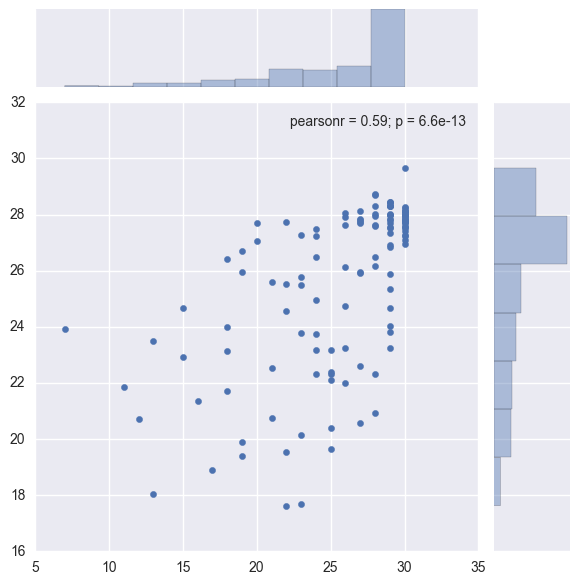

cross validation accuracy =  -0.13649025635


In [308]:
# one ROI
lr = linear_model.LinearRegression()
xin = indata['dkt_Cho_stage_3_3.0'].values.reshape(-1,1)
y = indata['MMSE'].values

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, xin, y, cv=10)
score = cross_val_score(lr,xin,y,cv=10,scoring=make_scorer(explained_variance_score))

plt.close()
sns.jointplot(y,predicted)
sns.plt.xlabel='Observed'
sns.plt.ylabel='Predicted'
plt.show()

print('cross validation accuracy = ',score.mean())


In [309]:
score

array([ 0.51443688,  0.52676057,  0.16912149,  0.39688684,  0.03185543,
        0.36254063, -0.11208534, -2.79146286, -0.13065067, -0.33230552])

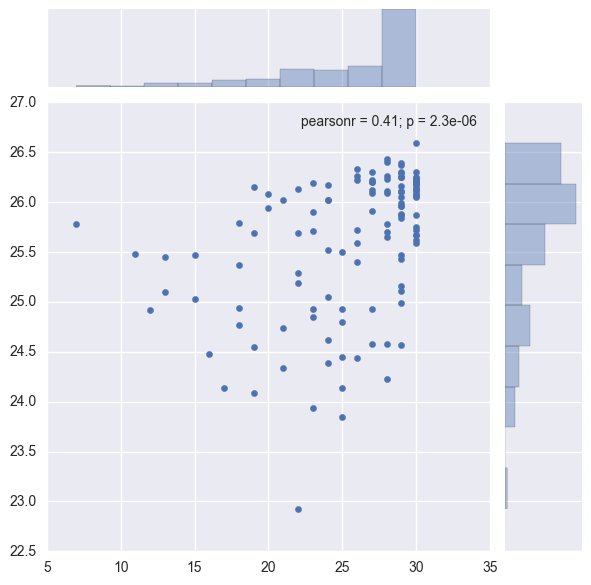

cross validation accuracy =  -3.56048193446


In [335]:
# all tau
lasso = linear_model.Lasso()
xin = indata[indata.columns[6:]].values
y = indata['MMSE'].values

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lasso, xin, y, cv=10)
score = cross_val_score(lasso, xin, y, cv=10)

plt.close()
sns.jointplot(y,predicted)
plt.show()

print('cross validation accuracy = ',score.mean())

In [316]:
X_new[:,0]

array([ 1.10970188,  2.19422483,  1.57922452,  1.39844036,  0.96909784,
        2.19528561,  2.39752106,  1.15448123,  1.08625659,  1.3160531 ,
        1.82401643,  1.77011953,  1.81158131,  2.03347025,  1.06393247,
        1.0230779 ,  1.03850057,  2.24310226,  1.09454995,  1.44002159,
        2.27894131,  1.05322739,  1.12690777,  1.06758917,  1.21847563,
        1.69416351,  2.0210474 ,  2.63743862,  1.09085664,  1.46683816,
        1.48468543,  1.98248868,  1.71382703,  1.3039151 ,  1.41207968,
        2.36615083,  2.58815392,  1.1076205 ,  0.84190485,  1.12642473,
        1.10921523,  2.39646521,  2.15545864,  1.89416987,  1.17920251,
        1.56495521,  1.8138957 ,  1.99014537,  1.10745589,  1.86152267,
        2.15177783,  1.55066912,  1.151289  ,  1.74048686,  1.08499226,
        1.62678856,  2.04792768,  1.82990952,  1.38419005,  1.44694437,
        1.14527783,  1.22941178,  1.01613183,  1.14372138,  1.08717061,
        1.30166662,  1.67863312,  1.09006709,  1.03919367,  1.88

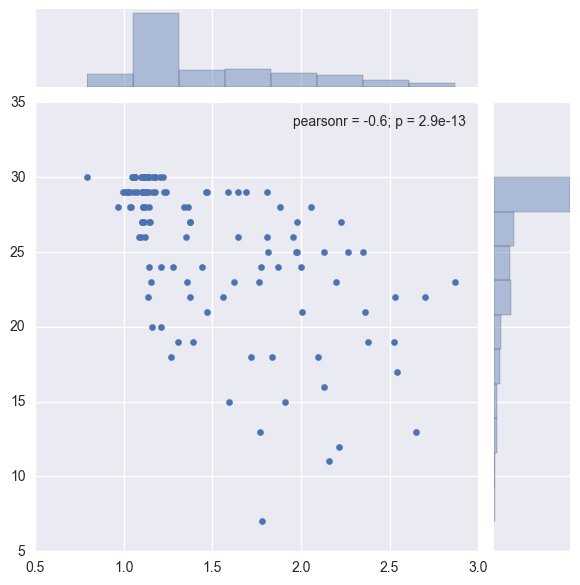

In [337]:
las2 = linear_model.Lasso().fit(xin, y)
model = SelectFromModel(las2, prefit=True)
X_new = model.transform(xin)
plt.close()
sns.jointplot(X_new[:,0],y)
plt.show()

//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You 

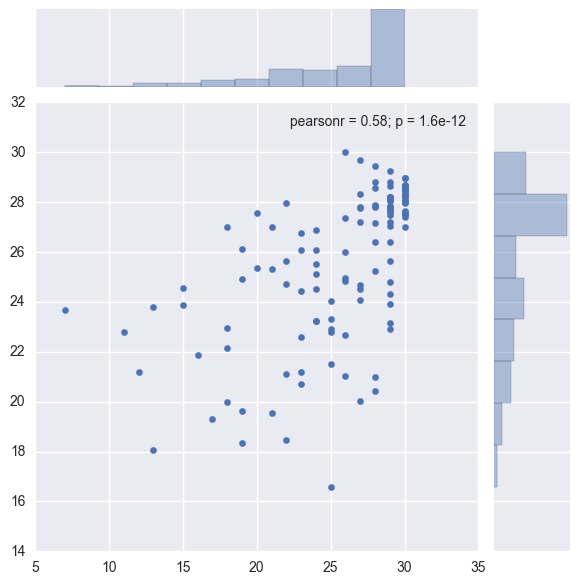

cross validation accuracy =  -1.00802576028


In [338]:
clf = linear_model.LassoCV()
predicted = cross_val_predict(clf, xin, y, cv=10)
score = cross_val_score(clf,xin,y,cv=10)

plt.close()
sns.jointplot(y,predicted)
plt.show()

print('cross validation accuracy = ',score.mean())

//anaconda/envs/py3/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


there are 6 features


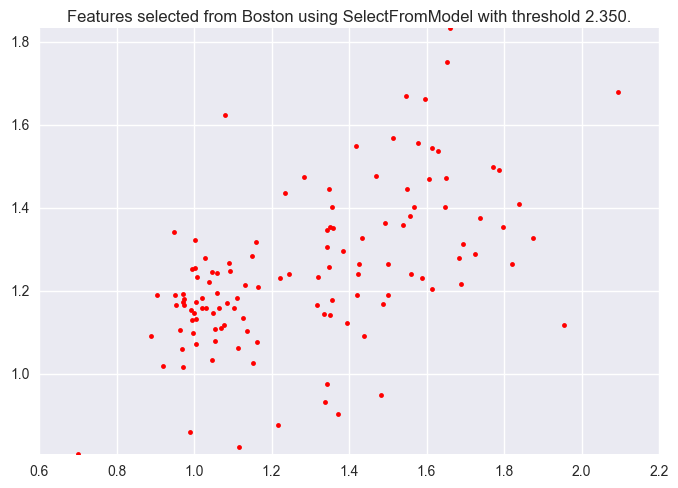

In [339]:
plt.close()
clf = linear_model.LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(xin, y)
n_features = sfm.transform(xin).shape[1]
print('there are %s features'%(n_features))
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(xin)
    n_features = X_transform.shape[1]
plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
#plt.xlabel("Feature number 1")
#plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

In [982]:
indata.columns

Index(['dkt_Braak_new_atlas_1', 'dkt_Braak_new_atlas_2',
       'dkt_Braak_new_atlas_3', 'dkt_Braak_new_atlas_4',
       'dkt_Braak_new_atlas_5', 'dkt_Braak_new_atlas_6', 'dkt_Braak_stage_1_1',
       'dkt_Braak_stage_2_2', 'dkt_Braak_stage_3_3', 'dkt_Braak_stage_4_4',
       'dkt_Braak_stage_5_5', 'dkt_Braak_stage_6_6', 'dkt_Cho_new_atlas_1',
       'dkt_Cho_new_atlas_2', 'dkt_Cho_new_atlas_3', 'dkt_Cho_new_atlas_4',
       'dkt_Cho_new_atlas_5', 'dkt_Cho_stage_1_1', 'dkt_Cho_stage_2_2',
       'dkt_Cho_stage_3_3', 'dkt_Cho_stage_4_4', 'dkt_Cho_stage_5_5',
       'inf_temp_1', 'schwarz_atlas_1', 'schwarz_atlas_2', 'schwarz_atlas_3',
       'schwarz_atlas_4', 'schwarz_atlas_5', 'schwarz_atlas_6',
       'Schwarz_Stage_1', 'Schwarz_Stage_2', 'Schwarz_Stage_3',
       'Schwarz_Stage_4', 'Schwarz_Stage_5', 'Schwarz_Stage_6',
       'brain_partition_core_ind_lund_sci5_scf5_1',
       'brain_partition_core_ind_lund_sci5_scf5_2',
       'brain_partition_core_ind_lund_sci5_scf5_3',
       'br

In [985]:
lasso_feat_select(lund,indata.columns,'MMSE',scale=True)

KeyError: "Index(['dkt_Braak_new_atlas_1', 'dkt_Braak_new_atlas_2',\n       'dkt_Braak_new_atlas_3', 'dkt_Braak_new_atlas_4',\n       'dkt_Braak_new_atlas_5', 'dkt_Braak_new_atlas_6', 'dkt_Braak_stage_1_1',\n       'dkt_Braak_stage_2_2', 'dkt_Braak_stage_3_3', 'dkt_Braak_stage_4_4',\n       'dkt_Braak_stage_5_5', 'dkt_Braak_stage_6_6', 'dkt_Cho_new_atlas_1',\n       'dkt_Cho_new_atlas_2', 'dkt_Cho_new_atlas_3', 'dkt_Cho_new_atlas_4',\n       'dkt_Cho_new_atlas_5', 'dkt_Cho_stage_1_1', 'dkt_Cho_stage_2_2',\n       'dkt_Cho_stage_3_3', 'dkt_Cho_stage_4_4', 'dkt_Cho_stage_5_5',\n       'inf_temp_1', 'schwarz_atlas_1', 'schwarz_atlas_2', 'schwarz_atlas_3',\n       'schwarz_atlas_4', 'schwarz_atlas_5', 'schwarz_atlas_6',\n       'Schwarz_Stage_1', 'Schwarz_Stage_2', 'Schwarz_Stage_3',\n       'Schwarz_Stage_4', 'Schwarz_Stage_5', 'Schwarz_Stage_6',\n       'brain_partition_core_ind_lund_sci5_scf5_1',\n       'brain_partition_core_ind_lund_sci5_scf5_2',\n       'brain_partition_core_ind_lund_sci5_scf5_3',\n       'brain_partition_core_ind_lund_sci5_scf5_4',\n       'brain_partition_core_ind_lund_sci5_scf5_5', 'av45_status'],\n      dtype='object') not in index"